# ML Employee Churn Prediction
*Providing data-driven suggestions for HR*

### POJECT TITLE: Predictive Modeling for Employee Churn Reduction
Executive Summary

This project will develop a robust predictive model to identify employees at high risk of voluntary attrition, enabling a shift from a reactive to a proactive retention strategy. By accurately forecasting churn, management can implement targeted interventions, improve employee satisfaction, and reduce costs associated with turnover. The model will be developed using the "Salifort Motors" dataset provided by the Google Advanced Analytics Certificate.

Project Methodology: The PACE Framework

1. PLAN: Project Scoping and Definition

This initial phase establishes the project's foundation by defining goals, stakeholders, and success criteria.

Business Problem & Objective: The core business problem is the employee turnover. The objective is to build and validate a machine learning model that accurately predicts which employees are likely to leave, with a primary focus on minimizing False Negatives (i.e., failing to identify an at-risk employee).

Stakeholders & Deliverables:

Primary Stakeholders: HR Department, Senior Management.

Key Deliverables: A final presentation summarizing key findings, a technical report detailing the model development process, and the documented model code.

Success Criteria: The project's success will be measured by the delivery of a classification model with a high Recall score, providing actionable insights that can be integrated into the company's retention strategy.

2. ANALYZE: Data Exploration, Cleaning, and Insight Discovery
This phase focuses on a deep-dive analysis of the dataset to understand its characteristics and uncover initial patterns related to churn.

Data Profiling: Conduct a comprehensive assessment of the dataset to understand its structure, volume, variable types, and statistical properties.

Data Cleaning & Preparation: Systematically identify and address data quality issues, including missing values, inconsistencies, or outliers, to ensure the integrity of features used for modeling.

Statistical Analysis & Insight Generation: Perform descriptive and inferential statistical analysis to identify initial drivers of churn. This includes correlation analysis and group-by comparisons of attributes between churned and retained employees.

Data Visualization: Develop a suite of visualizations (e.g., histograms, heatmaps, box plots) to effectively communicate the overall churn rate and the relationships between key employee attributes and their decision to leave.

3. CONSTRUCT: Feature Engineering and Model Development
This phase involves building and refining the predictive model.

Hypothesis-Driven Feature Engineering: Engineer new, high-value features from the existing data to enhance the model's predictive power. This may include creating interaction terms or binning numerical features into logical categories.

Baseline Model Screening: Utilize LazyClassifier to perform a rapid baseline evaluation of multiple algorithms, identifying the most promising candidates for further development based on their Recall scores.

Model Training & Hyperparameter Tuning: Select the top-performing models from the baseline and conduct rigorous training. Optimize their hyperparameters specifically to maximize the Recall metric, thereby minimizing False Negatives.

Final Model Evaluation: Evaluate the tuned model on an unseen test set to validate its performance and ensure its generalizability.

4. EXECUTE: Reporting and Strategic Recommendations
The final phase focuses on translating analytical results into actionable business strategy.

Summary of Key Findings: Deliver a comprehensive summary of the primary drivers of employee churn as identified by the model and the data analysis.

Final Model Presentation: Present the final model, detailing its performance metrics (with an emphasis on Recall) and explaining its predictive logic in a clear, non-technical manner.

Actionable Recommendations & Next Steps: Conclude with a set of strategic recommendations for the HR department based on the model's insights. Outline clear next steps for deploying the model as a tool to support proactive employee retention efforts.

In [1]:
# ==============================================================================
# INSTALLATION OF REQUIRED LIBRARIES
# ==============================================================================
# Before execution, ensure the following packages are installed in your environment.
# Uncomment the relevant lines below and run them in your terminal or a code cell.

# !pip install lazypredict
# !pip install diptest # testiong multimodality
# !pip install dython  # testing association  for categorical variable
# !pip install xgboost
# !pip install scikit-learn-intelex # For scikit-learn extensions
# !pip install imbalanced-learn
# !pip install xicorpy for chatterjee correlation # non-linear association


import os
# ==============================================================================
# 1. CORE DATA MANIPULATION LIBRARIES
# ==============================================================================
import pandas as pd
import numpy as np
from itertools import combinations


# ==============================================================================
# 2. DATA VISUALIZATION LIBRARIES
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
#missingno


# ==============================================================================
# 3. PANDAS DISPLAY CONFIGURATION
# ==============================================================================
# Configure pandas to display all columns for comprehensive DataFrame analysis.
pd.set_option('display.max_columns', None)


# ==============================================================================
# 4. PRELIMINARY MODEL SCREENING
# ==============================================================================
# LazyPredict is used for a rapid baseline evaluation of multiple classification models.
from lazypredict.Supervised import LazyClassifier


# ==============================================================================
# 5. STATISTICAL ANALYSIS & FEATURE CORRELATION
# ==============================================================================
from statsmodels.stats.multitest import multipletests
from scipy.stats import chi2_contingency, ttest_ind, skew, kurtosis
from dython.nominal import cramers_v, associations # For calculating Cramér's V for categorical variable association.
from diptest import diptest
import xicorpy #for chatterjee correlation to assess non lienear associations

# ==============================================================================
# 6. MACHINE LEARNING MODELS & PREPROCESSING
# ==============================================================================
# Import a suite of powerful classification algorithms and preprocessing tools.
from xgboost import XGBClassifier, XGBRegressor, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# ==============================================================================
# 7. MODEL EVALUATION METRICS & UTILITIES
# ==============================================================================
# Scikit-learn utilities for model tuning, validation, and performance assessment.
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, ConfusionMatrixDisplay,
                           classification_report, roc_auc_score, roc_curve)
from sklearn.tree import plot_tree, export_graphviz


# ==============================================================================
# 8. HANDLING CLASS IMBALANCE
# ==============================================================================
# Tools from imblearn to address imbalanced datasets, such as SMOTE for over-sampling.
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


# ==============================================================================
# 9. MODEL PERSISTENCE
# ==============================================================================
# Pickle is used for serializing and saving trained models to disk for later use.
import pickle

import warnings
warnings.filterwarnings("ignore")  


## 1. DATA PROFILING

In [2]:
# ==============================================================================
# 1.1 DATA LOADING
# ==============================================================================
# Define the file path and load the dataset into a pandas DataFrame.
file_path = '/Users/pierre/Documents/Employes Churn/Data/HR_dataset.csv'
df = pd.read_csv(file_path)
#optional initiate output directory for saving graph:
output_directory = '//Users/pierre/Documents/Employes Churn/Images'


In [3]:
# ==============================================================================
# 1.2 INITIAL DATA INSPECTION
# ==============================================================================
# Display the first five rows to get a preliminary overview of the data structure and values.
print("First 5 rows of the dataset:")
display(df.head())



First 5 rows of the dataset:


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [4]:
# ==============================================================================
# 1.3 DATA STRUCTURE AND TYPE ANALYSIS
# ==============================================================================
# Get a concise summary of the DataFrame, including data types and non-null counts.
print("\nDataFrame Information:")
df.info()





DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# ==============================================================================
# 1.4 COLUMN RENAMING FOR CONCISENESS
# ==============================================================================
# Rename columns to shorter, more manageable aliases for easier access during analysis.
new_name = {
    'satisfaction_level': 'SL',
    'last_evaluation': 'LE',
    'number_project': 'NP',
    'average_montly_hours': 'AMH',
    'time_spend_company': 'TSC',
    'Work_accident': 'WA',
    'left': 'LT',
    'promotion_last_5years': 'PL5',
    'Department': 'DP',
    'salary': 'SAL'
}
df = df.rename(columns=new_name)

In [6]:
# ==============================================================================
# 1.5 DATA TYPE CONVERSION & FEATURE TRANSFORMATION
# ==============================================================================
# Convert binary-like integer columns to boolean type for logical consistency.
df['LT'] = df['LT'].astype('bool')
df['WA'] = df['WA'].astype('bool')
df['PL5'] = df['PL5'].astype('bool')

# Convert object columns to categorical type for memory efficiency and statistical analysis.
df['DP'] = df['DP'].astype('category')

#Convert AMH to float64 for computational reason
df['AMH']=df['AMH'].astype('float64')

# Convert 'SAL' to an ordered categorical type to reflect its inherent hierarchy.
sort_sal = ['low', 'medium', 'high']
df['SAL'] = pd.Categorical(df['SAL'], categories=sort_sal, ordered=True)


# ==============================================================================
# 1.6 VERIFY DATA TRANSFORMATIONS
# ==============================================================================
# Re-run .info() to confirm that all data type changes have been applied successfully.
print("\nDataFrame Information after transformations:")
df.info()


DataFrame Information after transformations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   SL      14999 non-null  float64 
 1   LE      14999 non-null  float64 
 2   NP      14999 non-null  int64   
 3   AMH     14999 non-null  float64 
 4   TSC     14999 non-null  int64   
 5   WA      14999 non-null  bool    
 6   LT      14999 non-null  bool    
 7   PL5     14999 non-null  bool    
 8   DP      14999 non-null  category
 9   SAL     14999 non-null  category
dtypes: bool(3), category(2), float64(3), int64(2)
memory usage: 659.8 KB


 1.7 Data Dictoinary

<b> Independent Features</b>  <br>
&nbsp;&nbsp;&nbsp;&nbsp;   1. SL - Satisfation Level (0 to 1) <br>
&nbsp;&nbsp;&nbsp;&nbsp;   2. LE - Last Evalation Score (0 to 1) <br>
&nbsp;&nbsp;&nbsp;&nbsp;   3. NP - Number of project in which the emplyee is involved <br>
&nbsp;&nbsp;&nbsp;&nbsp;   4. AMH - Average Montly Hours <br>
&nbsp;&nbsp;&nbsp;&nbsp;   5. TSC - Time spend in company (years) <br>
&nbsp;&nbsp;&nbsp;&nbsp;   6. WA - Work Accident <br>
&nbsp;&nbsp;&nbsp;&nbsp;   7. PL5 - Promotion within last 5 years <br>
&nbsp;&nbsp;&nbsp;&nbsp;   8. DP - Department <br>
&nbsp;&nbsp;&nbsp;&nbsp;   9. SAL - Salary <br>

<b>Target Features</b> : <br>
&nbsp;&nbsp;&nbsp;&nbsp;   1. LT - Left (where 1 the employee left the company, 0 no) 


SL     0
LE     0
NP     0
AMH    0
TSC    0
WA     0
LT     0
PL5    0
DP     0
SAL    0
dtype: int64


<Axes: >

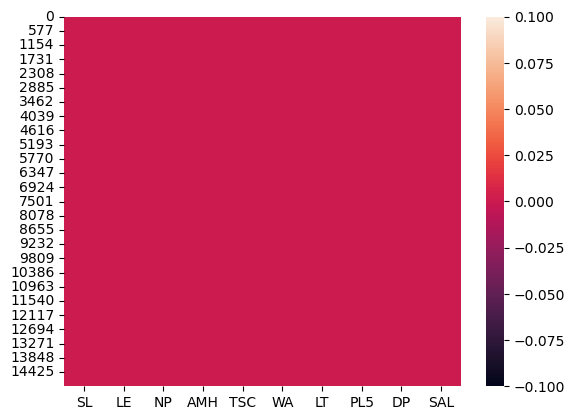

In [7]:
# ==============================================================================
# 1.8 NULL VALUES ANALYSIS
# ==============================================================================
print(df.isnull().sum())
sns.heatmap(df.isnull())

In [8]:
# ==============================================================================
# 1.9 DUPLICATE RECORD ANALYSIS AND REMOVAL
# ==============================================================================
# Identify and remove duplicate rows to ensure data integrity and prevent model bias.
# Based on Sailfort Motor information, duplicate entries are assumed to be erroneous data points.
df = df.drop_duplicates()

# Verify the new shape of the DataFrame after duplicate removal.
print("\nDataFrame Information after removing duplicates:")
df.info()

# Post-removal check: Evaluate the class distribution of the target variable 'LT'
# to understand the impact of the cleaning step on class balance.
print("\nTarget variable distribution after duplicate removal:")
print((df['LT'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')






DataFrame Information after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   SL      11991 non-null  float64 
 1   LE      11991 non-null  float64 
 2   NP      11991 non-null  int64   
 3   AMH     11991 non-null  float64 
 4   TSC     11991 non-null  int64   
 5   WA      11991 non-null  bool    
 6   LT      11991 non-null  bool    
 7   PL5     11991 non-null  bool    
 8   DP      11991 non-null  category
 9   SAL     11991 non-null  category
dtypes: bool(3), category(2), float64(3), int64(2)
memory usage: 621.1 KB

Target variable distribution after duplicate removal:
LT
False    83.4%
True     16.6%
Name: proportion, dtype: object



1.11 DATA PROFILING SUMMARY

1. Final Dataset Dimensions: The cleaned dataset comprises 11,999 records and 10 features.
2. Data Integrity: The dataset is complete, with no missing values detected.
3. Duplicate Records: A total of 3,008 duplicate entries were identified and removed.
4. Target Variable Analysis: The target variable ('LT') exhibits *a significant class imbalance*. This imbalance was slightly exacerbated by the removal of duplicate records and will require mitigation strategies during the modeling phase.

## 2. EDA

In [9]:
#-------------------------------------------------------------------------------
# 2.1 Summary Statistics for Numerical Features
# ------------------------------------------------------------------------------
# Generate descriptive statistics for all numerical features to understand their
# distribution, central tendency, and spread.
numerical_features = df.select_dtypes(include=['int64', 'float64'])
print("\nNumerical features being analyzed:")
print(numerical_features.columns)
display(numerical_features.describe().T)


Numerical features being analyzed:
Index(['SL', 'LE', 'NP', 'AMH', 'TSC'], dtype='object')


count   mean   std   min    25%    50%    75%    max
SL  11991.00   0.63  0.24  0.09   0.48   0.66   0.82   1.00
LE  11991.00   0.72  0.17  0.36   0.57   0.72   0.86   1.00
NP  11991.00   3.80  1.16  2.00   3.00   4.00   5.00   7.00
AMH 11991.00 200.47 48.73 96.00 157.00 200.00 243.00 310.00
TSC 11991.00   3.36  1.33  2.00   3.00   3.00   4.00  10.00

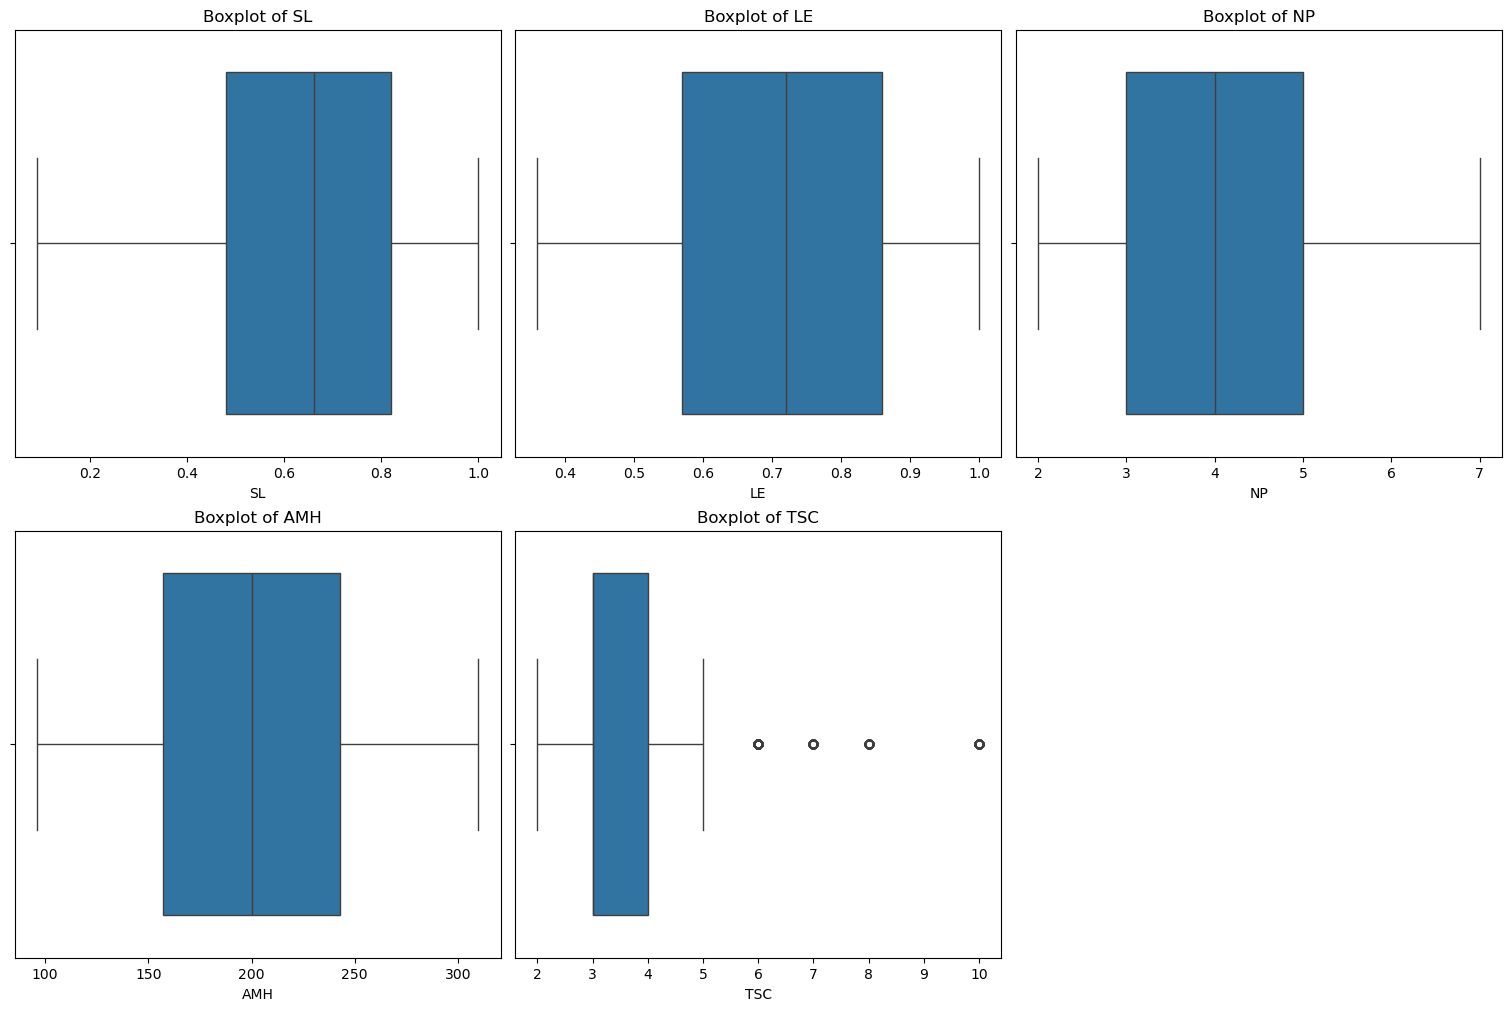

In [10]:
# ------------------------------------------------------------------------------
# 2.2 Outlier Analysis using Boxplots
# ------------------------------------------------------------------------------
# Visualize the distribution of numerical features to identify potential outliers.
# Outliers can significantly impact the performance of certain machine learning models.
plt.figure(figsize=(15, 10), constrained_layout=True)
for i, col in enumerate(numerical_features.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
file_name='Boxplots of numercal features.png'
full_path = os.path.join(output_directory, file_name)
plt.savefig(full_path, dpi=300)

plt.show()

In [11]:
# ------------------------------------------------------------------------------
# 2.3 Quantitative Outlier Detection
# ------------------------------------------------------------------------------
print('\n' + '='*50)
print('QUANTITATIVE OUTLIER ANALYSIS (1.5 * IQR RULE)')
print('='*50)

for col in numerical_features:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Identify outliers
    outlier_condition = (df[col] < lower_limit) | (df[col] > upper_limit)
    outliers = df[outlier_condition]
    
    # Print the analysis results for the current column
    print('\n' + '='*50)
    print(f'Outlier Analysis for: {col}')
    print('='*50)
    print(f'Q1: {Q1:.2f}')
    print(f'Q3: {Q3:.2f}')
    print(f'Lower Limit: {lower_limit:.2f}')
    print(f'Upper Limit: {upper_limit:.2f}')
    
    if len(outliers)>0:
        print(f'{col} have {len(outliers)} outliers')
        print(f'The outliers  of {col} are {outliers[col].value_counts()}')
        print(f'The outliers proportion of {col} is {(len(outliers)/len(df)*100):.2f} % of data')
        
    else:
        print('No outliers found')
    
   


QUANTITATIVE OUTLIER ANALYSIS (1.5 * IQR RULE)

Outlier Analysis for: SL
Q1: 0.48
Q3: 0.82
Lower Limit: -0.03
Upper Limit: 1.33
No outliers found

Outlier Analysis for: LE
Q1: 0.57
Q3: 0.86
Lower Limit: 0.13
Upper Limit: 1.29
No outliers found

Outlier Analysis for: NP
Q1: 3.00
Q3: 5.00
Lower Limit: 0.00
Upper Limit: 8.00
No outliers found

Outlier Analysis for: AMH
Q1: 157.00
Q3: 243.00
Lower Limit: 28.00
Upper Limit: 372.00
No outliers found

Outlier Analysis for: TSC
Q1: 3.00
Q3: 4.00
Lower Limit: 1.50
Upper Limit: 5.50
TSC have 824 outliers
The outliers  of TSC are TSC
6     542
10    107
7      94
8      81
Name: count, dtype: int64
The outliers proportion of TSC is 6.87 % of data



 2.4 Outlier Analysis Summary

1. The quantitative check confirms that 'TSC' (Time Spent in Company) is the only feature with a significant number of outliers.
2. A total of 824 outliers were detected in 'TSC', representing 6.87% of the data. According to the boxplot those are people who spent from 6 to 10 years in the company.
3. A *specific investigation* on the relation between outlier and attrition will be carried in the multivariate section
4. This proportion of outlier could severely impact on parametric models (e.g.,Logistic Regression) if these outliers excert high leverage on the model's coefficients.
5. Tree-based models (e.g., Random Forest), being non-parametric, are expected to be more robust to these outliers.
6. The final decision on handling these outliers (e.g., imputation, capping, or transformation) will be made during the model construction phase, where the impact of different strategies can be empirically tested.


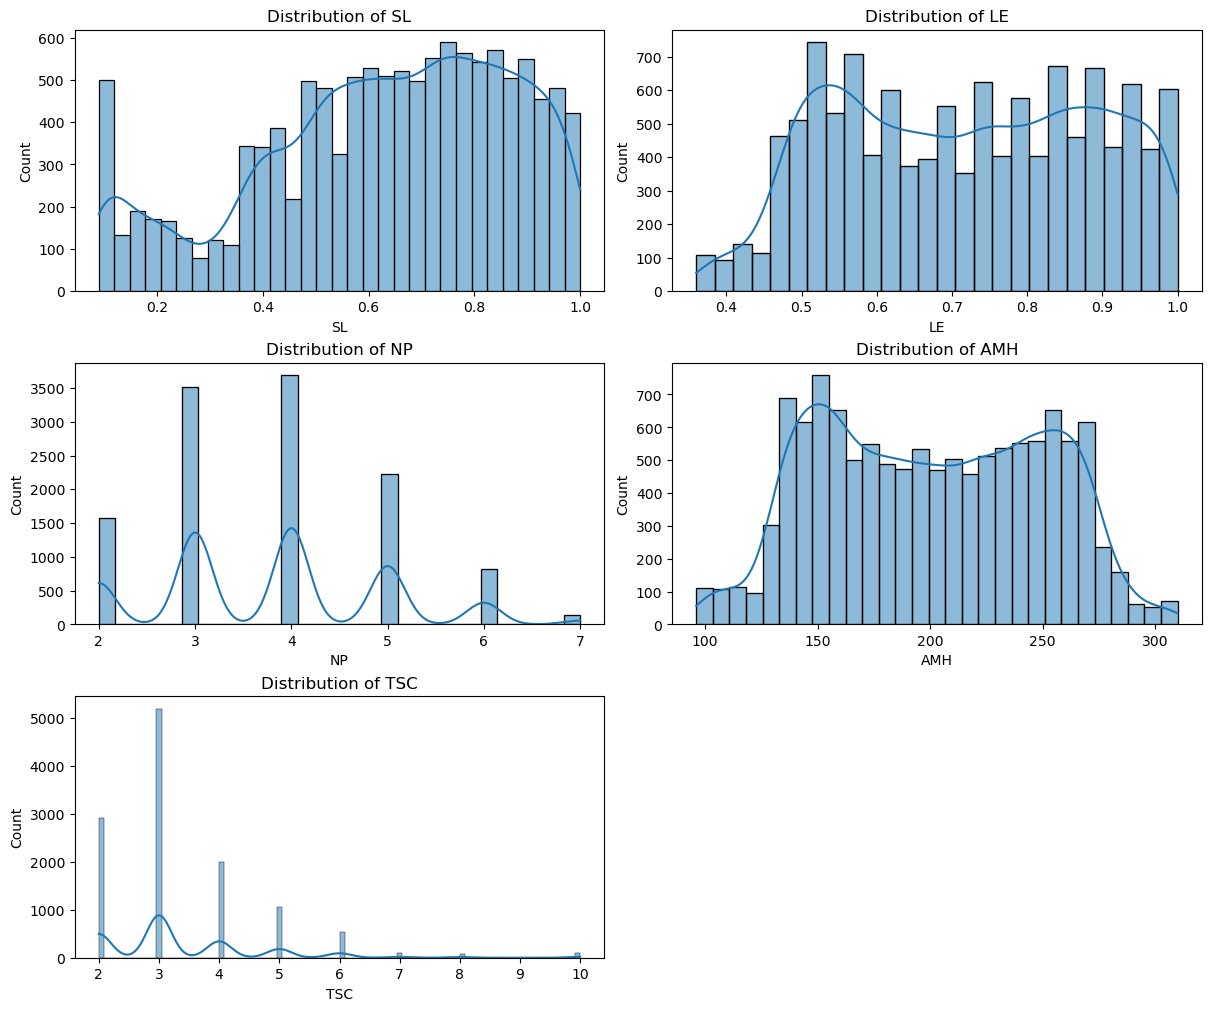

In [12]:
# ------------------------------------------------------------------------------
#2.5 Distribution of Numerical Features
# ------------------------------------------------------------------------------
# Analyze the distribution of each numerical feature using histograms.
# This helps in understanding the underlying data patterns (e.g., skewness, modality).
plt.figure(figsize=(12, 10), constrained_layout=True)
for i, col in enumerate(numerical_features.columns):
    ax = plt.subplot(3, 2, i + 1)
    sns.histplot(data=df,
                 x=col, 
                 kde=True, 
                 ax=ax
                )
    ax.set_title(f'Distribution of {col}')


file_name='Histograma of numerical features.png'
full_path = os.path.join(output_directory, file_name)
plt.savefig(full_path, dpi=300)

plt.show()




    

2.6 Distribution Analysis Summary
1. Distribution of SL: The Satisfication Level (SL) variable exhibits a bimodal distribution. There's a small cluster of data around the 0.1-0.2 range and a much larger, broader peak centered at approximately 0.7-0.8. This suggests the presence of two distinct groups within the data for this feature. The relation between the two cluster will be investivate during the multivariate analysis.
2. Distribution of LE: The Last Evaluation (LE) histogram shows a multimodal distribution, with several peaks apparent between 0.5 and 0.9. The distribution is also slightly left-skewed, indicating that while the data is spread out, there are more instances concentrated at the higher end of the range.
4. Distribution of NP: Number of Project (NP) is a descrete variable with a highly right-skewed distribution. The most frequent value (the mode) is 4, with counts decreasing sharply for higher values. This indicates that lower values of NP are much more common in this dataset.
5. Distribution of AMH: The Avarage Monthly Hours (AMH) variable displays a bimodal distribution, with two clear peaks. One prominent peak is located around 150, and a second, wider peak is visible between 250 and 275. This pattern suggests that the data for AMH likely originates from two different underlying groups.
6. Distribution of TSC: Similar to NP, TSC is a discrete variable with a strong right-skewed distribution. The value 3 is the most common, and the frequency of occurrence drops off quickly as the values increase. This shows a strong prevalence of lower TSC values.

In [13]:
# ------------------------------------------------------------------------------
# 2.7 Quantitative Normality Analysis (Skewness & Kurtosis)
# ------------------------------------------------------------------------------
# Assess the normality of numerical feature distributions by calculating skewness and kurtosis.
# Skewness measures the asymmetry, while kurtosis measures the "tailedness" of the distribution.

def interpret_skew(value):
    """Interpret skewness coefficient based on its magnitude."""
    if abs(value) < 0.5:
        return 'Symmetric (approx.)'
    elif 0.5 <= abs(value) < 1:
        return 'Moderate skewness'
    else:
        return 'High skewness'

def interpret_kurtosis(value):
    """Interpret kurtosis coefficient (Fisher's definition, where 0 is normal)."""
    if value < -0.5:
        return "Platykurtic (light-tailed)"
    elif -0.5 <= value <= 0.5:
        return "Mesokurtic (normal-tailed)"
    else:
        return "Leptokurtic (heavy-tailed)"

def calculate_dist_stats(df, numerical_col):
    """Calculate and interpret skewness and kurtosis for numerical columns."""
    results = []
    for col in numerical_col:
        skew_val = skew(df[col])
        kurt_val = kurtosis(df[col], fisher=True)
        results.append({
            'Variable': col,
            'Skewness': skew_val,
            'Skewness_Interpretation': interpret_skew(skew_val),
            'Kurtosis': kurt_val,
            'Kurtosis_Interpretation': interpret_kurtosis(kurt_val)
        })
    return pd.DataFrame(results)

# Display the calculated statistics in a DataFrame.
display(calculate_dist_stats(df, numerical_features))

Variable  Skewness Skewness_Interpretation  Kurtosis  \
0       SL     -0.54       Moderate skewness     -0.52   
1       LE     -0.03     Symmetric (approx.)     -1.18   
2       NP      0.33     Symmetric (approx.)     -0.40   
3      AMH      0.03     Symmetric (approx.)     -1.08   
4      TSC      1.82           High skewness      5.14   

      Kurtosis_Interpretation  
0  Platykurtic (light-tailed)  
1  Platykurtic (light-tailed)  
2  Mesokurtic (normal-tailed)  
3  Platykurtic (light-tailed)  
4  Leptokurtic (heavy-tailed)

In [14]:
# ------------------------------------------------------------------------------
# 2.8 Multimodality Analysis
# ------------------------------------------------------------------------------
# Discovering the modes and anti-modes could be very useful to create data-driven binning of the features
#This will be useful for creating logit model as a baseline or improving the intepratibility of simple decision trees
#for non-technical audince
modality_results=[]
for col in numerical_features:
    # The .mode() method returns a Series of the most frequent value(s).
    # The number of modes is the length of this Series.
    num_modes=len(df[col].mode())
    modality_results.append({
        'Variable': col,
        'Number_of_Modes': num_modes,
        'Interpretation': 'Unimodal' if num_modes==1 else 'Multimodal',
        'Mode': df[col].mode().to_list()      
        })
# Display the modality analysis results.
display(pd.DataFrame(modality_results))

#test multimodality
diptest_results=[]
alpha=0.05
for col in numerical_features: 
    data=df[col].values #extract data, Hartigan's Dip Test works on Cumulative Distribution Funciont
    #execute Hartigan's Dip Test
    dip,p_value=diptest(data)
    if p_value < alpha:
        interpretation = 'Multimodal (p < 0.05)'
    else:
        interpretation = 'Unimodal (p >= 0.05)'
    diptest_results.append({
        'Variable': col,
        'Dip Statistic': f"{dip:.4f}",
        'P-value': f"{p_value:.4f}",
        'Interpretation': interpretation
    })

# Create a DataFrame with the results and display it
display(pd.DataFrame(diptest_results))



        
    

Variable  Number_of_Modes Interpretation            Mode
0       SL                1       Unimodal          [0.74]
1       LE                1       Unimodal          [0.55]
2       NP                1       Unimodal             [4]
3      AMH                2     Multimodal  [149.0, 156.0]
4      TSC                1       Unimodal             [3]

Variable Dip Statistic P-value         Interpretation
0       SL        0.0160  0.0000  Multimodal (p < 0.05)
1       LE        0.0176  0.0000  Multimodal (p < 0.05)
2       NP        0.1468  0.0000  Multimodal (p < 0.05)
3      AMH        0.0149  0.0000  Multimodal (p < 0.05)
4      TSC        0.1213  0.0000  Multimodal (p < 0.05)

 2.9 Revised Normality and Multimodality Analysis Summary

1.  **Hartigan's Dip Test** reveals all continuos features are statistically **multimodal** (p < 0.0001). This robust finding indicates that distinct subgroups of employees exist for all variables, superseding prior visual assessments. Those sub-groups may be correlated with attrition risk.

2.  **Distribution properties**:
    a) **Skewness**: `TSC` is highly skewed (1.82) and `SL` is moderately skewed (-0.54). `LE`, `NP`, and `AMH` are symmetric.
    b) **Tails**: `TSC` is heavy-tailed (Leptokurtic, Kurtosis = 5.14), indicating rare outliers who might represent a unique employee cohort.

---
Implications for the ML Pipeline (Objective: Minimize False Negatives)

1.  **Prioritize Feature Engineering**: Create categorical variables that explicitly define the subgroups within each feature. This will help the model distinguish between different employee profiles and better identify high-risk groups, which is critical for reducing the number of at-risk employees we fail to flag. Those categories will be used for baseline logit model or simple tree model to explain results to non-technical audience

2.  **Favor Tree-Based Models**: Use algorithms like Random Forest and XGBoost. They are inherently suited to capture the complex, non-linear patterns of employee turnover that exist within these subgroups, improving our ability to find at-risk employees that simpler models would miss.

3.  **Use RobustScaler for TSC**: The heavy tails and high skew of `TSC` mean outliers could disproportionately influence the model. Using RobustScaler mitigates this, ensuring the model's predictions are reliable across all employee types and not just skewed by extreme cases.

4.  **Apply Baseline Transformations**: For linear or distance-based models, apply transformations (e.g., Box-Cox) to skewed features (`TSC`, `SL`) and use StandardScaler as a baseline for the others. This ensures model compatibility and provides a solid benchmark against our primary tree-based approaches.

5.  After the creation of a baseline tree model, **apply k-means** clustering techniques to improve predictions and/or if cluster created by tree model are difficult to interpret







Overview of Categorical and Boolean Features:
<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   WA      11991 non-null  bool    
 1   LT      11991 non-null  bool    
 2   PL5     11991 non-null  bool    
 3   DP      11991 non-null  category
 4   SAL     11991 non-null  category
dtypes: bool(3), category(2)
memory usage: 152.7 KB


None

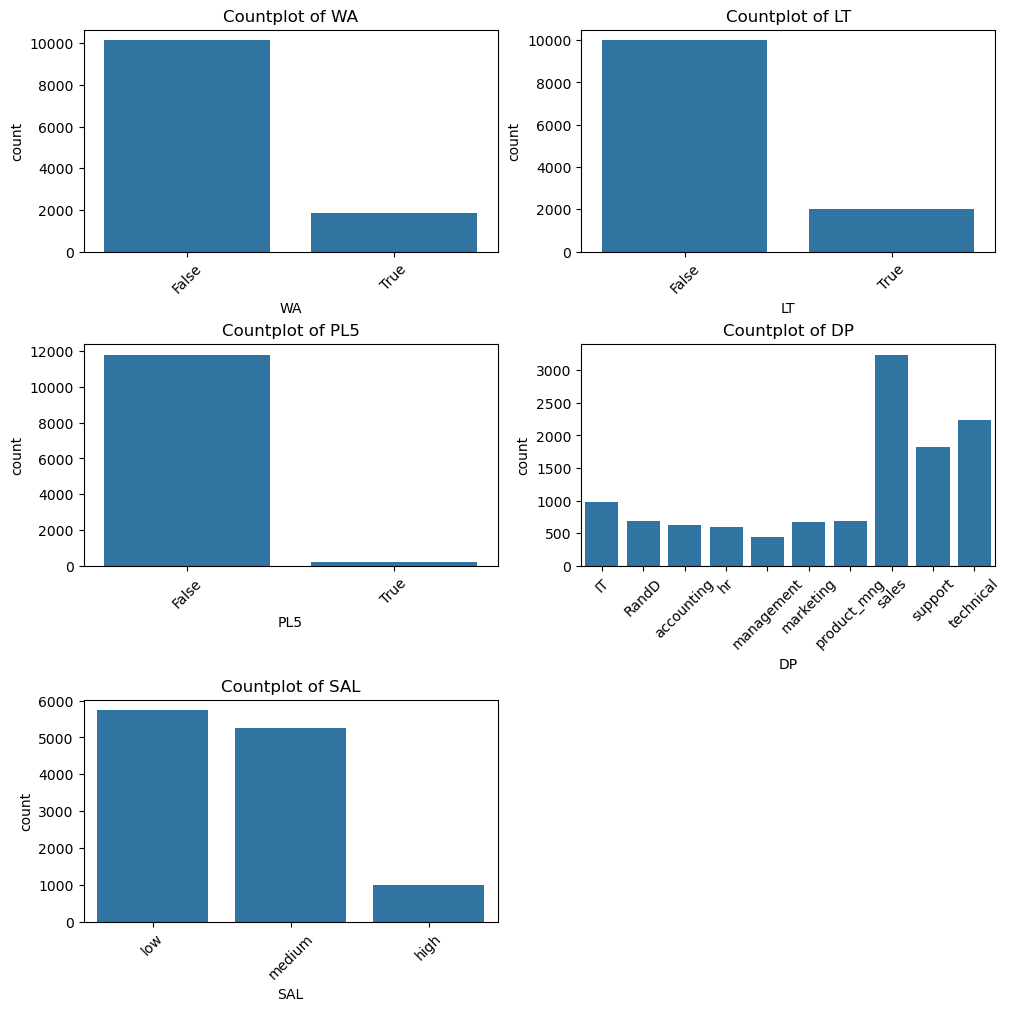

In [15]:
# ------------------------------------------------------------------------------ 
#2.10 Univariate Analysis of Categorical Features
# ------------------------------------------------------------------------------

# Isolate and inspect the categorical and boolean features to understand their structure.
categorical_features = df.select_dtypes(['boolean', 'category'])
print("\nOverview of Categorical and Boolean Features:")
display(categorical_features.info())

# Visualize the frequency distribution of each categorical and boolean feature.
plt.figure(figsize=(10,10), constrained_layout=True)
for i, col in enumerate(categorical_features):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)


file_name=f'Countplot of categorical features.png'
full_path = os.path.join(output_directory, file_name)
plt.savefig(full_path, dpi=300)

plt.show()

In [16]:
# -------------------------------------------------------------------------------------------------------- 
#2.11 Generate frequency tables for all categorical and boolean features to understand their distribution.
# --------------------------------------------------------------------------------------------------------

for col in categorical_features:
    print('\n' + '='*50)
    print(f'Frequency table for {col}')
    print('='*50)
    print(categorical_features[col].value_counts())
    print('')
    print((categorical_features[col].value_counts(normalize=True)*100).round(2).astype('str')+'%')


Frequency table for WA
WA
False    10141
True      1850
Name: count, dtype: int64

WA
False    84.57%
True     15.43%
Name: proportion, dtype: object

Frequency table for LT
LT
False    10000
True      1991
Name: count, dtype: int64

LT
False    83.4%
True     16.6%
Name: proportion, dtype: object

Frequency table for PL5
PL5
False    11788
True       203
Name: count, dtype: int64

PL5
False    98.31%
True      1.69%
Name: proportion, dtype: object

Frequency table for DP
DP
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

DP
sales          27.01%
technical      18.71%
support        15.19%
IT              8.14%
RandD           5.79%
product_mng     5.72%
marketing       5.61%
accounting      5.18%
hr              5.01%
management      3.64%
Name: proportion, dtype: object

Frequency table for SAL
SAL
low     

2.12 Categorical Feature Analysis Summary

1. Class Imbalance: **A significant class imbalance** is evident across all boolean features. The target variable LT (Left) shows that only 16.6% of employees have left. The imbalance is even more pronounced for PL5 (Promotion in Last 5 Years), where only 1.69% of employees received a promotion, and  WA (Work Accident), with 15.43% of employees having had an accident.
2. Feature Distribution:
    - Department (DP): The employee distribution is uneven across departments, with Sales (27.01%),Technical (18.71%), and Support (15.19%) being the three largest groups .
    - Salary (SAL): The majority of employees fall into the low (47.87%) and medium (43.87%) salary brackets, with a small percentage earning a high salary (8.26%) .

**Immplication for the Business**

1. The high imabalance for LT where few people leave the company, suggests an healthy work environment, where few people decide to leave the company
2. Very few people are promoted after 5 years. This class imbalance affect only a minority of the employee because the histograms analysis shows that people after 6 years are a specific cohort of employee. In the following section we will analyze if this results affects employee turn-over
3. SAL distribution seems balanced, where only a minority (top senior, top manager) have a high salary 

**Implications for the ML Pipeline**

**Address Class Imbalance**: The severe imbalance, especially in the target variable LT and predictor PL5, must be addressed during modeling using techniques like SMOTE or class weighting to prevent the model from being biased towards the majority class. This is critical for achieving the project's objective of minimizing False Negatives.

**Apply One-Hot Encoding**: Categorical features with multiple levels, such as DP and SAL, will require one-hot encoding to be used in the machine learning models. This will prevent the algorithms from incorrectly assuming an ordinal relationship between the categories.

**For DP** The uneven distribution could affect how well the DP variable predicts attrition across departments. We should evaluate whether clustering departments enhances attrition classification accuracy.

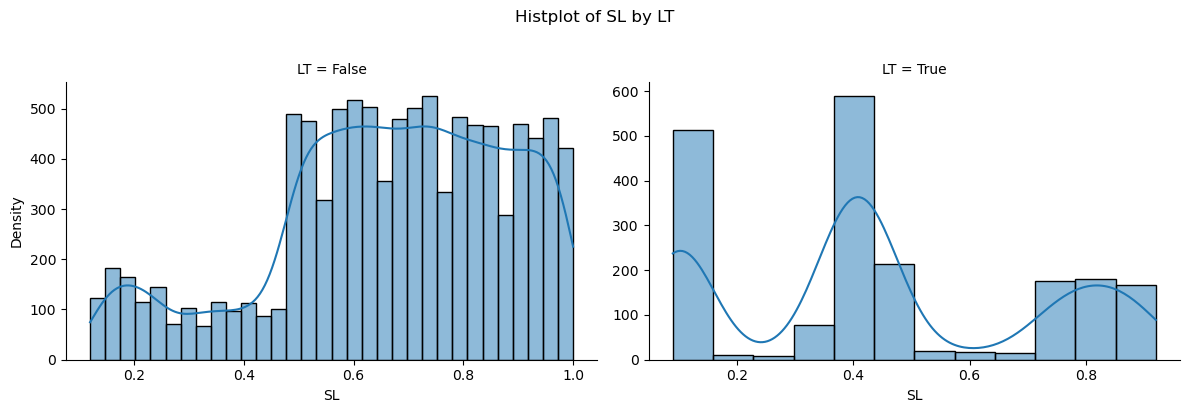

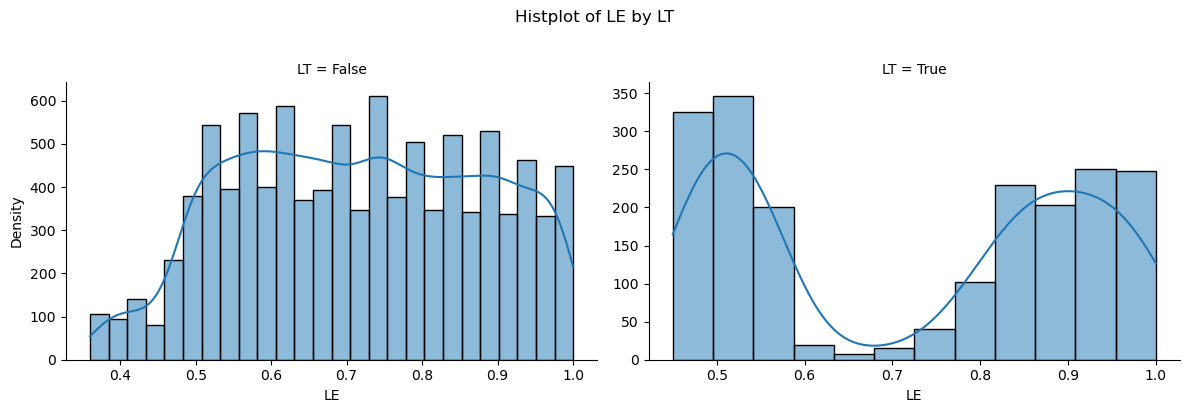

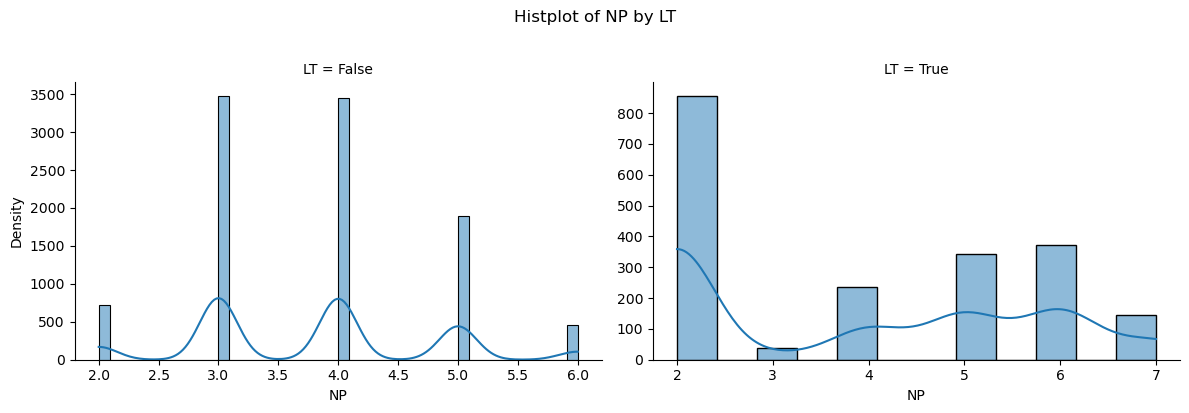

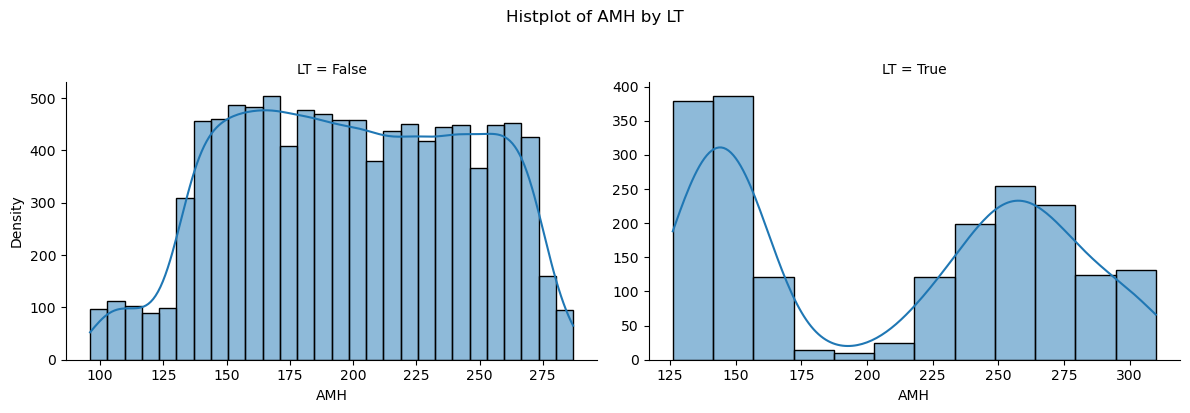

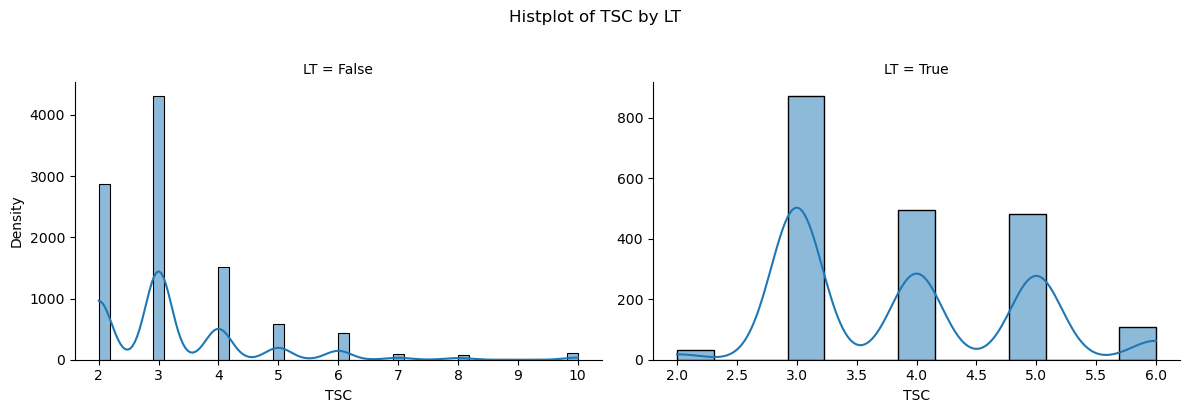

In [17]:
# ==============================================================================
# 2.13 FACETED HISTOGRAMS: COMPARING NUMERICAL DISTRIBUTIONS BY ATTRITION
# ==============================================================================
# This section generates faceted histograms to visualize and compare the distribution
# of each numerical feature for two distinct employee groups: those who left (LT=True)
# and those who stayed (LT=False). This side-by-side comparison is crucial for
# identifying different behavioral patterns between the two cohorts.


# The plt.figure() call is commented out because sns.FacetGrid creates its own figure
# for each iteration of the loop. Including it would create an unnecessary empty plot.


# Iterate through each numerical column to create a separate set of plots.
for col in numerical_features:
    # Initialize a FacetGrid object, which creates the structure for the subplots.
    # - col='LT': This is the key parameter that splits the data into separate columns
    #   based on the employee's attrition status (stayed vs. left).
    # - sharex=False, sharey=False: Allows each subplot to have independent axis scales.
    #   This is vital because the number of employees and the data range for those
    #   who stayed versus those who left can be very different.
    g = sns.FacetGrid(data=df, 
                      col='LT', 
                      col_wrap=2, 
                      height=4, 
                      aspect=1.5,
                      sharex=False,
                      sharey=False,
                     )
    
    # Map the sns.histplot function onto each facet (subplot) of the grid.
    g.map(sns.histplot, col, kde=True, color='#1f77b4')

    # Set clear axis labels for each subplot.
    g.set_axis_labels(col, "Density")

    # Add a title for the entire figure (the FacetGrid).
    # The 'y' parameter adjusts the title's vertical position to prevent overlap.
    g.fig.suptitle(f"Histplot of {col} by LT", y=1.02)
    plt.tight_layout()
    file_name=f'Faceted Hist of {col} vs LT.png'
    full_path = os.path.join(output_directory, file_name)
    plt.savefig(full_path, dpi=300)






**2.14 Faceted Histogram Analysis Summary**

This analysis deconstructs feature distributions by attrition status (LT), revealing critical patterns that inform the subsequent modeling process.

**Part 1: Feature Distribution Analysis**

This section describes the statistical properties observed for retained (LT=False) and churned (LT=True) employees.

1. **Satisfaction Level (SL)**
Employees who Left: Exhibit a clear trimodal distribution, indicating three distinct churn sub-populations:
A large group of highly dissatisfied employees (mode at SL ≈ 0.1).
A second group of moderately dissatisfied employees (mode at SL ≈ 0.4).
A significant third group of highly satisfied employees (mode at SL > 0.7), suggesting a "burnout" profile.
Employees who Stayed: Present a healthy, unimodal distribution that is left-skewed, with a strong central tendency above SL=0.6.

2. **Last Evaluation (LE)**
Employees who Left: The distribution is distinctly bimodal, with one mode representing low-rated employees (LE ≈ 0.5) and a second, equally significant mode representing top-rated employees (LE > 0.8).
Employees who Stayed: Display a unimodal, left-skewed distribution, indicating that most retained employees are rated favorably.

3. **Average Monthly Hours (AMH)**
Employees who left: The bimodal distribution clearly identifies two at-risk profiles: the under-utilized (mode at ~150 hours) and the overworked (mode at >250 hours).
Employees who Stayed: This cohort shows a starkly different, unimodal, centrally-peaked distribution around a "healthy" workload of ~200 hours.

4. **Time Spent in Company (TSC)**
Employees who Left: The distribution is heavily concentrated in the 3-5 year range, establishing this as the highest-risk tenure window. **Year 5 represents a critical tipping point**, where the number of employees leaving is approximately equal to the number of employees staying.
Employees who Stayed: The distribution is more uniform and, critically, the outliers (tenure >= 7 years) are composed entirely of retained employees, signifying a highly loyal cohort. **TSC =5 required a specific analysis to understand why this year is a critical tipping point** and what kind of impact it can have on business and the ML model. This analysis will be performed after the multivariate analysis of both numerical and categorical features

**Part 2: Implications for the ML Pipeline**

This section outlines actionable steps for modeling based on the analysis above.

1. **Model Selection**

**Favor Non-Linear Models**: The multi-modal and U-shaped distributions observed in SL, LE, and AMH confirm that the relationship between features and the target is highly non-linear. This strongly suggests that tree-based models (like Random Forest or XGBoost), which can intrinsically capture these complex splits, will be more effective than standard linear models.

**Linear Model Requirements**: If a linear model (e.g., Logistic Regression) is used for interpretability, it will require extensive feature engineering (e.g., binning, polynomial features) to approximate this complexity.

3. **Feature Engineering**

**Create Categorical Features**: The clear bimodal split in AMH for churned employees makes it a prime candidate for creating a new categorical feature, such as workload_category (e.g., 'Under-utilized', 'Normal', 'Overworked'). This will help the model learn the thresholds more explicitly.

**Develop Interaction Features**: The "burnout" profile (high satisfaction, high evaluation, high hours) suggests that interaction features will be powerful. For example, a feature like high_le_x_high_amh could explicitly model the risk for overworked top performers.

4. **Data Preprocessing and Outlier Handling**
**Retain Outliers in TSC**: The analysis confirms that long-tenured employees are not anomalous outliers but a valid, highly loyal cohort. Therefore, these data points should not be removed, as doing so would discard valuable information about retention.
**Use Robust Scaling**: Given the presence of distinct clusters and some skewness, RobustScaler may be preferred over StandardScaler. RobustScaler is less sensitive to outliers and may preserve the structure of the different employee subgroups better during scaling.



<Figure size 2500x2500 with 0 Axes>

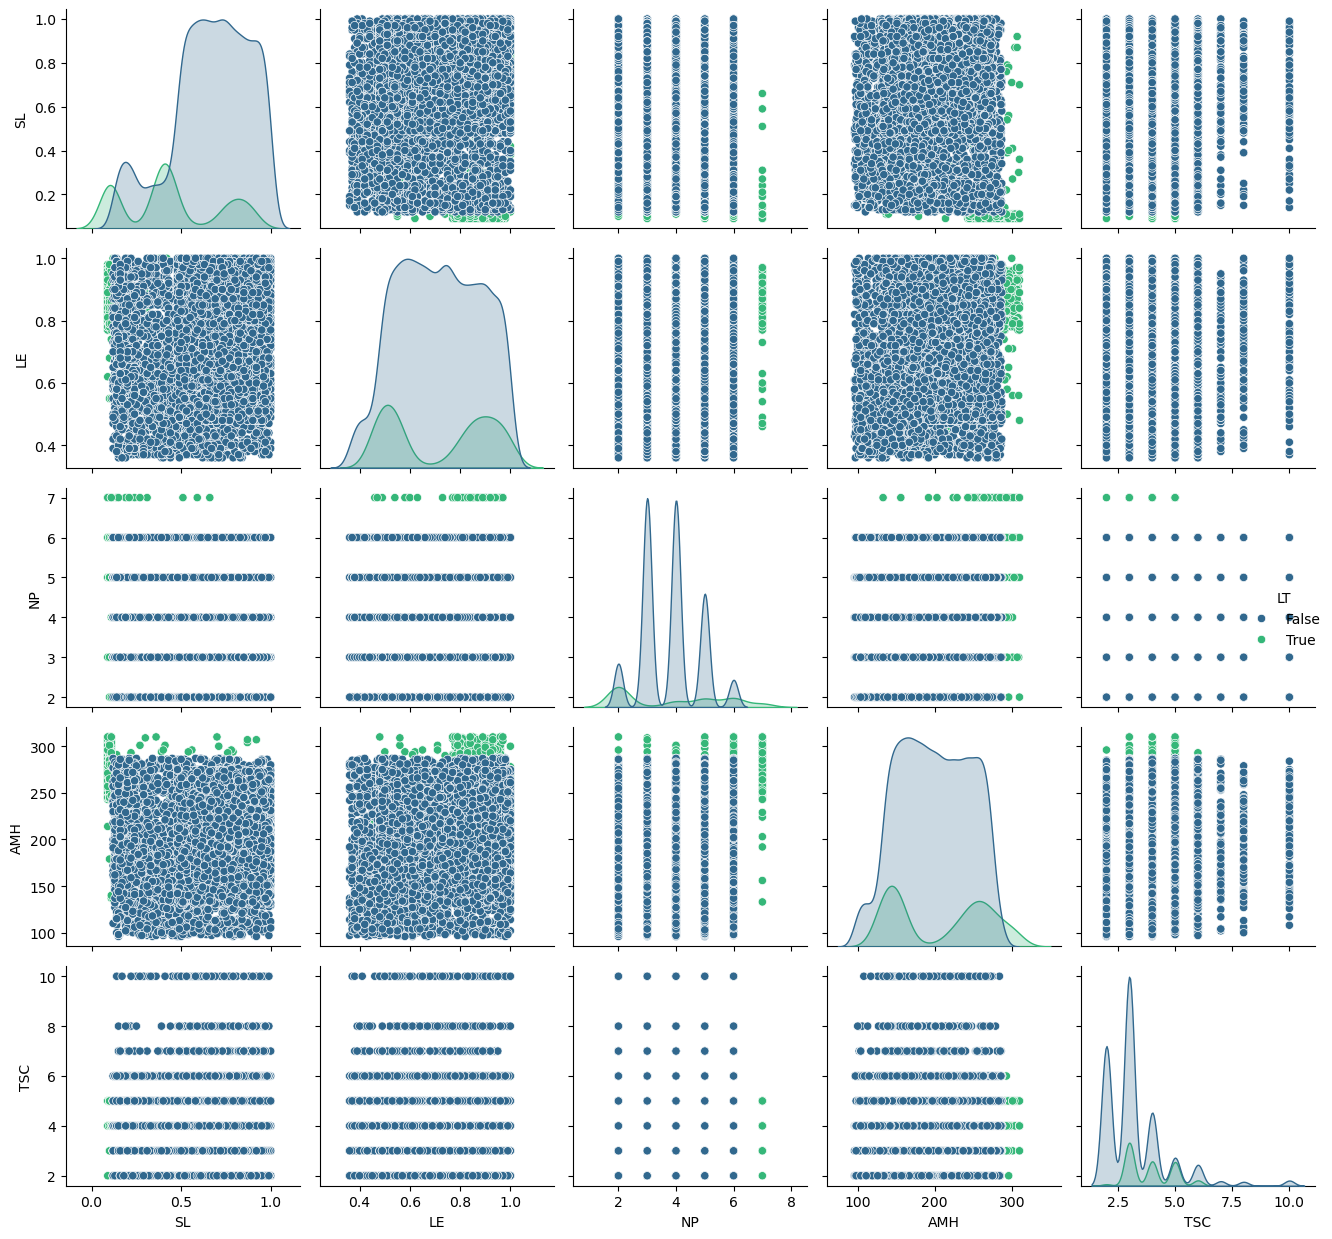

In [18]:
#graph analysis of the iteraction effect of features on LT
#add LT  to numerical_features to simplify pairplot and corr function
numerical_features2=numerical_features.join(df[['LT']]) #analyzing scatter plot of numerical features by LT
#the goal is to analyze the combined effect of features in creating LT=1 clusters

plt.figure(figsize=(25, 25))


sns.pairplot(data=numerical_features2, 
             hue='LT', 
             palette='viridis',
             kind='scatter',
             corner=False)

file_name='Pariplot of numercal features.png'
full_path = os.path.join(output_directory, file_name)
plt.savefig(full_path, dpi=300)

plt.tight_layout()

plt.show()


**2.14 Pairplot Analysis Summary**

These plots are where the profiles truly come to life by showing how the variables interact. The most revealing clusters of churned employees are:

**The "Underutilized and Disengaged"** Profile:
1. **Characteristics**: These employees exhibit low satisfaction (SL < 0.2), receive low evaluation scores (LE ≈ 0.5), and have low average monthly hours (AMH ≈ 150), often assigned to only two projects (NP = 2).
2. **Interpretation**: This group is likely disengaged, bored, and underperforming. They are not challenged or valued, leading them to seek opportunities elsewhere. 

**The "Overworked Top Performer"** Profile:
1. **Characteristics**: This group shows high satisfaction (SL > 0.7), receives excellent evaluations (LE > 0.8), but works an unsustainable number of hours (AMH > 250) across many projects (NP = 6 or 7).
2. **Interpretation**: These are the company's star players who, despite being satisfied and well-regarded, are at high risk of burnout. Their departure represents the most significant loss of talent for the company. 


**The "Stagnating Professional"** Profile:
1. Characteristics: This profile is primarily defined by a tenure of 3 to 5 years (TSC). Their satisfaction and evaluation scores are often moderate, but they have reached a critical point in their career trajectory.
2. Interpretation: Employees in this group may feel their career has stalled. A lack of internal growth opportunities, rather than active dissatisfaction or overwork, prompts them to look for new challenges externally. 

**Conclusions and Implications for Modeling**
This multi-faceted analysis provides a clear roadmap for the modeling process and yields critical insights for HR strategy.
1. **Non-Linearity is Key**: The relationships between employee metrics and churn are definitively non-linear. The distinct, U-shaped, and multi-modal patterns observed confirm that linear models would be ineffective without extensive feature engineering.
2. **Tree-Based Models** are the Ideal Choice: The identified profiles are perfectly suited for tree-based algorithms like Random Forest and Gradient Boosting.
3. These models excel at partitioning data and can learn rules that precisely isolate the high-risk clusters, such as:
        - IF (AMH > 250) AND (LE > 0.8) THEN predict churn (capturing the "Overworked Top Performer").
        - IF (SL < 0.2) AND (NP = 2) THEN predict churn (capturing the "Underutilized and Disengaged").

**Interaction is the Main Driver**: The analysis confirms that churn is driven by the combination of factors rather than any single metric. The interaction between workload, performance, satisfaction, and tenure tells a clear story that provides actionable, data-driven insights for HR and management to build a proactive retention strategy. 

Correlation Matrix - Numerical Features

       SL   LE    NP   AMH   TSC
SL   1.00 0.10 -0.13 -0.01 -0.15
LE   0.10 1.00  0.27  0.26  0.10
NP  -0.13 0.27  1.00  0.33  0.19
AMH -0.01 0.26  0.33  1.00  0.10
TSC -0.15 0.10  0.19  0.10  1.00



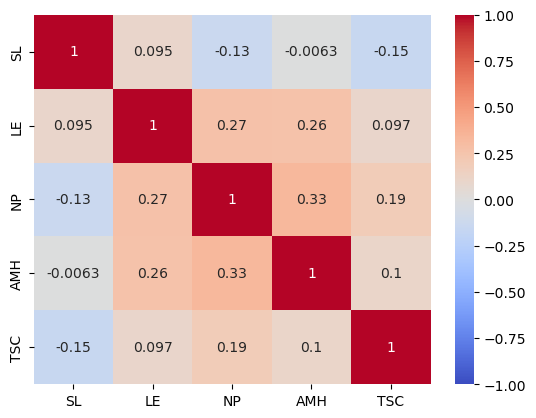

In [19]:
# =================================================================
# 2.15 BIVARIATE ANALYSIS: NUMERICAL FEATURE CORRELATION
# =================================================================
# In this section, we assess the degree of linear association (multicollinearity)
# between the numerical features.
# Understanding these relationships is crucial for two main reasons:
# 1. High correlation can destabilize the interpretation of linear models (e.g., Logistic Regression).
# 2. It helps confirm our hypothesis that the relationships driving attrition are non-linear,
#    justifying the use of more complex, tree-based models.
#3. If linear correlation is not significant, we will proceed with 2 different:
#    a) Calculating the comparative correlation for attrition status
#    b) Calculating the Chatterjee correlation  and comparative Chatterjee correlation for attrition status
#       to asses nonlinear association between variables

# Calculate the Pearson correlation matrix for all numerical features.
corr = numerical_features.corr()

print('Correlation Matrix - Numerical Features')
print('')
print(corr) # 
print('')

# Visualize the correlation matrix using a heatmap for quick identification of strong relationships.
# Setting vmin and vmax ensures the color scale is consistent and centered at 0.
# annot=True displays the numeric correlation value in each cell for precise analysis.
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            annot=True,
            cmap='coolwarm')

file_name=f'Heatmap Correlation.png'
full_path = os.path.join(output_directory, file_name)
plt.savefig(full_path, dpi=300)



2.16 **Correlation Analysis Summary**

The correlation matrix and the corresponding heatmap reveal that the  linear relationships between the numerical features are predominantly weak. The highest positive correlations are observed between NP (Number of Projects) and AMH (Average Monthly Hours) at 0.33, and between LE (Last Evaluation) and NP at 0.27. All other correlations are even closer to zero.

**Implications for Modeling**:

1. **Confirms Non-Linearity**: The lack of strong linear relationships reinforces the findings from the faceted histograms and scatter plots. It provides further evidence that employee churn is driven by complex, non-linear interactions rather than simple linear trends.
2. **Low Risk of Multicollinearity**: For tree-based models, which are the primary candidates for the final model, this low correlation is not a significant issue. For any potential linear models used for benchmarking, it indicates a low risk of multicollinearity among the numerical predictors.
3. **Focus on Interactions**: This result strengthens the strategy to focus on feature engineering and models that can capture the combined effects of variables, as single features have limited linear predictive power on their ownd

--- Visual Comparison of Correlation Matrices ---


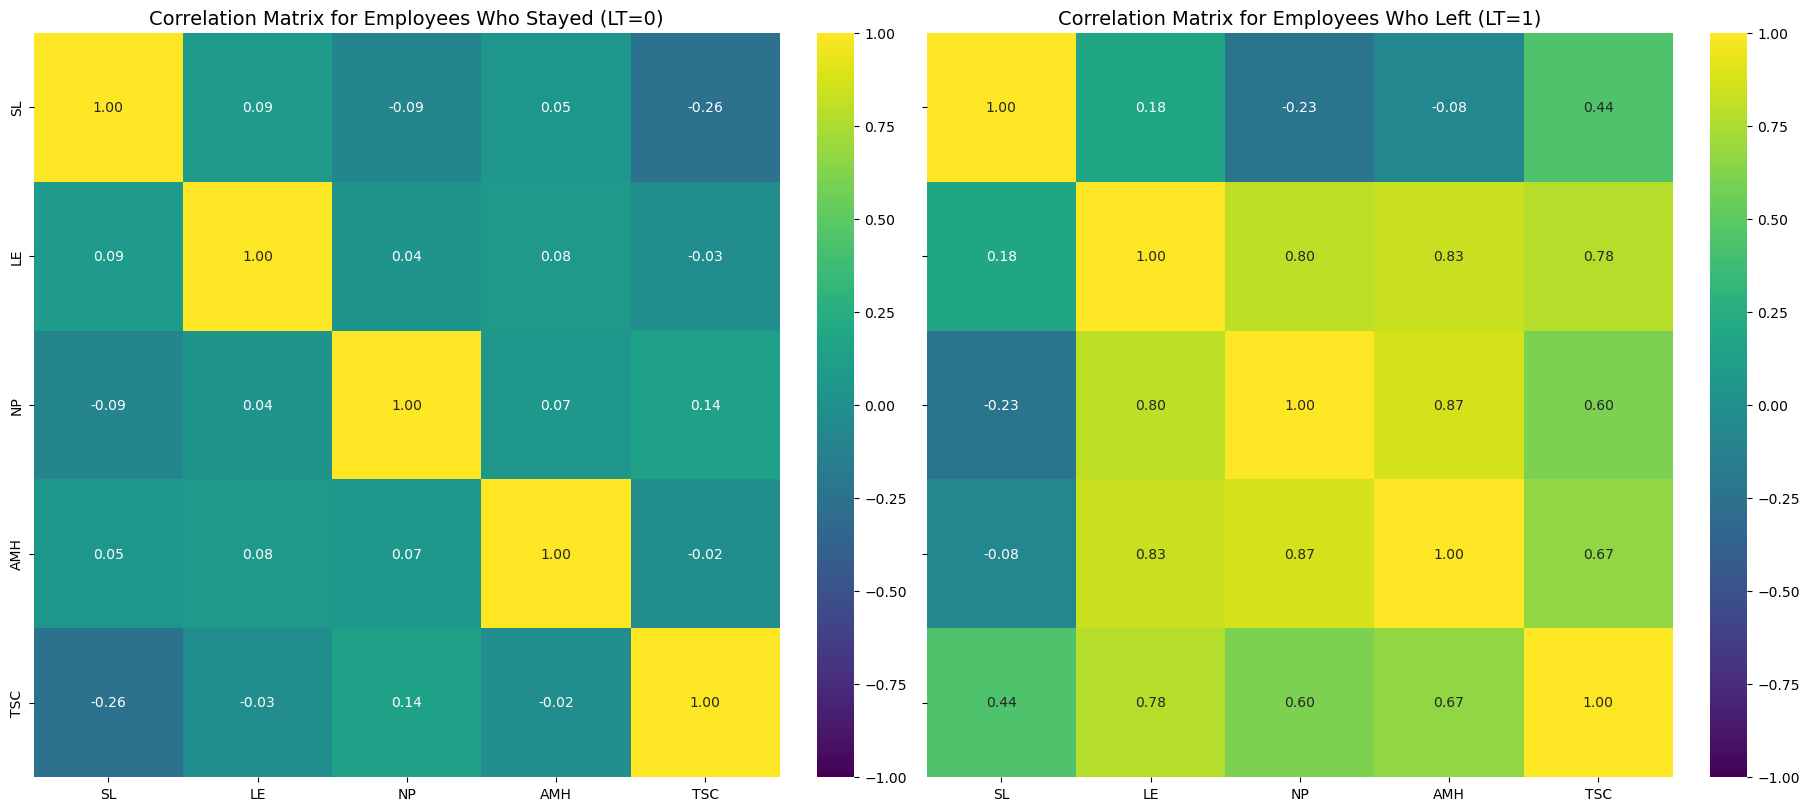

Highly correlated pairs for the 'stayed' group:
Series([], dtype: float64)

Highly correlated pairs for the 'left' group:
LE   NP    0.80
     AMH   0.83
NP   LE    0.80
     AMH   0.87
AMH  LE    0.83
     NP    0.87
dtype: float64

Medium correlated pairs for the 'stayed' group:
Series([], dtype: float64)

Medium correlated pairs for the 'left' group:
LE   TSC   0.78
NP   TSC   0.60
AMH  TSC   0.67
TSC  LE    0.78
     NP    0.60
     AMH   0.67
dtype: float64

--- Numerical Difference Between Correlation Matrices (Left - Stayed) ---
Positive values mean the correlation is stronger for employees who LEFT.
Negative values mean the correlation is stronger for employees who STAYED.


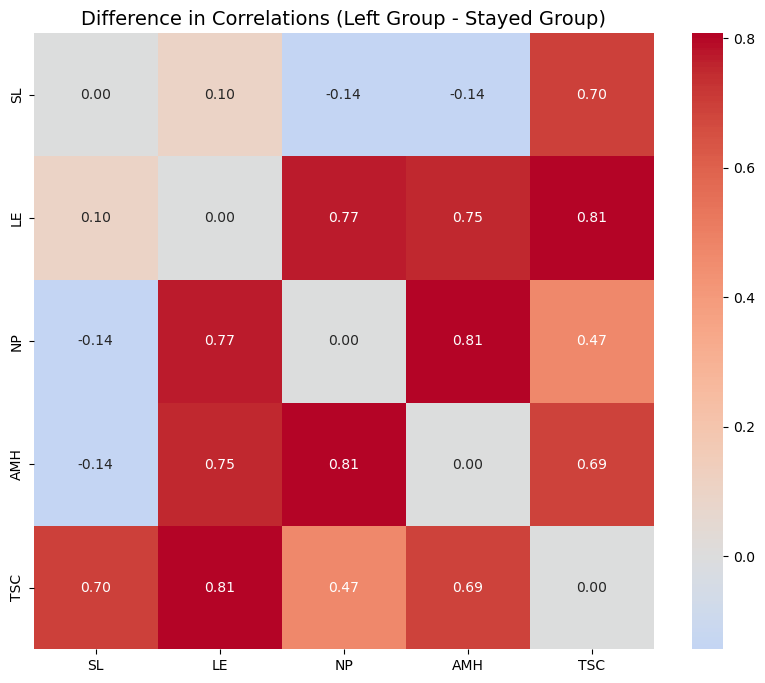


--- Top 5 Biggest Changes in Correlation ---
TSC  LE    0.40
LE   TSC   0.40
NP   AMH   0.40
AMH  NP    0.40
LE   NP    0.38
NP   LE    0.38
AMH  LE    0.38
LE   AMH   0.38
SL   TSC   0.35
TSC  SL    0.35
dtype: float64


In [20]:
# ==============================================================================
# 2.16 COMPARATIVE CORRELATION ANALYSIS BY ATTRITION STATUS
# ==============================================================================
# This section analyzes how the linear relationships between numerical features
# differ between employees who stayed and those who left.
# By comparing the two correlation matrices, we can identify shifts in behavior
# that are associated with attrition. Due to the high class imbalance, this approach
# can avoid the linear relationships for people who stayed, overcome those for people
# who left
# ==============================================================================

# 1. DATA PREPARATION: SPLIT BY ATTRITION STATUS
# ------------------------------------------------------------------------------
# Create two separate DataFrames to isolate each group for comparison.
# Select only numerical dtypes for correlation analysis.
#To ensure a fair comparison, we focus on the tenure range (<7 years) where both attrition and retention are observed."
#We will perform a separate analysis to understand the differences in this cohoort
df_stayed = df[(df['LT'] == False) & (df['TSC']<7)].select_dtypes(['int64','float64'])
df_left = df[(df['LT'] == True) & (df['TSC']<7)].select_dtypes(['int64','float64'])

# Calculate the correlation matrix for each subgroup.
corr_stayed = df_stayed.corr()
corr_left = df_left.corr()


# 2. VISUAL COMPARISON OF CORRELATION MATRICES
# ------------------------------------------------------------------------------
# Visualize the two matrices side-by-side to qualitatively assess differences.
print("--- Visual Comparison of Correlation Matrices ---")

# Setup the matplotlib figure to hold two subplots.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 8), sharey=True, constrained_layout=True)

# Plot the heatmap for employees who stayed.
sns.heatmap(corr_stayed, annot=True, fmt=".2f", cmap='viridis', ax=ax1, vmin=-1, vmax=1)
ax1.set_title('Correlation Matrix for Employees Who Stayed (LT=0)', fontsize=14)

# Plot the heatmap for employees who left.
sns.heatmap(corr_left, annot=True, fmt=".2f", cmap='viridis', ax=ax2, vmin=-1, vmax=1)
ax2.set_title('Correlation Matrix for Employees Who Left (LT=1)', fontsize=14)

file_name=f'Corr Satyed vs Corr Left.png'
full_path = os.path.join(output_directory, file_name)
plt.savefig(full_path, dpi=300)

plt.show()


# 3. QUANTITATIVE ANALYSIS OF CORRELATION STRENGTH
# ------------------------------------------------------------------------------
# Identify and print pairs with high and medium correlation for each group.
# This helps quantify the relationships observed in the heatmaps.

# Transform the correlation matrices into a series (stack) for easy filtering.
msk_stayed = corr_stayed.abs().stack()
msk_left = corr_left.abs().stack()

# Filter for pairs with high correlation (>= 0.8) and medium correlation (>=0.5).
# A filter for < 1.0 is used to exclude self-correlation.
highly_corr_pairs_stayed = msk_stayed[(msk_stayed >= 0.8) & (msk_stayed < 1.0)]
highly_corr_pairs_left = msk_left[(msk_left >= 0.8) & (msk_left < 1.0)]
medium_corr_pairs_stayed = msk_stayed[(msk_stayed >= 0.5) & (msk_stayed < 0.8)]
medium_corr_pairs_left = msk_left[(msk_left >= 0.5) & (msk_left < 0.8)]

# Print the results.
print("Highly correlated pairs for the 'stayed' group:")
print(highly_corr_pairs_stayed)
print("\nHighly correlated pairs for the 'left' group:")
print(highly_corr_pairs_left)
print("\nMedium correlated pairs for the 'stayed' group:")
print(medium_corr_pairs_stayed)
print("\nMedium correlated pairs for the 'left' group:")
print(medium_corr_pairs_left)


# 4. ANALYSIS OF CORRELATION DIFFERENCES
# ------------------------------------------------------------------------------
# Quantify and visualize the exact difference between the two matrices to
# pinpoint which feature relationships change the most with attrition.

# Calculate the element-wise difference between the two correlation matrices.
corr_diff = corr_left - corr_stayed

print("\n--- Numerical Difference Between Correlation Matrices (Left - Stayed) ---")
print("Positive values mean the correlation is stronger for employees who LEFT.")
print("Negative values mean the correlation is stronger for employees who STAYED.")

# Visualize the difference matrix. A diverging colormap is essential here.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_diff, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Difference in Correlations (Left Group - Stayed Group)', fontsize=14)
file_name=f'Difference Corr Satyed vs Corr Left.png'
full_path = os.path.join(output_directory, file_name)
plt.savefig(full_path, dpi=300)

plt.show()


# 5. IDENTIFYING KEY CORRELATION SHIFTS
# ------------------------------------------------------------------------------
# Programmatically find the pairs with the largest change in correlation.
diff_series = corr_diff.unstack()

# Remove self-correlations (where the difference is always 0).
diff_series = diff_series[diff_series.index.get_level_values(0) != diff_series.index.get_level_values(1)]

# Sort by absolute value to find the biggest changes, regardless of direction.
sorted_diff = diff_series.abs().sort_values(ascending=False)

print("\n--- Top 5 Biggest Changes in Correlation ---")
# Divide by 2 to remove duplicate pairs (e.g., (A,B) and (B,A) are the same).
print(sorted_diff.head(10) / 2)

**2.17 Comparative Correlation Analysis Summary**:

This analysis deepens our understanding by comparing the correlation matrices of two distinct cohorts: employees who stayed (LT=0) and those who left (LT=1). By isolating and contrasting these groups (specifically for tenures under 7 years, where both outcomes are present), we can identify critical shifts in behavioral patterns associated with attrition.

**Key Findings**:
1. **For Retained Employees (Stayed)**: A Balanced Experience. The correlation matrix for employees who stayed shows uniformly weak relationships between all numerical features. This suggests that for the retained employee population, factors like performance evaluation, workload, and project count operate largely independently—a sign of a healthy, non-rigid work environment.
2. **For Churned Employees (Left)**: The Emergence of a 'Burnout' Signature. In stark contrast, the correlation matrix for employees who left reveals the emergence of extremely strong positive linear relationships. The most significant are:
    - Last Evaluation (LE) and Average Monthly Hours (AMH): Correlation of 0.83
    - Number of Projects (NP) and Average Monthly Hours (AMH): Correlation of 0.87
    - Last Evaluation (LE) and Number of Projects (NP): Correlation of 0.80
This dramatic shift is the key insight: for employees on the path to churn, being a top performer becomes inextricably linked to working unsustainable hours across a high number of projects.
3. **The Shift in Time-Based Dynamics**. The relationship with Time Spent in Company (TSC) also transforms. For those who left, tenure develops a strong positive correlation with performance, project load, and hours. This statistically validates the "Stagnating Professional" and "Overworked Top Performer" profiles, where tenure becomes a critical tipping point.
4. **Note on Satisfaction Level (SL)** SL is not linear correlated with any features in both coohort of people who stayed and people who lefet. This is interesting becuase we expected that SL will paly a cruciar role in the voluntary attrition. The evidence suggest that SL has a non linear relationship and with the fetures in the dataset or that the features are not able to capture all the SL driver.
   
**Conclusions and Business Implications**

This analysis moves beyond simple prediction to reveal the mechanics of employee churn, providing powerful, actionable insights for management.
We Are Losing the Right People for the Wrong Reasons. The "Overworked Top Performer" profile is no longer just a visual cluster; it is a statistically validated phenomenon. This confirms that the company is at high risk of losing its most valuable, high-performing employees due to burnout, not poor performance.

**An Early-Warning System**. 

The fact that these strong correlations only appear for the churned group is the most crucial takeaway. It confirms that the interaction between features is the primary driver of attrition. This allows us to move from conducting exit interviews to deploying a proactive retention strategy. We can now create a "Burnout Index"—a diagnostic tool to identify at-risk top performers before they become disengaged, enabling targeted interventions by HR and management.

**Implications for Modeling and Technical Strategy**

This insight directly informs a sophisticated feature engineering and model selection strategy that balances predictive power with interpretability.
1. **Prioritize Advanced Feature Engineering to Capture the 'Burnout' Signal**: The high multicollinearity in the churn group is not a statistical problem to be avoided, but a pattern to be exploited.
2. **Dimensionality Reduction (PCA)**: Applying Principal Component Analysis (PCA) to LE, NP, and AMH is the most elegant approach. It can synthesize these three features into a single, highly predictive "Burnout Index," capturing their shared variance and resolving multicollinearity for linear models.
3. **Clustering**: Alternatively, K-Means clustering can segment employees into data-driven groups like 'High-Intensity', 'Balanced', and 'Disengaged,' creating a potent and directly interpretable categorical feature.
4. **Interaction Terms**: Manually creating features like LE * AMH provides a straightforward way to explicitly model the burnout relationship.

**A Refined, Dual-Track Model Strategy**:

Our analysis enables a sophisticated model selection strategy that deliberately balances the competing needs for raw predictive power and clear, actionable interpretability. We will pursue two distinct model tracks to serve these different stakeholder objectives.
1. **High-Performance Models (eg: Random Forest, XGBoost)**: These algorithms are the primary candidates for maximizing predictive performance, specifically the project's key metric of Recall. Their inherent ability to model complex, non-linear relationships allows them to natively identify the nuanced, high-interaction 'at-risk' profiles uncovered in this analysis, making them ideally suited for achieving the highest possible accuracy.
2. **High-Interpretability Models (eg: Logistic Regression and Decision Tree)**: To provide transparent and actionable insights for non-technical stakeholders, we will develop two highly interpretable models.
A standard Logistic Regression model would be compromised by the multicollinearity identified in the churn cohort. However, a model built using our engineered "Burnout Index" becomes a powerful and viable alternative. It can deliver clear, defensible insights (e.g., "For every one-unit increase in the Burnout Index, the odds of an employee leaving increase by X%").
A single, well-pruned Decision Tree represents another excellent choice for interpretability. Its structure as a set of simple, nested 'if-then' rules is highly intuitive. While simpler, a carefully optimized Decision Tree can often retain a significant portion (e.g., 80-90%) of the predictive power of a more complex ensemble like Random Forest, making it a compelling option where clarity is paramount.

**Final Recommendation and Stakeholder Alignment**:

Our analysis confirms we can not only predict churn with high accuracy but also understand its core mechanics. The final model selection must align with stakeholder needs. By pursuing both a high-performance tree-based model and a highly-interpretable linear model, we can provide the business with a dual-capability tool: a precise predictive instrument and a clear diagnostic framework. This will empower HR and senior management to proactively manage human resources, protect our most valuable talent, and address the root causes of attrition.

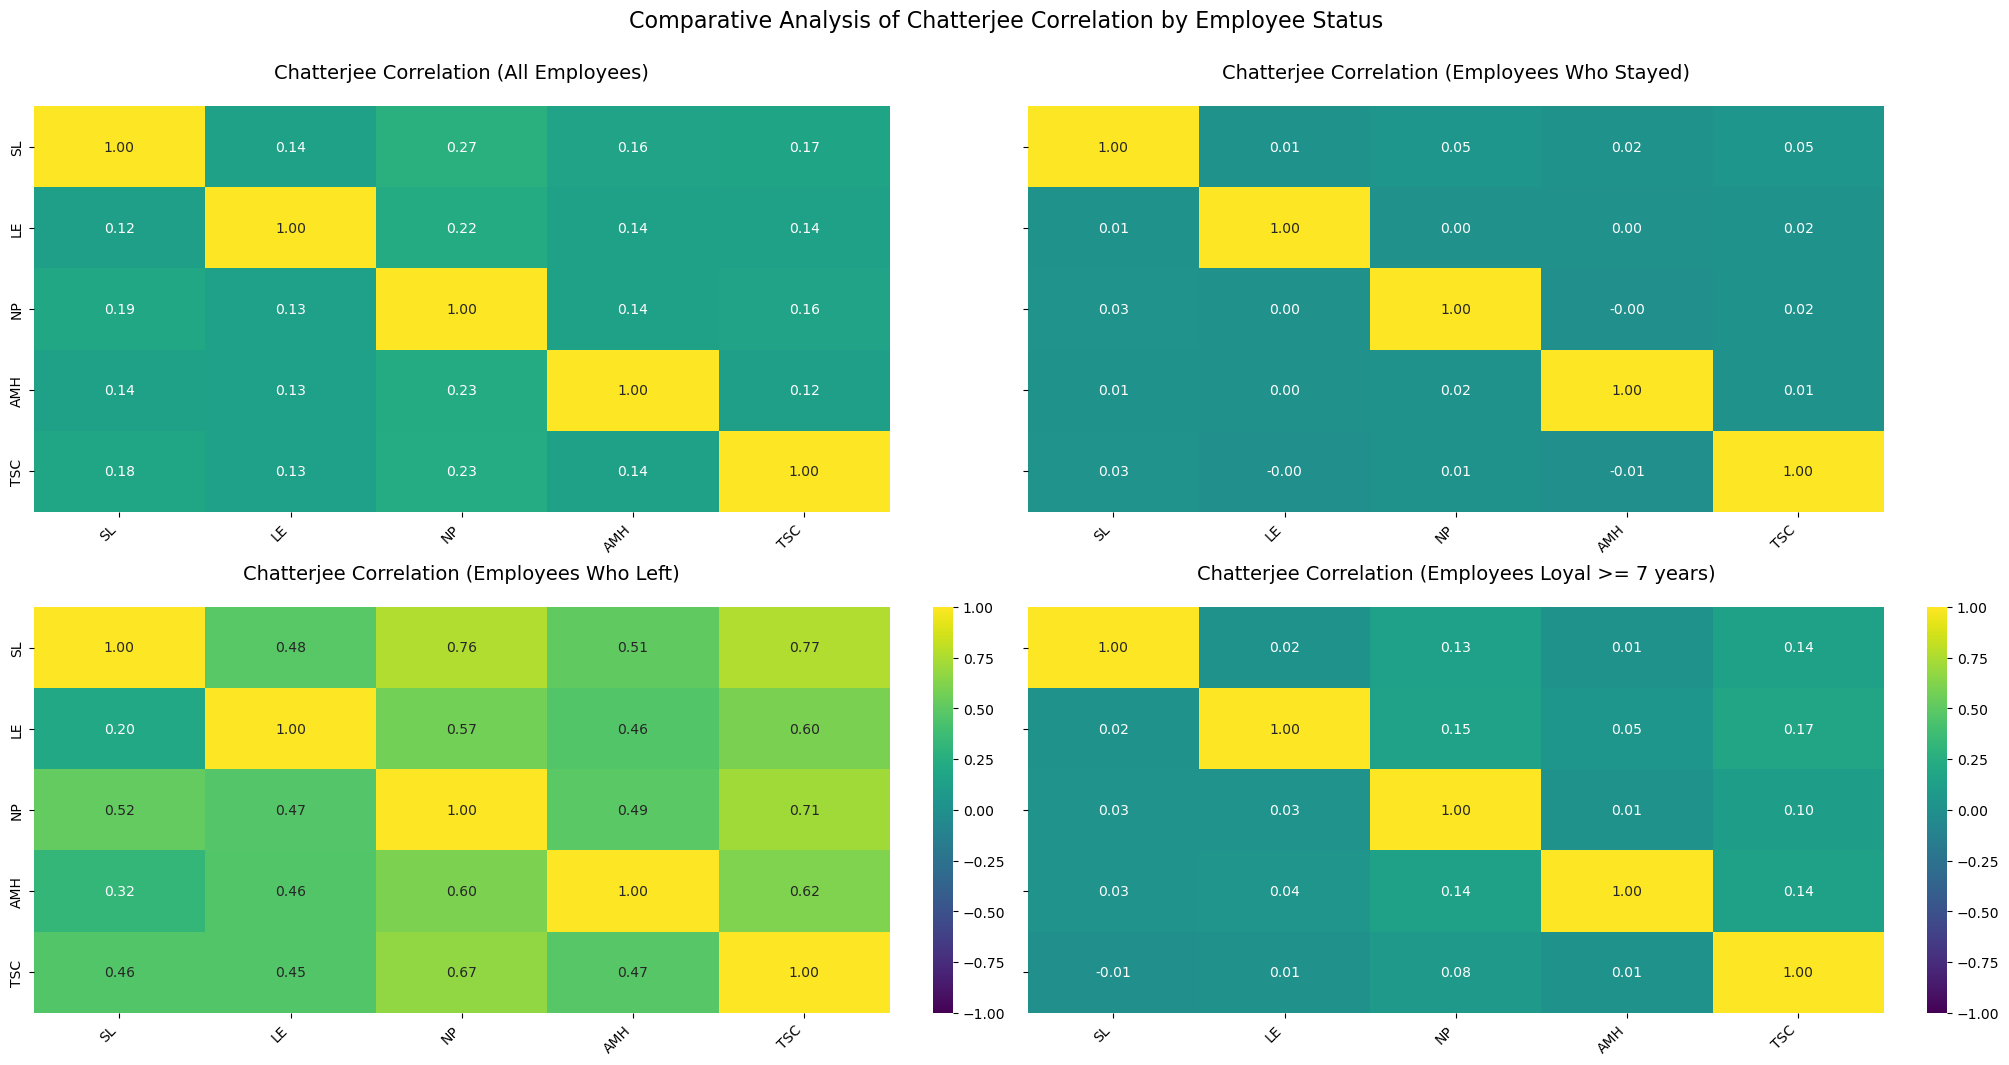

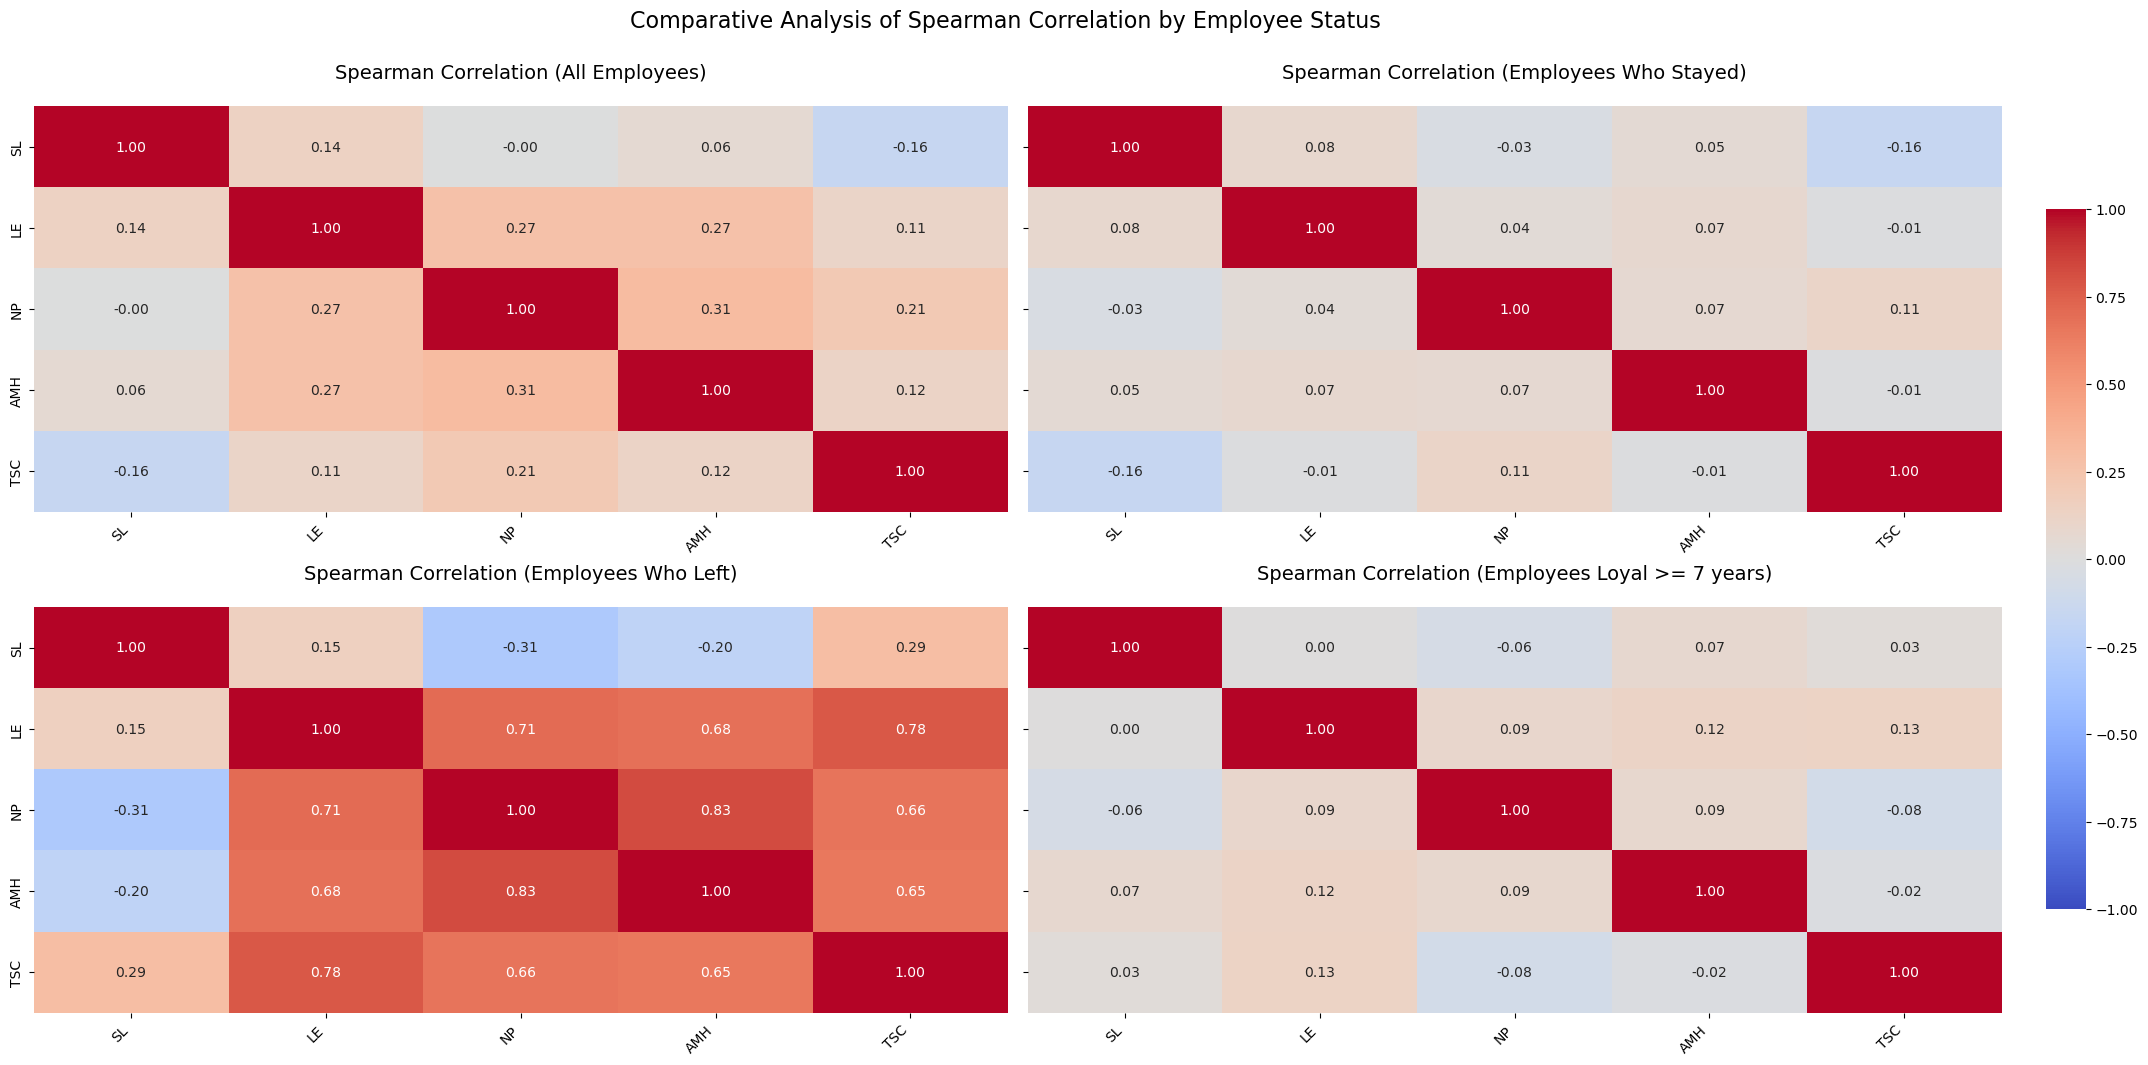

In [21]:
# =====================================================================================
# 2.17 COMPARATIVE CORRELATION ANALYSIS BY ATTRITION STATUS - NON LINEAR ASSOCIATION
# =====================================================================================
# --- Compute Xi Correlation Matrices ---
# Note: xicorpy returns a matrix for pairwise feature correlations
df_stayedl = df[(df['LT'] == False) & (df['TSC']>=7)].select_dtypes(['int64','float64'])# loyal employees
xi = xicorpy.compute_xi_correlation(numerical_features)  # All employees
xi_left = xicorpy.compute_xi_correlation(df_left)       # Employees who left
xi_stayed = xicorpy.compute_xi_correlation(df_stayed)   # Employees who stayed
xi_stayedl= xicorpy.compute_xi_correlation(df_stayedl)  #Employees loyal 

# --- Initialize Figure with 3 Subplots (1x3 Grid) ---
# Adjust figsize for better readability; use constrained_layout to avoid overlaps
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    nrows=2, ncols=2, figsize=(20, 10), 
    sharey=True,  # Share y-axis labels for consistency
    constrained_layout=True  # Auto-adjust spacing
)

# --- Plot 1: All Employees ---
sns.heatmap(
    xi, 
    annot=True, 
    fmt=".2f", 
    cmap='viridis', 
    ax=ax1, 
    vmin=-1,  # Ensure consistent scale across plots
    vmax=1,
    cbar=False  # Avoid duplicate colorbars
)
ax1.set_title('Chatterjee Correlation (All Employees)', fontsize=14, pad=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Rotate x-labels

# --- Plot 2: Employees Who Stayed ---
sns.heatmap(
    xi_stayed, 
    annot=True, 
    fmt=".2f", 
    cmap='viridis', 
    ax=ax2, 
    vmin=-1,
    vmax=1,
    cbar=False
)
ax2.set_title('Chatterjee Correlation (Employees Who Stayed)', fontsize=14, pad=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# --- Plot 3: Employees Who Left ---
heatmap = sns.heatmap(
    xi_left, 
    annot=True, 
    fmt=".2f", 
    cmap='viridis', 
    ax=ax3, 
    vmin=-1,
    vmax=1,
    cbar=True  # Single colorbar for the last plot
)
ax3.set_title('Chatterjee Correlation (Employees Who Left)', fontsize=14, pad=20)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# --- Plot 4: Employees Loyals ---
heatmap = sns.heatmap(
    xi_stayedl, 
    annot=True, 
    fmt=".2f", 
    cmap='viridis', 
    ax=ax4, 
    vmin=-1,
    vmax=1,
    cbar=True  # Single colorbar for the last plot
)
ax4.set_title('Chatterjee Correlation (Employees Loyal >= 7 years)', fontsize=14, pad=20)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')


# --- Final Adjustments ---
plt.suptitle(
    "Comparative Analysis of Chatterjee Correlation by Employee Status", 
    fontsize=16, 
    y=1.05
)
file_name=f'Chatterjee Corr Comparison.png'
full_path = os.path.join(output_directory, file_name)
plt.savefig(full_path, dpi=300)

plt.show()   

# =====================================================================================
# 2.18 COMPARATIVE CORRELATION ANALYSIS BY ATTRITION STATUS - SPEARMAN (MONOTONIC)
# =====================================================================================
# --- Compute Spearman Correlation Matrices ---

spearman_all = numerical_features.corr(method='spearman')
spearman_left = df_left.corr(method='spearman')
spearman_stayed = df_stayed.corr(method='spearman')
spearman_stayedl = df_stayedl.corr(method='spearman')

# --- Initialize a new Figure for Spearman results ---
fig_s, ((ax_s1, ax_s2), (ax_s3, ax_s4)) = plt.subplots(
    nrows=2, ncols=2, figsize=(20, 10),
    sharey=True,
    constrained_layout=True
)

# --- Plot 1: All Employees (Spearman) ---
sns.heatmap(
    spearman_all,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',  # A diverging colormap is good for Spearman (-1 to 1)
    ax=ax_s1,
    vmin=-1,
    vmax=1,
    cbar=False
)
ax_s1.set_title('Spearman Correlation (All Employees)', fontsize=14, pad=20)
ax_s1.set_xticklabels(ax_s1.get_xticklabels(), rotation=45, ha='right')

# --- Plot 2: Employees Who Stayed (Spearman) ---
sns.heatmap(
    spearman_stayed,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    ax=ax_s2,
    vmin=-1,
    vmax=1,
    cbar=False
)
ax_s2.set_title('Spearman Correlation (Employees Who Stayed)', fontsize=14, pad=20)
ax_s2.set_xticklabels(ax_s2.get_xticklabels(), rotation=45, ha='right')

# --- Plot 3: Employees Who Left (Spearman) ---
sns.heatmap(
    spearman_left,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    ax=ax_s3,
    vmin=-1,
    vmax=1,
    cbar=False
)
ax_s3.set_title('Spearman Correlation (Employees Who Left)', fontsize=14, pad=20)
ax_s3.set_xticklabels(ax_s3.get_xticklabels(), rotation=45, ha='right')

# --- Plot 4: Loyal Employees (Spearman) ---
cbar_ax_s = fig_s.add_axes([1.02, 0.15, 0.02, 0.7])
sns.heatmap(
    spearman_stayedl,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    ax=ax_s4,
    vmin=-1,
    vmax=1,
    cbar=True,
    cbar_ax=cbar_ax_s
)
ax_s4.set_title('Spearman Correlation (Employees Loyal >= 7 years)', fontsize=14, pad=20)
ax_s4.set_xticklabels(ax_s4.get_xticklabels(), rotation=45, ha='right')

# --- Final Adjustments for Spearman Plot ---
plt.suptitle(
    "Comparative Analysis of Spearman Correlation by Employee Status",
    fontsize=16,
    y=1.05
)
file_name=f'Spearman Corr Comparison.png'
full_path = os.path.join(output_directory, file_name)
plt.savefig(full_path, dpi=300)
plt.show()

**2.17 Comparative Chatterjee and Spearman Correlation Analysis Summary**:

This analysis moves beyond a single correlation matrix to deconstruct the underlying mechanics of attrition. By creating and comparing separate correlation matrices (Spearman for monotonic trends and Chatterjee for general association strength) for distinct employee cohorts—those who left, those who stayed, and a highly loyal group (tenure >= 7 years)—we can isolate the specific behavioral patterns and pressures that are unique to employees who churn.

**Part 1: Key Findings — Uncovering the Attrition Narratives**
The data reveals that "leaving" is not a monolithic event but the outcome of at least two distinct and opposing employee experiences.

1. For Retained Employees: A State of Equilibrium.
The correlation matrices for employees who stayed show uniformly weak relationships between all numerical features. This suggests a healthy work environment where factors like performance evaluation (LE), workload (AMH), and project count (NP) operate largely independently. However, a subtle but important signal exists: a weak negative correlation between Satisfaction Level (SL) and Time Spent in Company (TSC) for those with tenure < 7 years. This may be an early indicator of the "Stagnating Professional," whose satisfaction erodes over time, representing a future churn risk.

2. For Churned Employees: A Tale of Two Opposing Profiles.
In stark contrast to the retained group, the matrices for employees who left reveal strong, complex relationships, indicating a blend of two primary churn profiles:


    a) The 'Overworked Top Performer' (Burnout Profile): This narrative is told through strong positive correlations in the Spearman matrix. Being a top performer becomes inextricably linked to an unsustainable workload.

Evidence: Extremely strong positive correlations emerge between Last Evaluation (LE) and Average Monthly Hours (AMH) at 0.68, LE and Number of Projects (NP) at 0.71, and most critically, between NP and AMH at 0.83.

Interpretation: For this segment, high performance is directly and punitively tied to burnout-level workloads.

    b) The 'Underutilized and Disengaged' (Unsatisfied Profile): This second, more subtle narrative is revealed through negative correlations involving Satisfaction Level (SL).

Evidence: The Spearman matrix shows a negative correlation between SL and NP (-0.31) and between SL and AMH (-0.20).

Interpretation: While this reflects the burnout group (high workload, low satisfaction), it equally describes the inverse: employees with a very low number of projects and hours are also deeply dissatisfied. The strong, non-directional Chatterjee correlation between SL and NP (0.76) confirms that workload is a primary driver of satisfaction, both at the high and low ends.

3. The Loyal Cohort (>= 7 years): A Stable Baseline.
This group, composed entirely of retained employees, shows no significant correlations, similar to the main "stayed" cohort. This reinforces the conclusion that the intense patterns observed in the churned group are specific to the experience of leaving and are not present in a stable, long-term employee population.

**Part 2: Conclusions and Business Implications**
The analysis confirms that the company is losing employees for two diametrically opposed reasons: some are being burned out, while others are being neglected and underutilized.

We Are Losing the Right People for the Wrong Reasons: The data statistically validates that the company is at high risk of losing its most valuable, high-performing employees due to unsustainable work practices, not poor performance.

An Early-Warning System is Possible: The fact that these strong correlation patterns only appear for the churned group provides a unique diagnostic signature. This allows us to move beyond reactive exit interviews and build a proactive retention strategy by identifying at-risk employees before they decide to leave.

**Part 3: Updated Implications for the ML Pipeline**
These insights demand a more sophisticated and targeted modeling strategy. The high multicollinearity and opposing non-linear patterns in the churn group are not statistical problems to be avoided, but distinct signals to be engineered and exploited.

1. Prioritize Non-Linear, Tree-Based Models: This remains the core strategy. The discovery of opposing churn profiles reinforces the need for models (Random Forest, XGBoost) that can intrinsically partition the data along these different paths to attrition, something linear models cannot do without extensive help.

2. Strategic Feature Engineering to Isolate Churn Profiles: We will engineer features specifically designed to quantify the risk for each identified profile.
* To capture the 'Burnout' Profile: We will create a composite Burnout_Index.
* Justification: The strong positive correlations between LE, AMH, and NP for churned employees indicate they share a common underlying dimension of "high-intensity work."
* Method: Apply Principal Component Analysis (PCA) to these three features to synthesize their shared variance into a single, powerful predictor. Alternatively, a simple interaction term like LE * AMH can be tested.
* To capture the 'Underutilized/Disengaged' Profile: We will create a Disengagement_Flag.
* Justification: This profile is defined by a combination of low satisfaction and low workload. The negative correlations between SL and both NP and AMH support this.
* Method: Create a binary flag for employees who meet specific criteria, such as (SL < 0.2) AND (NP <= 2). This explicitly tells the model to watch for this specific toxic combination.
* To capture the 'Stagnating Professional' Risk: We will create a Satisfaction_Momentum feature.
* Justification: The negative correlation between SL and TSC for retained employees suggests that the trajectory of satisfaction over time is a key indicator of risk.
* Method: Engineer a feature like SL / TSC to model the average satisfaction per year of tenure. A declining value would signal a potential problem.

3. A Refined, Multi-Stage Model Strategy:
* Track A (High-Performance): A primary Random Forest or XGBoost model will be trained on the full feature set, including our newly engineered indices. This track is designed to maximize the primary business objective: Recall (minimizing False Negatives).
* Track B (High-Interpretability): A simpler, transparent model (like a pruned Decision Tree or Logistic Regression) will be trained.
* Justification: This provides a clear, defensible "story" for stakeholders. Using our engineered Burnout_Index and Disengagement_Flag as predictors, it can deliver powerful, intuitive insights (e.g., "For every one-unit increase in the Burnout Index, the odds of churn increase by X%").
* Advanced Option (Segmented Modeling):
* Justification: Since we have identified two fundamentally different churn populations, a single model may be forced to compromise. A more advanced approach could yield higher accuracy.
* Method: First, build a classification model to predict whether an employee belongs to the 'potential burnout' or 'potential disengaged' cluster. Then, train separate, specialized churn models for each segment. This allows each model to become an expert on a single type of attrition.

Generating 10 plots for the following pairs: [('SL', 'LE'), ('SL', 'NP'), ('SL', 'AMH'), ('SL', 'TSC'), ('LE', 'NP'), ('LE', 'AMH'), ('LE', 'TSC'), ('AMH', 'NP'), ('NP', 'TSC'), ('AMH', 'TSC')]

Skipping boxplot for float-float pair: (SL, LE)
Skipping boxplot for float-float pair: (SL, AMH)
Skipping boxplot for float-float pair: (LE, AMH)


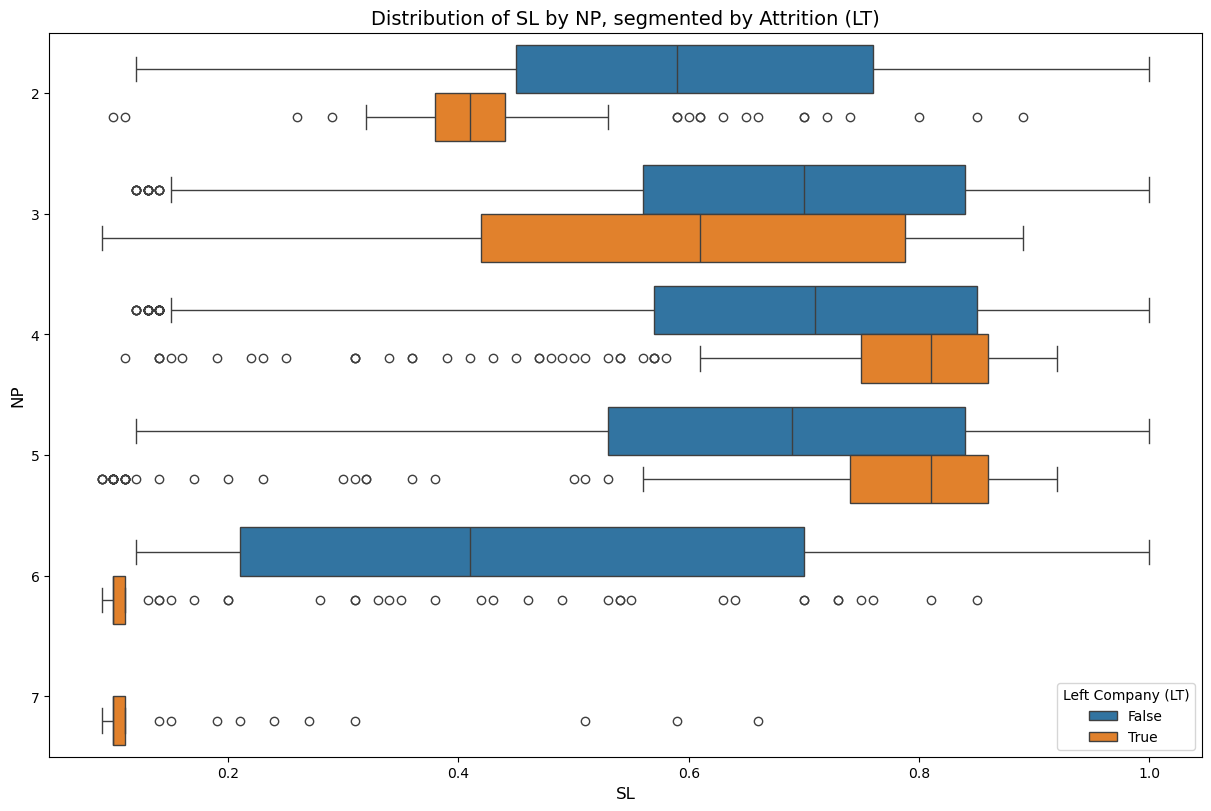

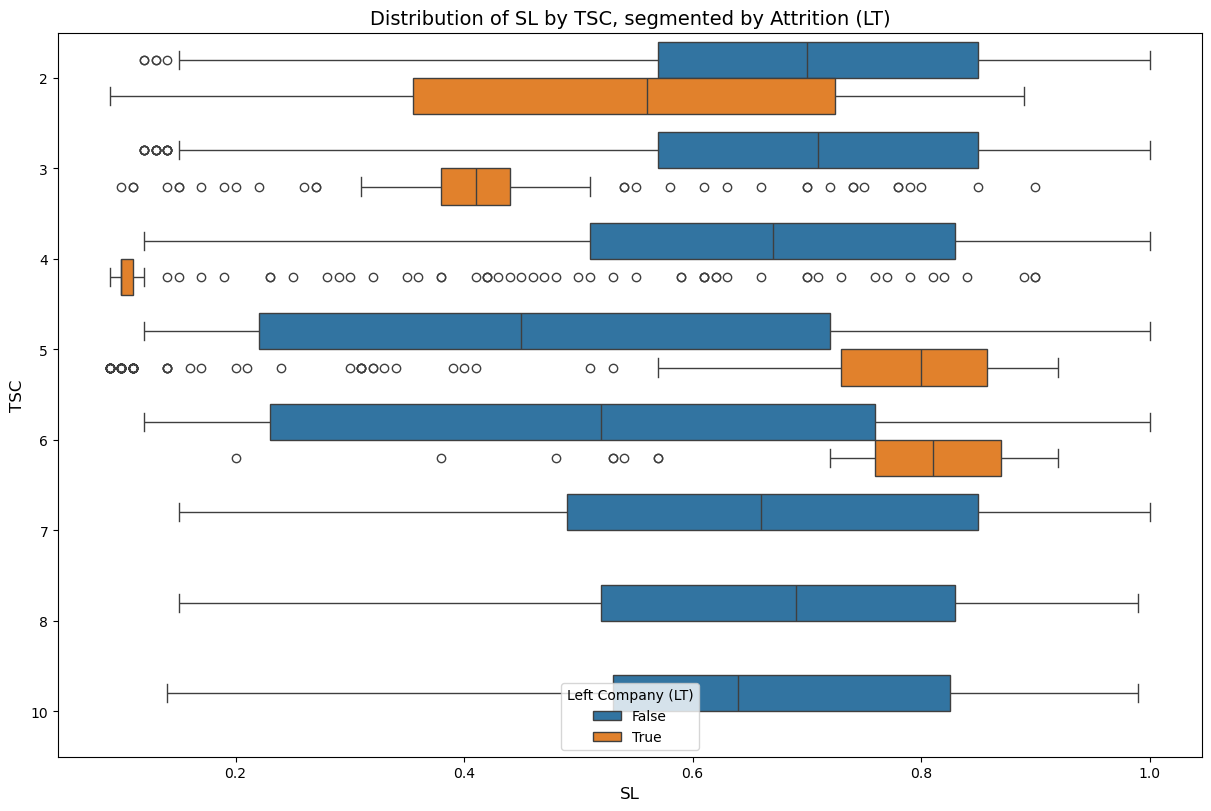

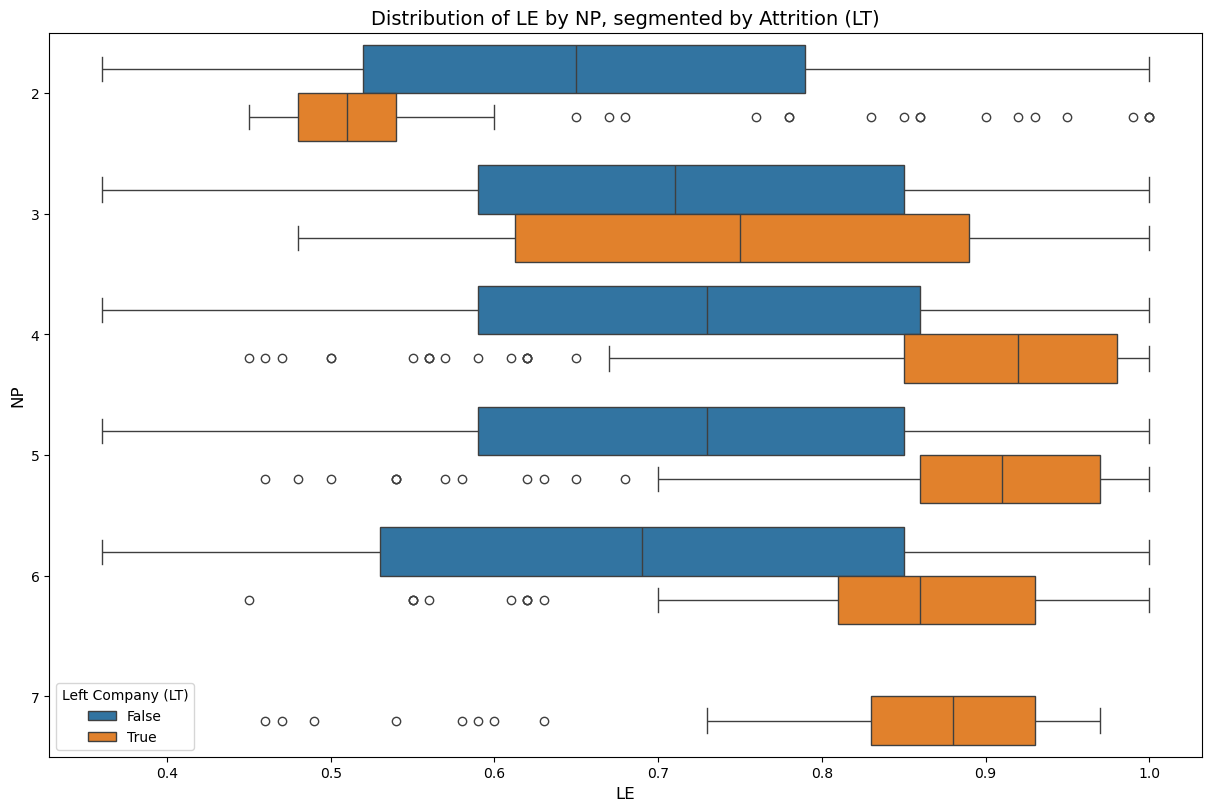

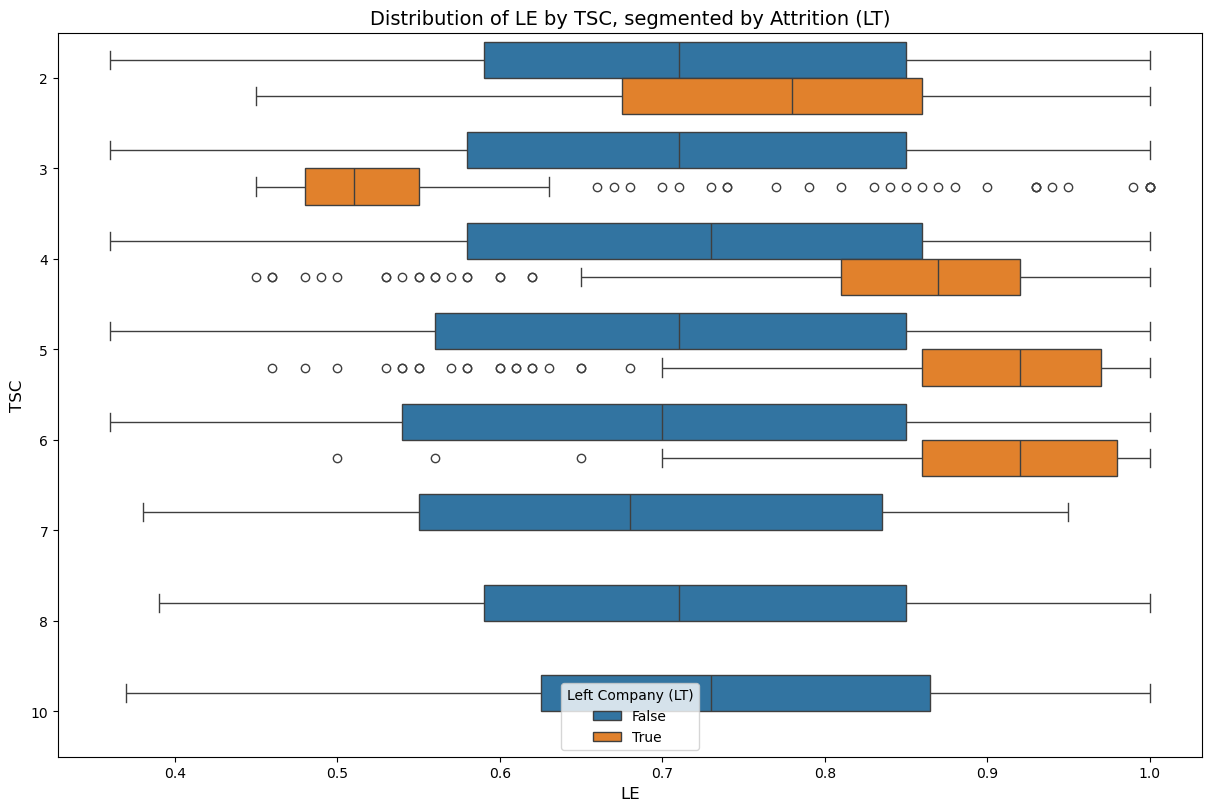

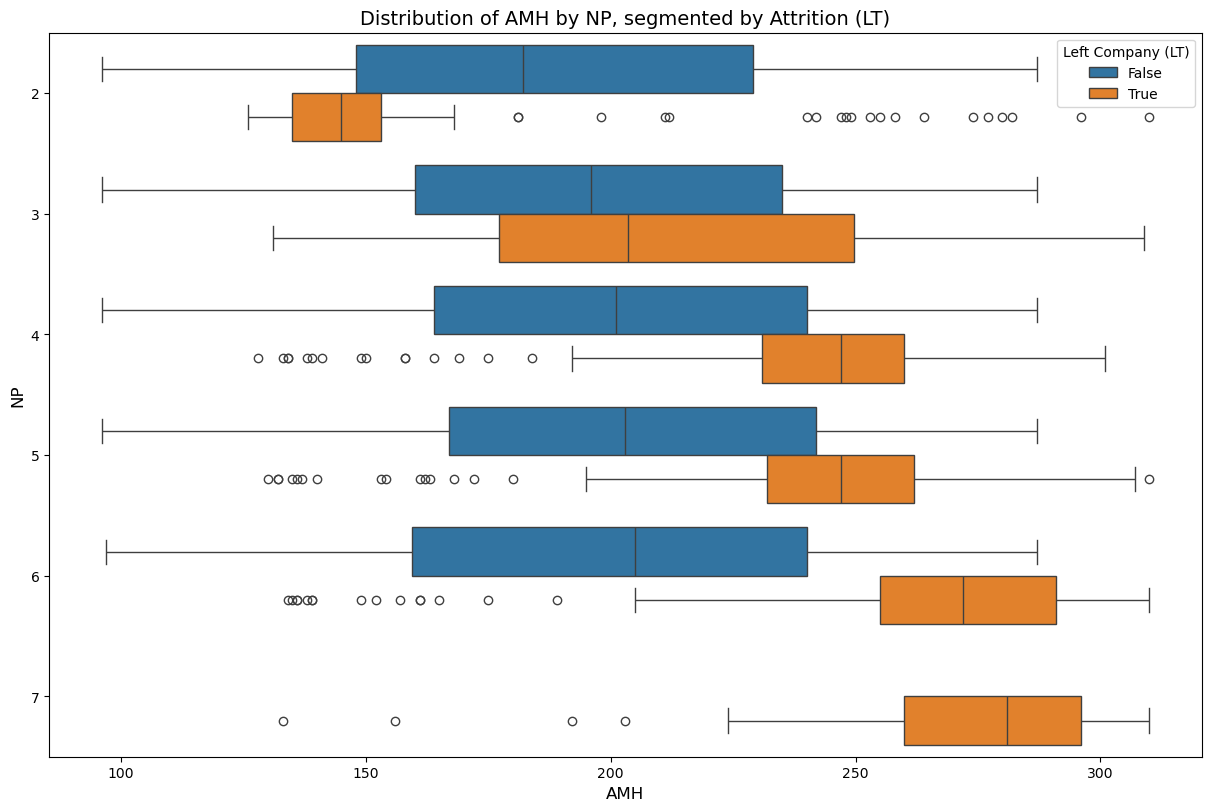

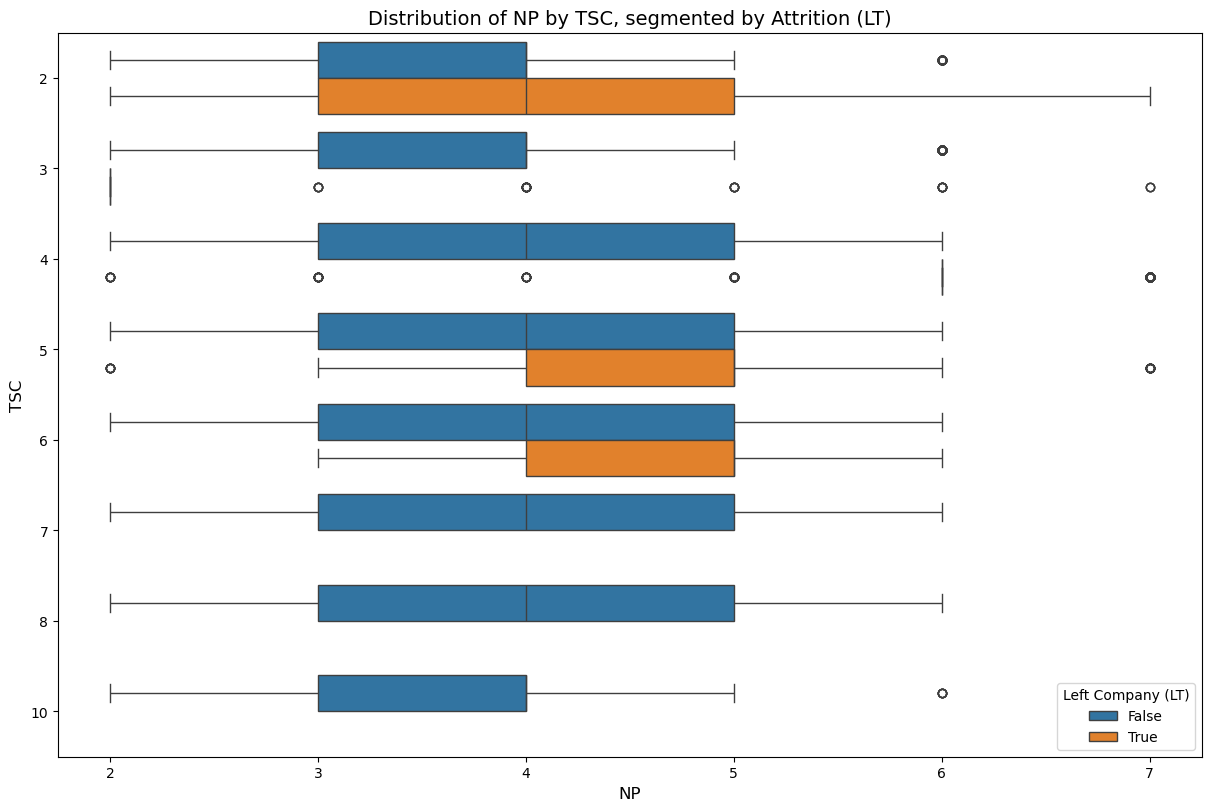

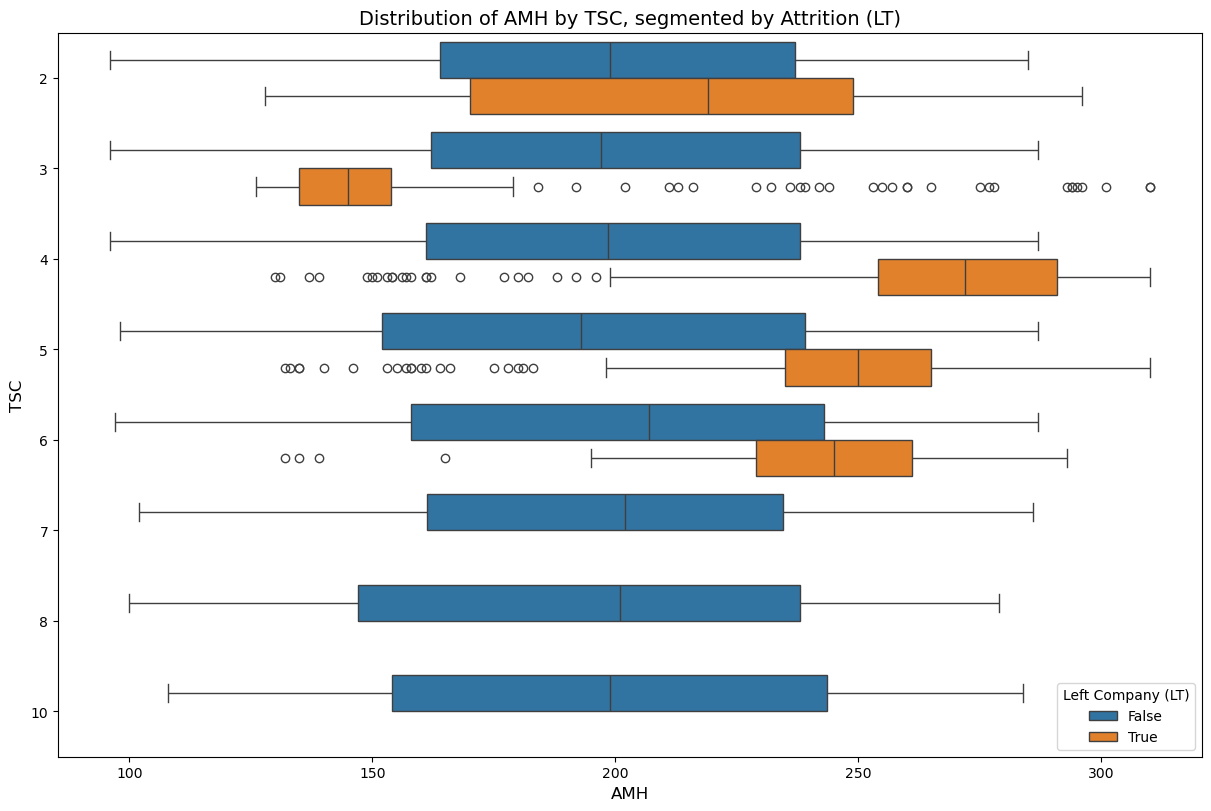

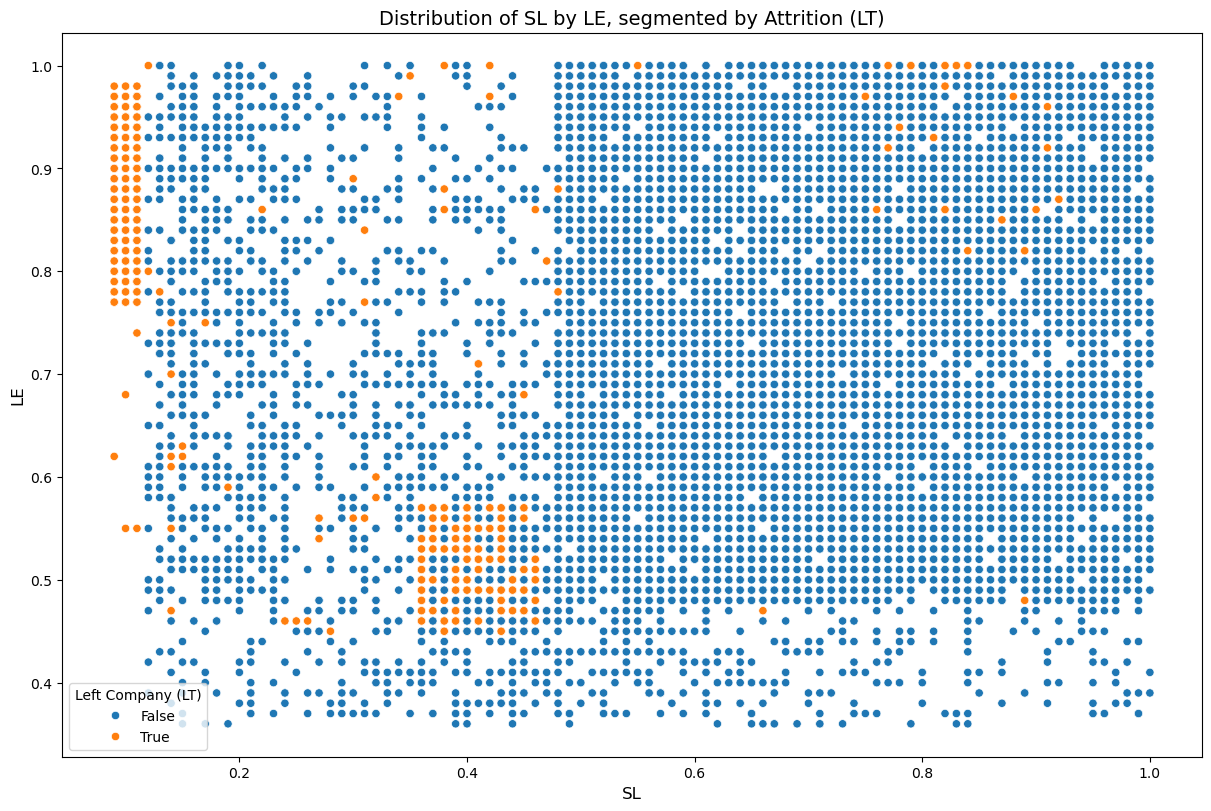

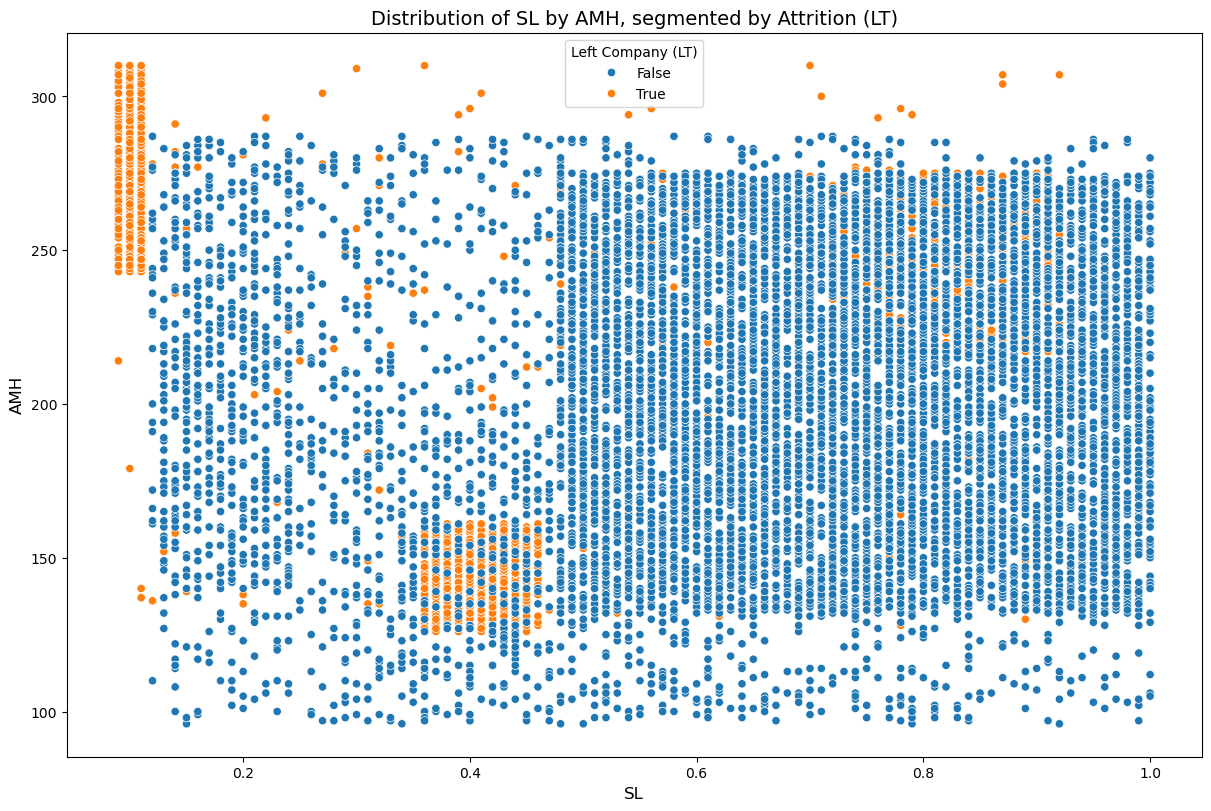

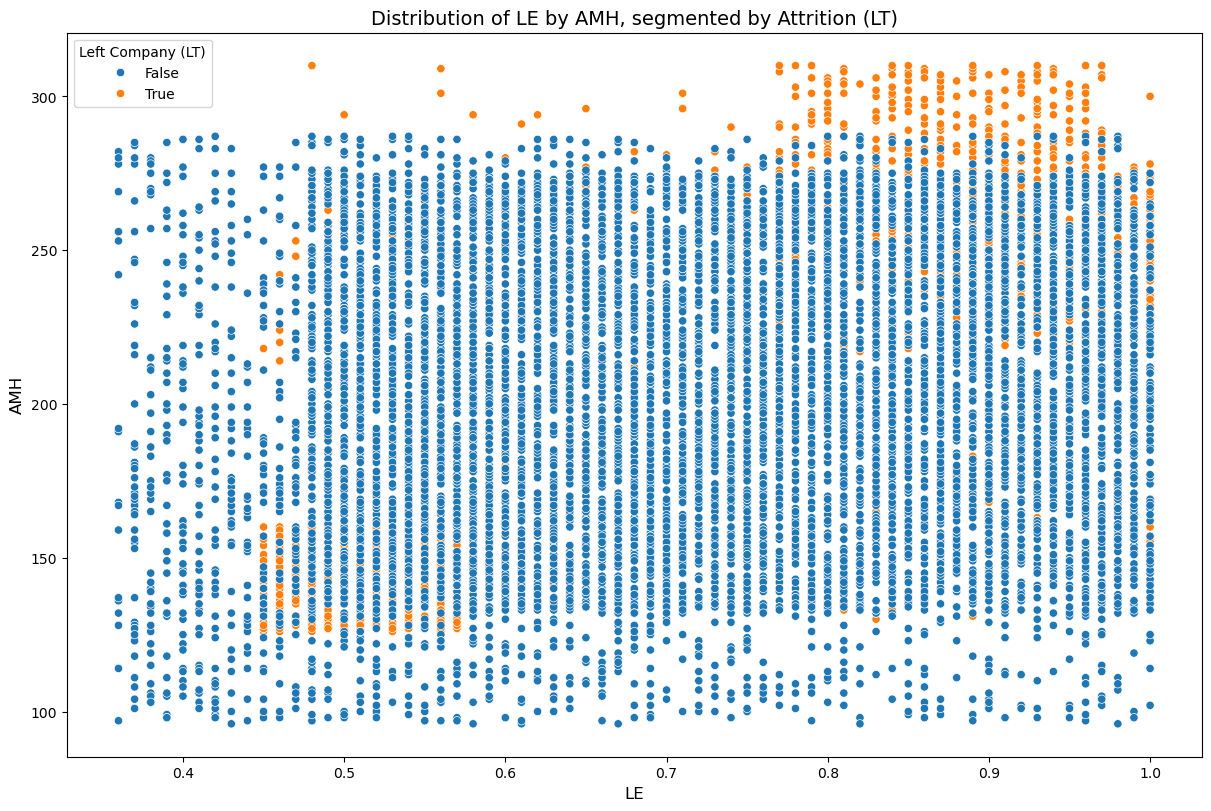

In [22]:
#=================================================================================================
#  2.18: Bivariate Graphical Analysis of Numerical Features ---
#=================================================================================================
# Technical Objective: To systematically visualize the relationship between every pair of numerical
# features, segmented by the attrition status ('LT'). This graphical analysis is crucial for
# visually identifying complex patterns, such as non-linear relationships, clusters, and interactions
# that numerical correlation coefficients (like Pearson or Spearman) cannot fully describe.



# --- Step 1: Generate Unique Pairs of Variables ---
# Use itertools.combinations to create all unique pairs of features from the numerical_features list.
# This is an efficient method to ensure each pair is analyzed once without repetition (e.g., (A,B) but not (B,A)).
variable_pairs = list(combinations(numerical_features, 2))
index_to_swap= 7
variable_pairs[index_to_swap]= (variable_pairs[index_to_swap][1], variable_pairs[index_to_swap][0])


print(f"Generating {len(variable_pairs)} plots for the following pairs: {variable_pairs}\n")

# --- Step 2: Loop Through Pairs and Generate Plots ---

# Iterate over each generated pair to create a distinct bivariate plot.
for pair in variable_pairs:
    # Dynamically assign the variables for the x and y axes for the current iteration.
    var_x = pair[0]
    var_y = pair[1]

    # --- NEW: Add conditional check for data types ---
    # This check prevents creating a boxplot for two continuous (float64) variables,
    # as a scatter plot would be more appropriate for that combination.
    if df[var_x].dtype == 'float64' and df[var_y].dtype == 'float64':
        print(f"Skipping boxplot for float-float pair: ({var_x}, {var_y})")
        continue # Skip to the next pair in the loop
   
    # Create a new figure for each plot to ensure they are displayed separately.
    # The figure size is set for good readability.
    plt.figure(figsize=(12, 8), constrained_layout=True)

    # --- Step 3: Create the Boxplot ---
    # sns.boxplot is used to visualize the distribution of one variable (x) across the categories of another (y).
    # 'hue="LT"' is the critical parameter that splits the data, creating separate boxplots for
    # employees who left (True) and those who stayed (False). This allows for direct visual comparison.
    # 'orient="h"' creates horizontal boxplots, which can be easier to read when y-axis labels are long.
    sns.boxplot(data=df,
                x=var_x,
                y=var_y,
                hue='LT',
                orient='h'
               )

    # --- Step 4: Add Titles and Labels for Clarity ---
    # Dynamically set the title and axis labels to reflect the variables being plotted.
    plt.title(f'Distribution of {var_x} by {var_y}, segmented by Attrition (LT)', fontsize=14)
    plt.xlabel(f'{var_x}', fontsize=12)
    plt.ylabel(f'{var_y}', fontsize=12)
    plt.legend(title='Left Company (LT)', loc='best')

    
    # Dynamically create the full path for the file
    file_name = f'boxplot_{var_y}_vs_{var_x}.png'
    full_path = os.path.join(output_directory, file_name)

    # Save the figure to the specified full path
    plt.savefig(full_path, dpi=300, bbox_inches='tight')

for pair in variable_pairs:
    # Dynamically assign the variables for the x and y axes for the current iteration.
    var_x = pair[0]
    var_y = pair[1]

    # --- NEW: Add conditional check for data types ---
    # This check prevents creating a scatterplot for discrete (int64) and continuos (float64)) variables,
    
    if df[var_x].dtype == 'float64' and df[var_y].dtype == 'float64':
             
   
   # Create a new figure for each plot to ensure they are displayed separately.
    # The figure size is set for good readability.
        plt.figure(figsize=(12, 8), constrained_layout=True)

       # --- Step 3: Create the Boxplot ---
       # sns.scatterplot is used to visualize the distribution of one variable (x) across the categories of another (y).
       # 'hue="LT"' is the critical parameter that splits the data, creating separate boxplots for
       # employees who left (True) and those who stayed (False). 
        sns.scatterplot(data=df,
                x=var_x,
                y=var_y,
                hue='LT',
               )

        # --- Step 4: Add Titles and Labels for Clarity ---
        # Dynamically set the title and axis labels to reflect the variables being plotted.
        plt.title(f'Distribution of {var_x} by {var_y}, segmented by Attrition (LT)', fontsize=14)
        plt.xlabel(f'{var_x}', fontsize=12)
        plt.ylabel(f'{var_y}', fontsize=12)
        plt.legend(title='Left Company (LT)', loc='best')

    
        # Dynamically create the full path for the file
        file_name = f'scatterplot_{var_y}_vs_{var_x}.png'
        full_path = os.path.join(output_directory, file_name)

        # Save the figure to the specified full path
        plt.savefig(full_path, dpi=300, bbox_inches='tight')


                  
    




**2.19 Bivariate Graphical Analysis Summary: The Three Profiles of Employee Churn**

This comprehensive bivariate analysis moves beyond single-variable distributions to reveal the critical interaction effects between features. By visualizing how variables like Satisfaction (SL), Last Evaluation (LE), Average Monthly Hours (AMH), and Number of Projects (NP) behave at different stages of employee tenure (TSC), we can deconstruct the complex phenomenon of attrition into clear, actionable insights. The analysis confirms that employee churn is not a single problem but is driven by at least three distinct employee "personas," each with a unique motivation for leaving.

**Part 1: Key Findings – Uncovering the Attrition Narratives**

*The "Churn Window" is a Mid-Career Crisis*:

The entire attrition problem is concentrated in the 3 to 6-year tenure window.
Employees with 7+ years of service form a "loyal cohort" with virtually zero turnover, demonstrating that long-term retention is achievable if the mid-career phase is navigated successfully.

Three Distinct "Churn Personas" Have Been Identified:

**Profile A: The Overworked Top Performer**

Characteristics: High Satisfaction (SL > 0.7), High Evaluation (LE > 0.8), High Workload (AMH > 250, NP >= 5).
Narrative: These are the company's stars who are engaged and performing well but are leaving due to burnout from an unsustainable workload. This represents the most critical and costly form of attrition.

**Profile B: The Under-utilized and Disengaged**

Characteristics: Low/Moderate Satisfaction (SL ≈ 0.4), Low Evaluation (LE < 0.6), Low Workload (AMH < 160, NP = 2).
Narrative: These employees are likely a poor long-term fit, leaving due to boredom or a lack of challenge. This is a conventional and less strategically damaging form of turnover.

**Profile C: The Valuable but Unhappy**

Characteristics: Very Low Satisfaction (SL < 0.2) but High Evaluation (LE > 0.75).
Narrative: These are skilled, high-performing employees who are miserable. Their departure is driven by frustration, likely due to a poor manager, unfair compensation, or a negative work environment.

**Part 2: Business Implications**

The identification of these distinct profiles demands a shift from a generic, one-size-fits-all retention strategy to a precise, data-driven approach.

Implement Targeted, Lifecycle-Aware Retention:
1. For 3-Year Employees: Focus on engagement, career pathing, and providing challenging work.
2. For 4-6 Year Employees: Focus on workload management, burnout prevention, and creating clear growth opportunities to avoid stagnation.
3. For 7+ Year Employees: Study this "loyal cohort" to understand the drivers of long-term retention and replicate those conditions.

Rethink Performance and Workload Management: The current system inadvertently punishes high performance with excessive workloads. Formal guidelines on project allocation and workload caps are necessary to protect the company's most valuable assets.
Contextualize Satisfaction Data: Satisfaction scores are only meaningful when viewed in context with workload and tenure. The company must stop viewing high satisfaction as a universal indicator of retention.

**Part 3: Implications for the ML Pipeline**

This deep analysis provides a clear roadmap for sophisticated feature engineering and model selection, moving the goal from simple prediction to intelligent diagnosis.

*Feature Engineering: From Data to Insight*

Binning Proposal: To capture the non-linear effects of tenure and workload, these features should be binned before being fed into linear models.
tenure_stage: Bin TSC into ['Early', 'Disengaged_Risk', 'Burnout_Risk', 'Loyal'] to represent the distinct phases of the employee lifecycle.
workload_category: Bin AMH into ['Under-utilized', 'Normal', 'Overworked'] to capture the U-shaped risk associated with workload.

Interaction Feature Proposal: To explicitly teach the model the "churn personas," create binary flags.
is_overworked_star = (SL > 0.7) AND (LE > 0.8) AND (AMH > 250)
is_valuable_but_unhappy = (SL < 0.2) AND (LE > 0.75)
These flags will be exceptionally powerful predictors.

Model Selection: Choosing the Right Tool for the Job

Why Logistic Regression Will Fail on Its Own: A standard Logistic Regression model assumes linear and additive relationships. It cannot natively understand that high satisfaction can be a risk factor when combined with high workload, or that the impact of a performance score depends entirely on tenure. The model would likely see the positive and negative effects of these interactions cancel out, leading to poor predictive power without extensive, manual feature engineering.

Why Tree-Based Models are Superior: Models like Random Forest and XGBoost are perfectly suited for this problem. They are inherently non-linear and are designed to find complex interaction effects and decision boundaries automatically. They can learn the nested, conditional rules (e.g., "IF tenure is 4-6 years AND evaluation is high...") that define the churn personas.

**Final Recommendation (Dual-Model Strategy)**:
Track A (High-Performance): A tuned Random Forest or XGBoost model built on the full feature set to maximize the primary business objective: Recall (minimizing False Negatives).
Track B (High-Interpretability): A Logistic Regression model built using the engineered categorical bins and risk flags. This provides management with a clear, defensible "story" for why an employee is at risk, enabling targeted and effective interventions.



Skip LT vs LT countplot


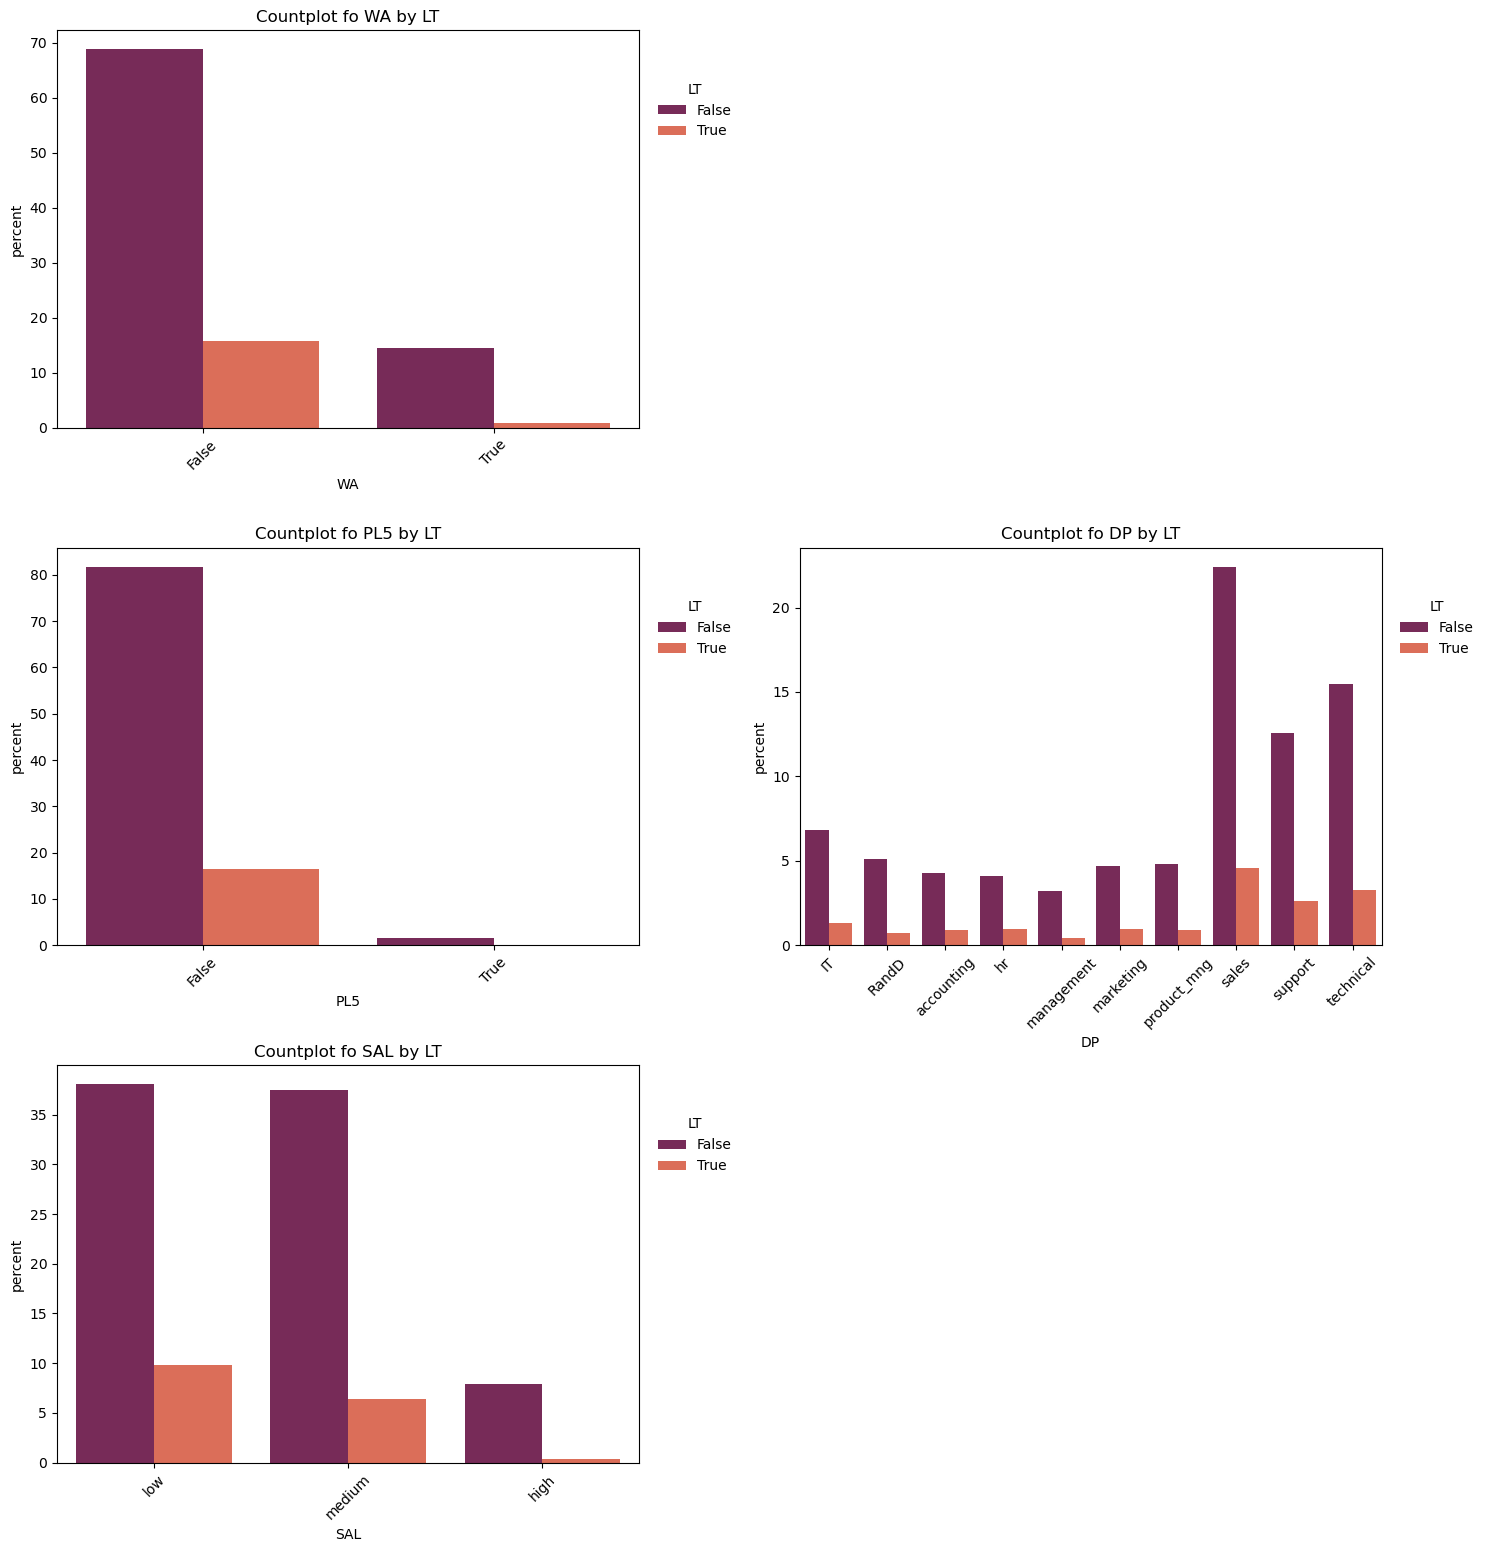

In [23]:
#=================================================================================================
#  2.20: Multivariate categorical graphical analysis
#=================================================================================================

#plotting countplots of each categorical feature distribution by LT to understand class imbalance 
# and its impact on attrition. To have an overview of the data, the df is not filtered by TSC</

plt.figure(figsize=(15, 20))  

for i, col in enumerate(categorical_features):
    #skipping LT vs LT countplot
    if col== 'LT':
        print('Skip LT vs LT countplot')
        continue
    
    ax = plt.subplot(4, 2, i+1)
    sns.countplot(data=df,
                  x=col,
                  hue='LT',
                  palette='rocket',
                  stat="percent",
                  ax=ax)
    handles, labels = ax.get_legend_handles_labels()
   
    if handles:
        ax.legend(handles=handles,
                  labels=labels,
                  title='LT',
                  bbox_to_anchor=(1.18,0.9),
                  frameon=False)
        ax.set_title(f'Countplot fo {col} by LT')
        plt.xticks(rotation=45)
        plt.tight_layout()

plt.tight_layout()
# Dynamically create the full path for the file
file_name = f'Contplot_{col}_vs_LT.png'
full_path = os.path.join(output_directory, file_name)

# Save the figure to the specified full path
plt.savefig(full_path, dpi=300, bbox_inches='tight')

plt.show()

    


**2.21 Multivariate categorical graphical analysis**


1. Key Observations and Interpretations

    - Countplot of WA (Work Accident): The vast majority of employees have False for this feature, meaning they have not had a work accident. Only a small fraction (around 15-20%) have had one.
  
      
        - Interpretation: Work accidents are relatively rare events in this dataset. This creates a significant class imbalance within this feature.

    - Countplot of PL5 (Promotion in Last 5 Years): This feature shows the most extreme imbalance. An overwhelming majority of employees have not received a promotion in the last 5 years (False). The number of those who have (True) is tiny in comparison.
      
        - Interpretation: Promotions are an extremely rare event in this company, affecting only a very small percentage of the workforce. This fact can give some hypotheses of why the best performers leave the company. After working for years, with high evaluation and high workload, they don't receive a promotion. This hypothesis requires confirmation from quantitative confirmation
         
    - Countplot of DP (Department): The distribution across departments is uneven. Sales, technical, and support are the three largest departments, making up a significant portion of the company. Other departments like management and hr are much smaller.
     
        - Interpretation: The company's structure is heavily weighted towards a few key operational departments. Any analysis of department-level churn must account for these size differences. A high number of leavers from the sales department might be less alarming than a high number from the much smaller management department, when considered proportionally.
          
    - Countplot of SAL (Salary): The majority of employees fall into the low and medium salary brackets. The high salary bracket is significantly smaller.
  
       - Interpretation: The salary structure is bottom-heavy, which is typical for many organizations. The high salary group likely consists of senior management and top individual contributors.

3. Business Implications

*Promotion Culture*: The extreme scarcity of promotions (PL5) could be a major driver of dissatisfaction and stagnation, especially for mid-career employees. This is a significant cultural red flag that management should investigate. Is the company failing to promote from within?

*Departmental Focus*: Retention efforts might need to be tailored by department, as the three largest departments (sales, technical, support) will account for the bulk of employee turnover in raw numbers.

*Healthy Churn Rate*: The overall churn rate (LT) is not catastrophically high, suggesting the company is not in a state of crisis. However, as our deeper analysis showed, the type of churn (losing top performers) is the real issue.

4. **Implications for the ML Pipeline**

These univariate plots have direct and critical implications for data preprocessing and modeling.
Address Class Imbalance (Crucial):
The imbalance in predictor variables like WA and PL5 is also important. While less critical than the target variable, it means the model will have very few examples to learn from for the True cases, which could weaken their predictive signal.

Feature Encoding for Categorical Variables:
DP and SAL must be one-hot encoded. This converts each category into a separate binary column (e.g., DP_sales, DP_technical), preventing the model from assuming a false ordinal relationship between them (e.g., that sales is "greater than" hr).

Potential for Feature Reduction/Clustering:
For the DP feature, some of the smaller departments could potentially be grouped into an "Other" category if they show similar churn behavior. This can help the model by reducing the number of sparse features. This should be validated with a Chi-squared test or similar analysis.


In [24]:
# --- 1. DATA SUBSETTING ---
# Create separate DataFrames for different employee cohorts to analyze them individually.

# Cohort 1: Employees who LEFT the company (tenure less than 7 years)
df_left = (df[(df['TSC'] < 7) & (df['LT'] == True)]
           .select_dtypes(['bool', 'category']))

# Cohort 2: Employees who STAYED with the company (tenure less than 7 years)
df_stayed = (df[(df['TSC'] < 7) & (df['LT'] == False)]
             .select_dtypes(['bool', 'category']))

# Cohort 3: LOYAL employees (tenure of 7 years or more)
# Note: From the EDA, all employees in this group stayed (LT == False),
# so we only need to filter by TSC.
df_loyal = (df[df['TSC'] >= 7]
            .select_dtypes(['bool', 'category']))


# --- 2. FUNCTION DEFINITION ---
def kramer_matrix(dataframe):
    """
    Calculates the Cramér's V association matrix for a given DataFrame.
    
    This function creates a local copy to avoid changing the original data,
    converts all columns to string type to ensure compatibility with dython,
    and returns the calculated correlation matrix.

    Args:
        dataframe (pd.DataFrame): The input DataFrame containing categorical features.

    Returns:
        pd.DataFrame: A DataFrame representing the Cramér's V association matrix.
    """
    # Create a local copy to work on, preventing any changes to the original DataFrame.
    df_local = dataframe.copy()
    
    # Iterate over each column and convert its data type to string.
    # This is a necessary preprocessing step for the dython library.
    for col in df_local.columns:
        df_local[col] = df_local[col].astype(str)
        
    # Calculate the association matrix using dython's 'associations' function.
    # 'nom_nom_assoc' is set to 'cramer' to compute Cramér's V.
    # 'plot=False' prevents the function from automatically displaying a heatmap.
    assoc_results = associations(df_local,
                                 nom_nom_assoc='cramer',
                                 plot=False)
    
    # Return the calculated correlation matrix, which is stored in the 'corr' key of the results.
    return assoc_results['corr']


# --- 3. EXECUTION AND DISPLAY ---
# Call the function for each of the three cohorts to get their respective matrices.
m0 = kramer_matrix(categorical_features) # all dataset
m1 = kramer_matrix(df_left)
m2 = kramer_matrix(df_stayed)
m3 = kramer_matrix(df_loyal)

# Display the resulting matrices.
# Using display() provides a cleaner, formatted output for DataFrames in notebooks.
print("--- Association Matrix for all Emplyees ---")
display(m0)

print("--- Association Matrix for Employees Who LEFT ---")
display(m1)

print("\n--- Association Matrix for Employees Who STAYED (<7 Years) ---")
display(m2)

print("\n--- Association Matrix for LOYAL Employees (>=7 Years) ---")
display(m3)



--- Association Matrix for all Emplyees ---


WA   LT  PL5   DP  SAL
WA  1.00 0.12 0.03 0.00 0.00
LT  0.12 1.00 0.04 0.03 0.12
PL5 0.03 0.04 1.00 0.12 0.09
DP  0.00 0.03 0.12 1.00 0.11
SAL 0.00 0.12 0.09 0.11 1.00

--- Association Matrix for Employees Who LEFT ---


WA   LT  PL5   DP  SAL
WA  1.00 0.00 0.03 0.00 0.04
LT  0.00 0.00 0.00 0.00 0.00
PL5 0.03 0.00 1.00 0.00 0.00
DP  0.00 0.00 0.00 1.00 0.00
SAL 0.04 0.00 0.00 0.00 1.00


--- Association Matrix for Employees Who STAYED (<7 Years) ---


WA   LT  PL5   DP  SAL
WA  1.00 0.00 0.02 0.00 0.01
LT  0.00 0.00 0.00 0.00 0.00
PL5 0.02 0.00 1.00 0.09 0.07
DP  0.00 0.00 0.09 1.00 0.09
SAL 0.01 0.00 0.07 0.09 1.00


--- Association Matrix for LOYAL Employees (>=7 Years) ---


WA   LT  PL5   DP  SAL
WA  1.00 0.00 0.00 0.17 0.00
LT  0.00 0.00 0.00 0.00 0.00
PL5 0.00 0.00 1.00 0.44 0.29
DP  0.17 0.00 0.44 1.00 0.43
SAL 0.00 0.00 0.29 0.43 1.00

In [25]:
#========================================================================================
#2.21 Chi-Squared Test and Post Hoc Test for Categorical Features by LT
#========================================================================================
# For this test we will use the entire df to assess if there is an overall difference
#between people who stayed and people who left.
# Specific analysis for TSC<7  and comparison with TSC >=7 wil be conducted during the ANOVA.


# --- Main Analysis Loop ---

# This loop iterates through each column name in your list of categorical features.
for col in categorical_features:
    
    # === Part 1: Initial Analysis & Display ===
    
    # Create a crosstab to show the proportion of each category within each 'LT' group
    crosstab_normalized = pd.crosstab(
        index=df[col],
        columns=df['LT'],
        normalize='columns',
    )
    # Convert proportions to percentages for easier reading
    crosstab_perc = (crosstab_normalized * 100).round(2)

    print("_" * 50)
    print(f"Distribution within '{col}' according to LT (in %)")
    print("_" * 50)
    display(crosstab_perc)

    # === Part 2: Overall Chi-squared Test ===
    
    print("\n" + "="*20 + " Chi-squared Test " + "="*20)
    
    # Create a contingency table with raw counts for the statistical test.
    contingency_table = pd.crosstab(
        index=df[col],
        columns=df['LT']
    )
    
    # Perform the Chi-squared test of independence.
    chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)
    
    # Print the main results of the test.
    print(f"Chi-squared Statistic: {chi2_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    # Interpret the result and decide whether to proceed to post-hoc tests.
    alpha = 0.05  # Standard significance level
    if p_value < alpha:
        print(f"\nResult: The p-value is less than {alpha}, so we reject the null hypothesis.")
        print(f"Conclusion: There IS a statistically significant association between '{col}' and 'LT'. ✅")

        # === Part 3: Conditional Post-Hoc Test ===
        
        # This block now checks TWO conditions:
        # 1. Is the overall Chi-squared test significant? (p_value < alpha)
        # 2. Is the current column one of the specified features for post-hoc analysis?
        if col in ['DP', 'SAL']:
            print("\n" + "-"*15 + f" Post-Hoc Test for {col} " + "-"*15)
            print(f"Since the association is significant, we now test which specific categories in '{col}' differ.")

            # Get all unique pairs of categories.
            categories = contingency_table.index
            pairwise_combinations = list(combinations(categories, 2))

            # Perform pairwise Chi-squared tests.
            p_values_uncorrected = []
            for combo in pairwise_combinations:
                new_table = contingency_table.loc[list(combo)]
                _, p, _, _ = chi2_contingency(new_table)
                p_values_uncorrected.append(p)

            # Apply Holm-Bonferroni p-value correction.
            reject, p_values_corrected, _, _ = multipletests(p_values_uncorrected, alpha=alpha, method='holm')

            # Display the results in a clear DataFrame.
            print("\nAdjusted P-values from Pairwise Tests:")
            results_df = pd.DataFrame({
                'Pair_Comparison': [f"{c[0]} vs {c[1]}" for c in pairwise_combinations],
                'Corrected_P_Value': p_values_corrected,
                'Significant': reject
            })

            # Highlight significant rows for easy identification.
            def highlight_significant(row):
                return ['background-color: lightgreen' if row.Significant else '' for _ in row]

            display(results_df.style.apply(highlight_significant, axis=1).format({'Corrected_P_Value': '{:.4f}'}))
            
            print("\nInterpretation: A 'Significant' value of True (highlighted) indicates a significant difference")
            print("in the LT distribution for that specific pair of categories.")

    else:
        print(f"\nResult: The p-value is greater than or equal to {alpha}, so we fail to reject the null hypothesis.")
        print(f"Conclusion: There is NO statistically significant association between '{col}' and 'LT'. ❌")
    
    # Add a final separator for readability before the next feature.
    print("\n" + "_"*50 + "\n")



__________________________________________________
Distribution within 'WA' according to LT (in %)
__________________________________________________


LT     False  True 
WA                 
False  82.55  94.73
True   17.45   5.27


==================== Chi-squared Test ====================
Chi-squared Statistic: 187.7378
P-value: 0.0000

Result: The p-value is less than 0.05, so we reject the null hypothesis.
Conclusion: There IS a statistically significant association between 'WA' and 'LT'. ✅

__________________________________________________

__________________________________________________
Distribution within 'LT' according to LT (in %)
__________________________________________________


LT     False  True 
LT                 
False 100.00   0.00
True    0.00 100.00


==================== Chi-squared Test ====================
Chi-squared Statistic: 11983.7794
P-value: 0.0000

Result: The p-value is less than 0.05, so we reject the null hypothesis.
Conclusion: There IS a statistically significant association between 'LT' and 'LT'. ✅

__________________________________________________

__________________________________________________
Distribution within 'PL5' according to LT (in %)
__________________________________________________


LT     False  True 
PL5                
False  98.05  99.60
True    1.95   0.40


==================== Chi-squared Test ====================
Chi-squared Statistic: 22.9921
P-value: 0.0000

Result: The p-value is less than 0.05, so we reject the null hypothesis.
Conclusion: There IS a statistically significant association between 'PL5' and 'LT'. ✅

__________________________________________________

__________________________________________________
Distribution within 'DP' according to LT (in %)
__________________________________________________


LT           False  True 
DP                       
IT            8.18   7.94
RandD         6.09   4.27
accounting    5.12   5.47
hr            4.88   5.68
management    3.84   2.61
marketing     5.61   5.63
product_mng   5.76   5.52
sales        26.89  27.62
support      15.09  15.67
technical    18.54  19.59


==================== Chi-squared Test ====================
Chi-squared Statistic: 20.8575
P-value: 0.0133

Result: The p-value is less than 0.05, so we reject the null hypothesis.
Conclusion: There IS a statistically significant association between 'DP' and 'LT'. ✅

--------------- Post-Hoc Test for DP ---------------
Since the association is significant, we now test which specific categories in 'DP' differ.

Adjusted P-values from Pairwise Tests:



Interpretation: A 'Significant' value of True (highlighted) indicates a significant difference
in the LT distribution for that specific pair of categories.

__________________________________________________

__________________________________________________
Distribution within 'SAL' according to LT (in %)
__________________________________________________


LT      False  True 
SAL                 
low     45.66  58.97
medium  44.92  38.62
high     9.42   2.41


==================== Chi-squared Test ====================
Chi-squared Statistic: 175.2107
P-value: 0.0000

Result: The p-value is less than 0.05, so we reject the null hypothesis.
Conclusion: There IS a statistically significant association between 'SAL' and 'LT'. ✅

--------------- Post-Hoc Test for SAL ---------------
Since the association is significant, we now test which specific categories in 'SAL' differ.

Adjusted P-values from Pairwise Tests:



Interpretation: A 'Significant' value of True (highlighted) indicates a significant difference
in the LT distribution for that specific pair of categories.

__________________________________________________



All categorical features have an association with LT even if it is not strong
1.Department (DP) has an overall effect on LT but there is no evidence about the impact on attrition in single department.
2. Each Salary's categories (SAL) instead have an impact on attrition.
Before proceeding to feature engineering, the interaction between categorical and numerical features will be analyzed

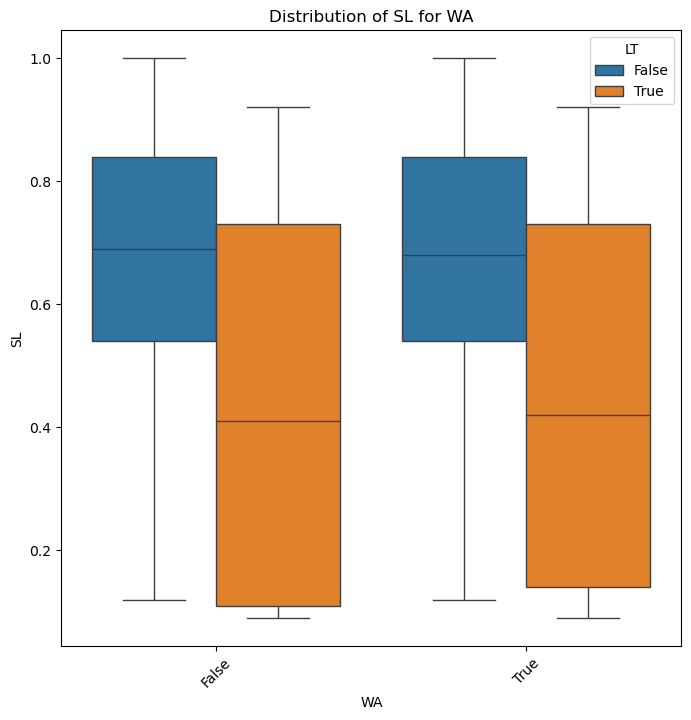

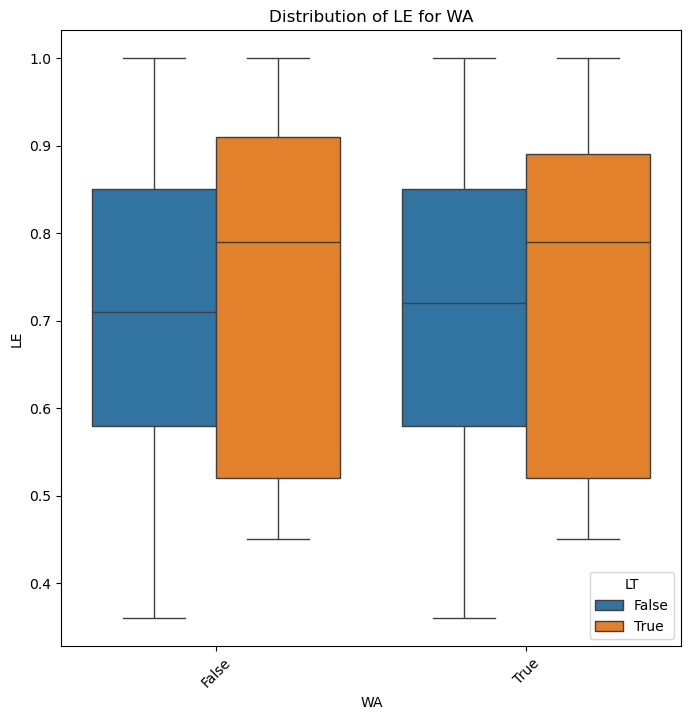

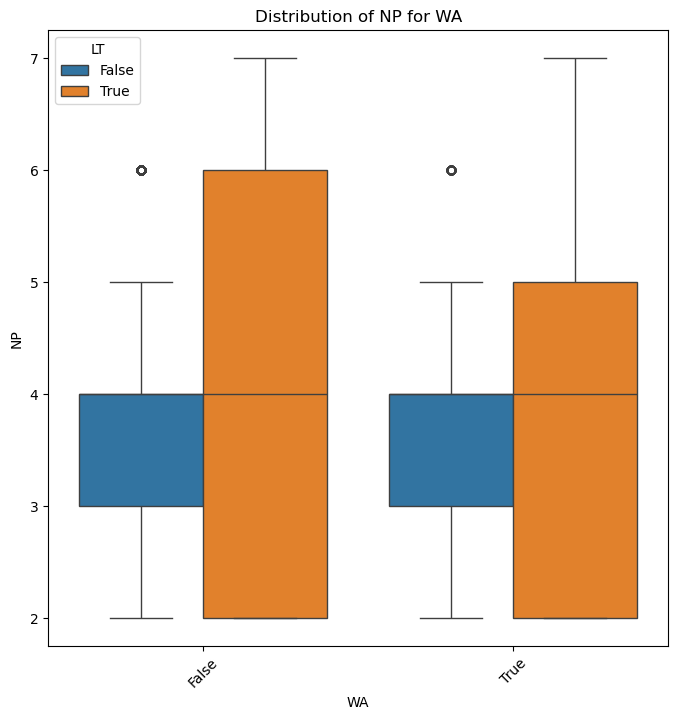

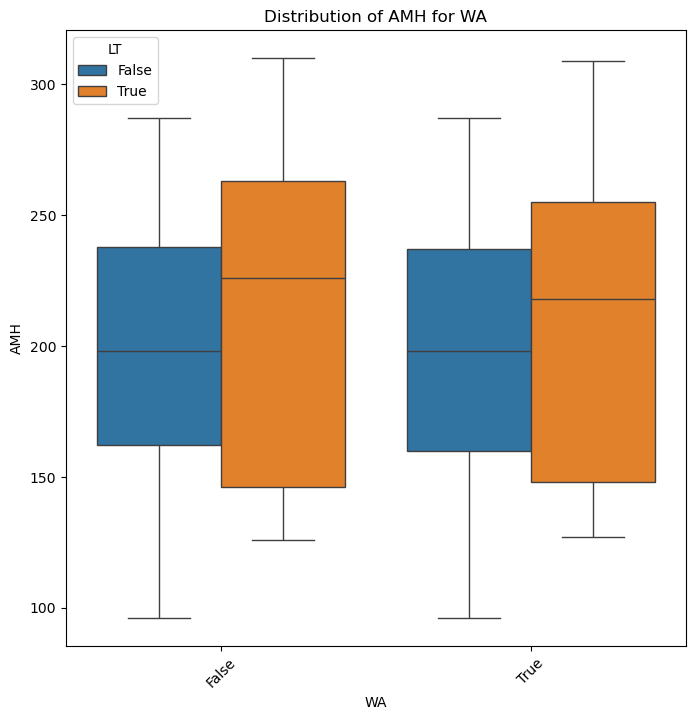

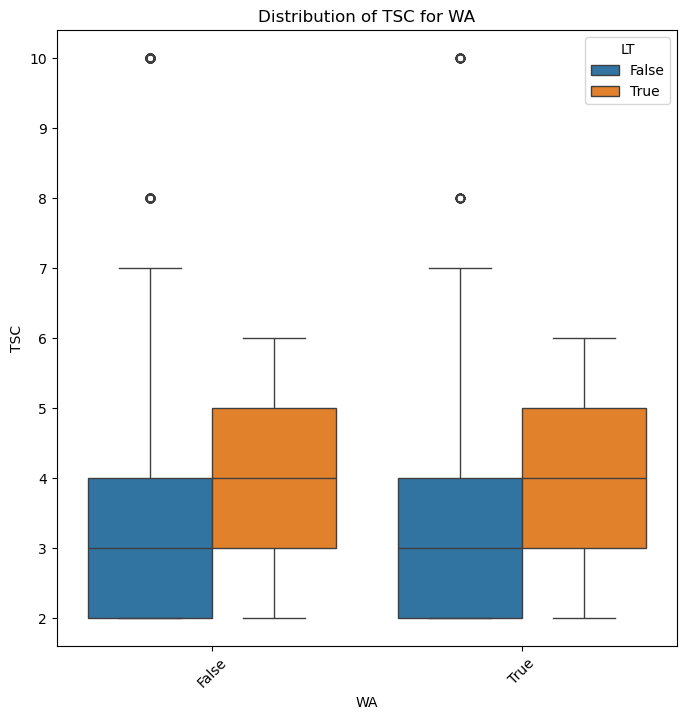

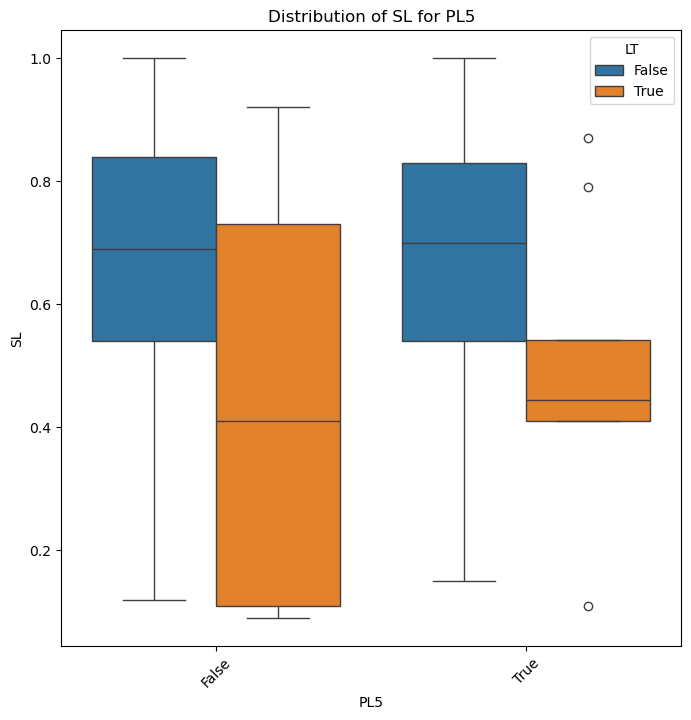

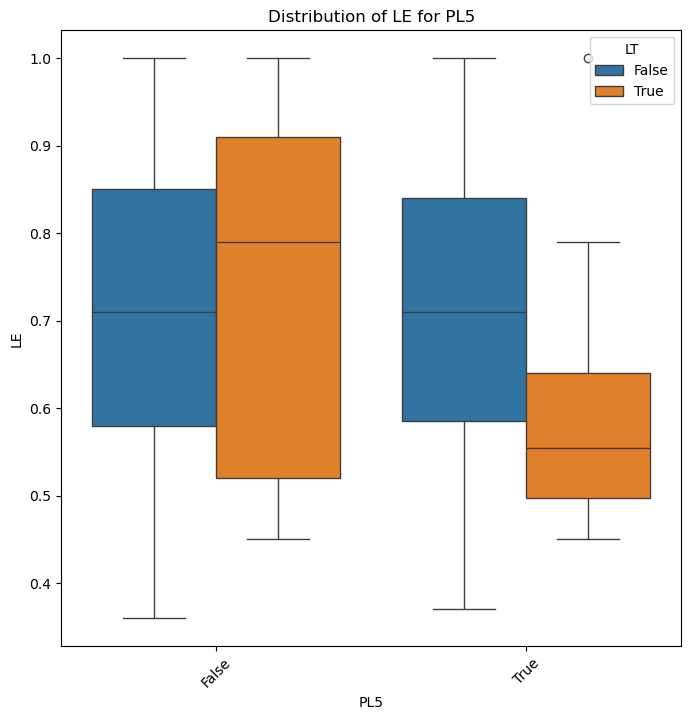

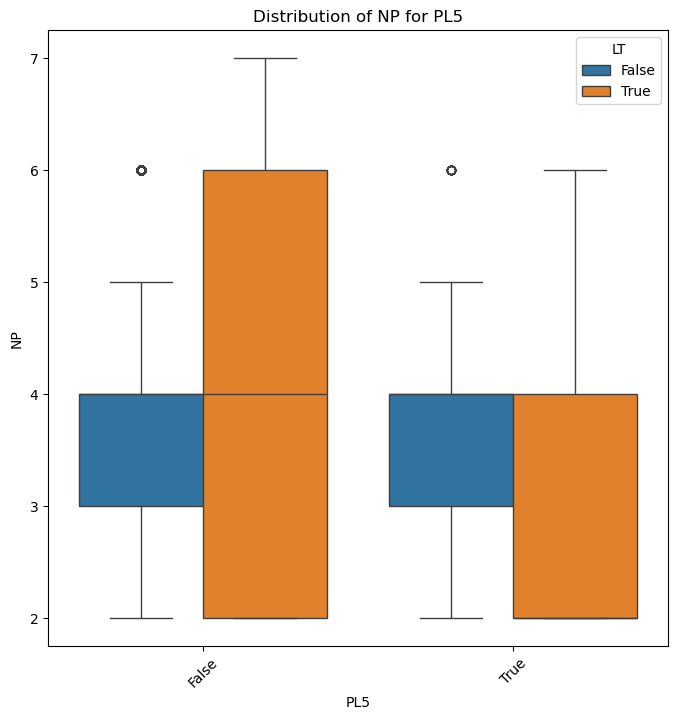

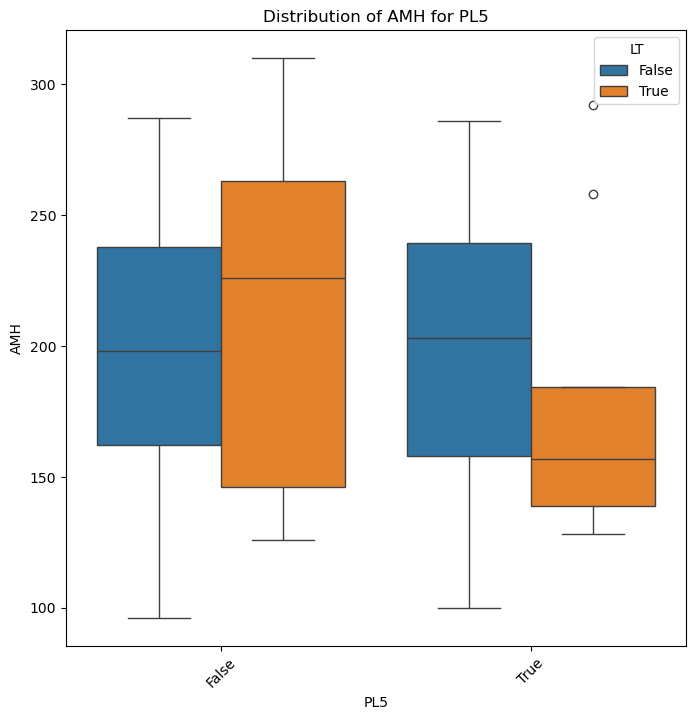

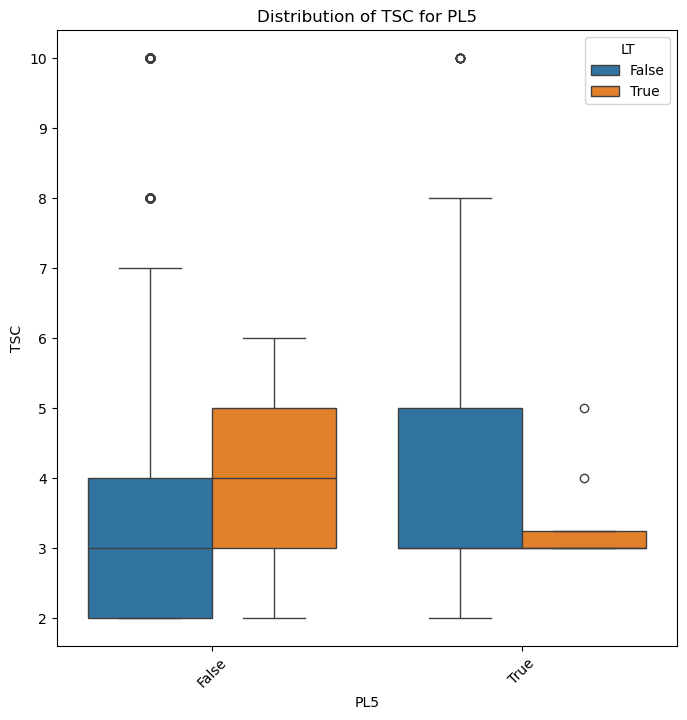

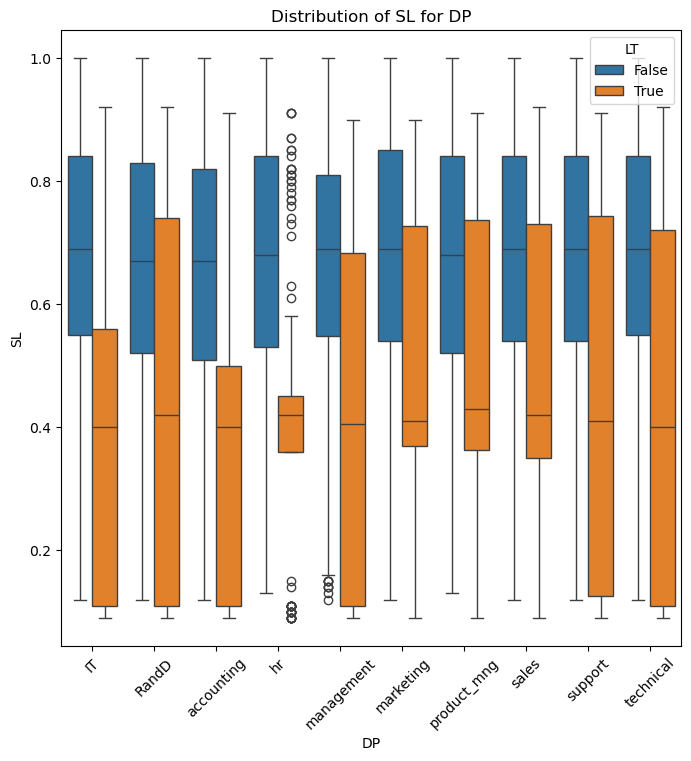

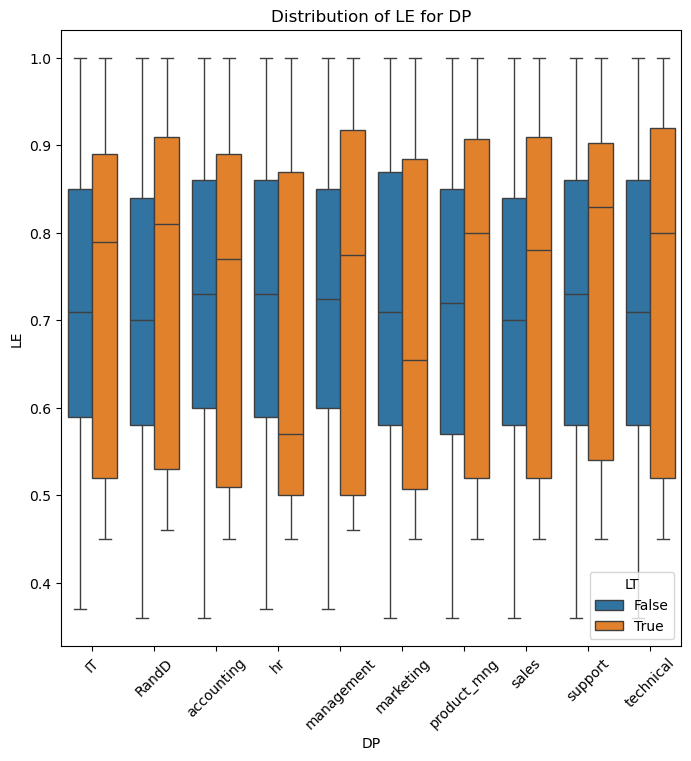

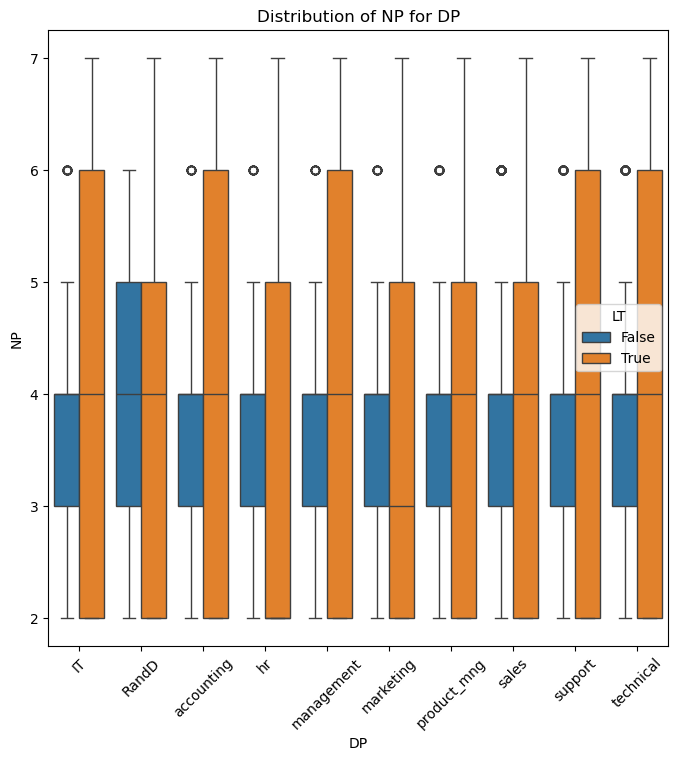

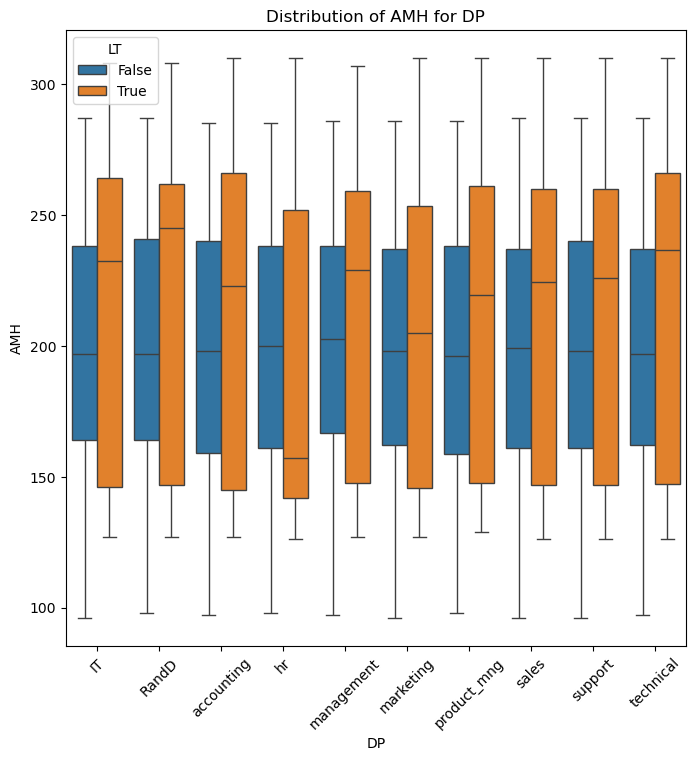

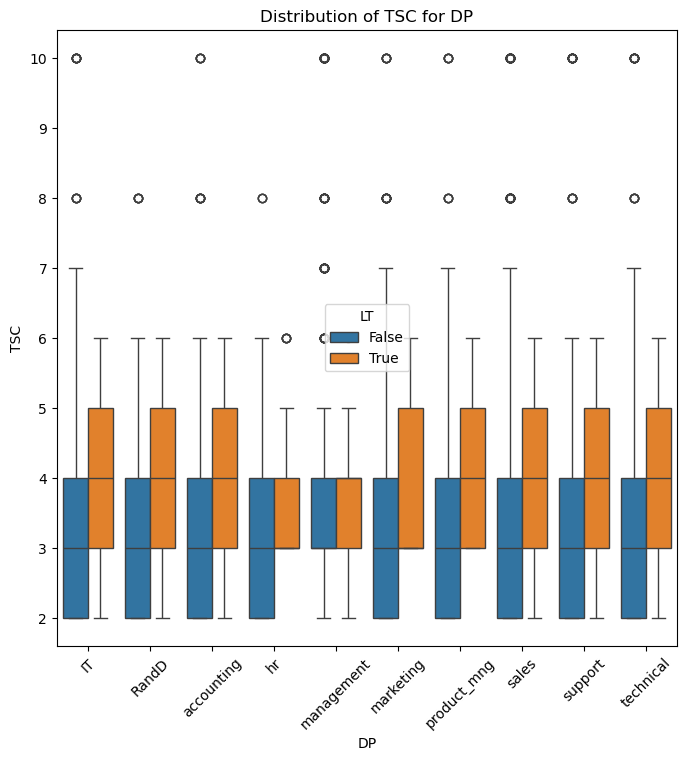

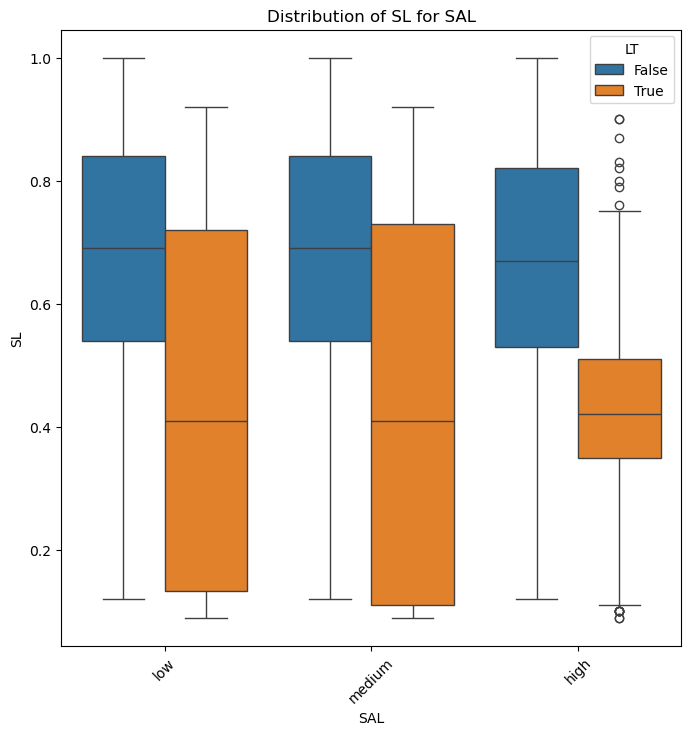

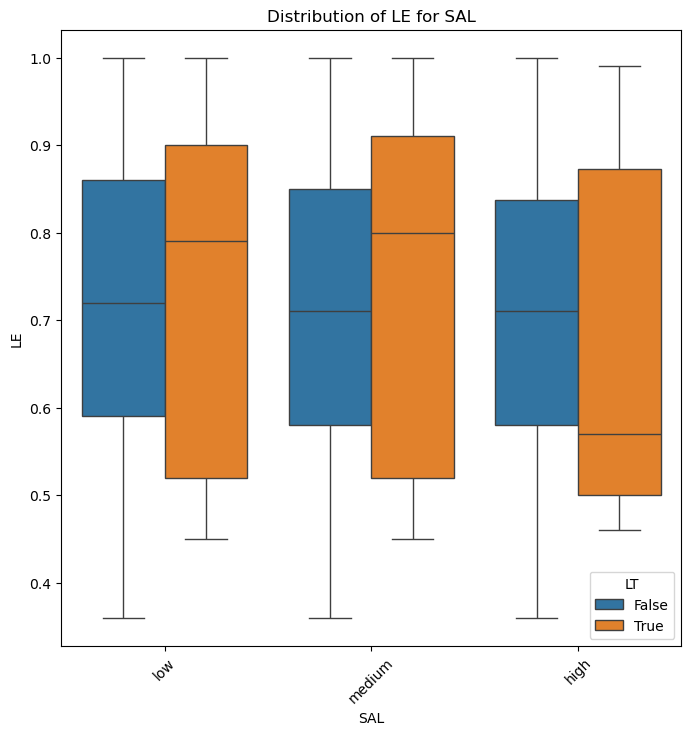

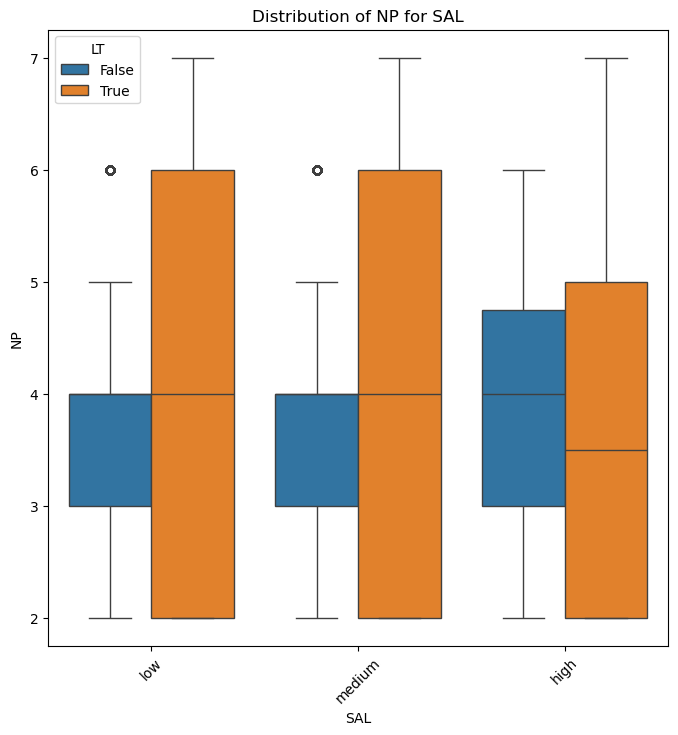

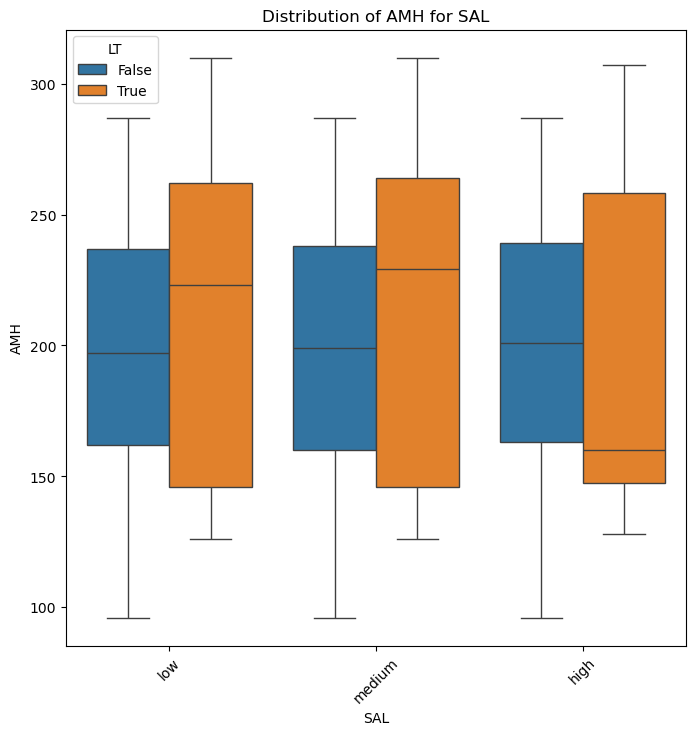

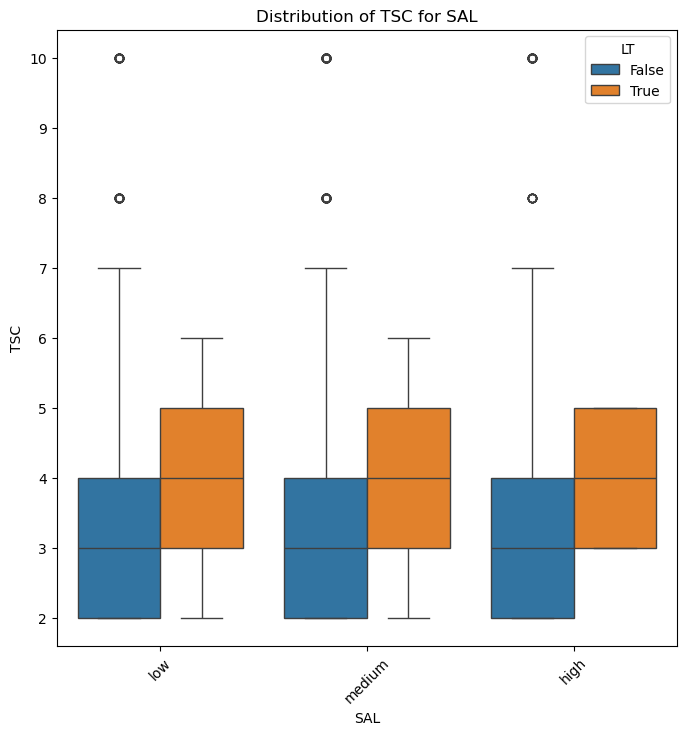

In [26]:
df_high_risk = df[df['TSC']<7]

for col in categorical_features:
    if col=='LT':
        continue
    for x in numerical_features:
        plt.figure(figsize=(8,8)) #create new graph
        plt.title(f'Distribution of {x} for {col}') #add title
        sns.boxplot(x=col, y=x, hue='LT',  data= df)
        plt.xticks(rotation=45)
        


Calculating the mixed association matrix...


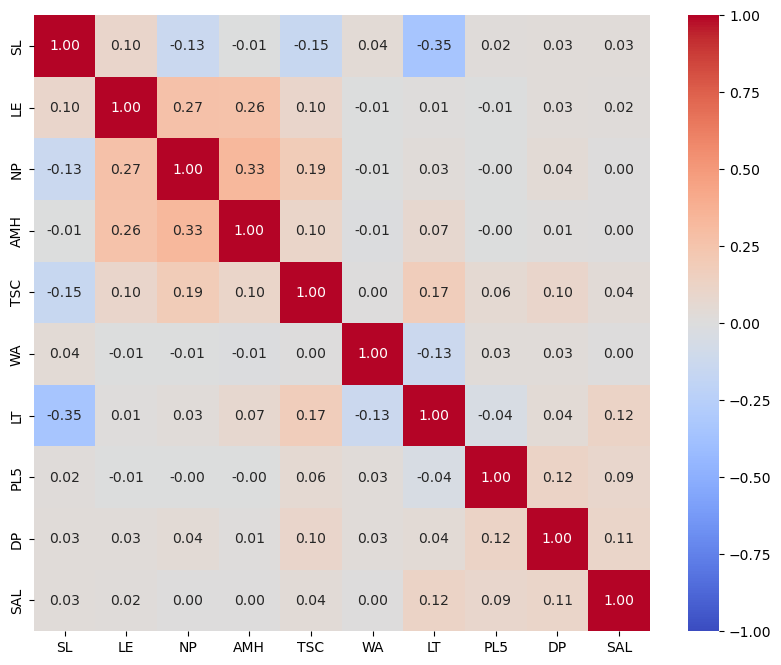


Association Matrix (numerical values):


SL     LE     NP    AMH    TSC     WA     LT    PL5     DP    SAL
SL  100.00   9.52 -13.32  -0.63 -15.29   3.99 -35.06   1.98   2.50   2.94
LE    9.52 100.00  27.03  26.47   9.68  -0.57   1.35  -0.72   2.97   1.84
NP  -13.32  27.03 100.00  33.15  18.88  -0.56   3.09  -0.05   4.07   0.33
AMH  -0.63  26.47  33.15 100.00  10.29  -1.29   7.04  -0.50   1.37   0.29
TSC -15.29   9.68  18.88  10.29 100.00   0.00  17.33   5.68   9.60   3.85
WA    3.99  -0.57  -0.56  -1.29   0.00 100.00 -12.54   2.99   2.57   0.37
LT  -35.06   1.35   3.09   7.04  17.33 -12.54 100.00  -4.47   4.17  12.09
PL5   1.98  -0.72  -0.05  -0.50   5.68   2.99  -4.47 100.00  12.29   8.82
DP    2.50   2.97   4.07   1.37   9.60   2.57   4.17  12.29 100.00  10.68
SAL   2.94   1.84   0.33   0.29   3.85   0.37  12.09   8.82  10.68 100.00

In [27]:
"""
Examine  association between categorical fetures and numerical feautures
The goal is to prepare features engineering before building the model
"""
# --- 1. Calculate and display the association matrix ---
# Dython handles everything automatically
print("Calculating the mixed association matrix...")

# 'assoc_results' is a dictionary that contains both the plot and the matrix
assoc_results = associations(df, 
                             figsize=(10, 8), 
                             cmap='coolwarm', # Colormap suitable for positive/negative correlations
                             annot=True,
                             fmt='.2f')

ax = assoc_results['ax']

# Risali alla figura a cui appartiene l'asse
fig = ax.get_figure()

# Aggiungi un titolo se vuoi
fig.suptitle("Matrice di Associazione V di Cramér (Metodo Robusto)")

plt.show()

# --- 2. Access the numerical matrix ---
print("\nAssociation Matrix (numerical values):")
correlation_matrix = (assoc_results['corr']*100).round(2)
display(correlation_matrix)

Conclusions
1. The multivariate analyis shows a very weak linear relationship between LT and other features
2. This findings is confirmed by the graphical analysis who shows a U shape or bi/thrre modal distribution for continuos variables
3. But also by the correlation and association matrix that shows a very weak linear relationship
4. Tree based model seems to be best solutions becuase they capture non linear relationships and also can calculate optimal splits points in continuos variables that predict LT=1 probability
5. The interpretion of tree models could be misleanding. While simple tree are esasy to understand, high performance model like random forest are often seen as black box. Conversely, a logistic regression model, when applied to well-defined business-oriented bins (e.g., 'Under-worked', 'Standard Workload', 'Over-worked'), can provide clearer and more powerful insights for a non-technical audience.
6. If the primary tree-based model yields overly complex or unrealistic predictions, a more constrained model will be implemented. Given this is a classification task, the appropriate alternative is a well-prepared logistic regression model, 

Feature Egnineering

The features engineering will be performed assuming that a tree based modell will be used

In [28]:
"""
In this section new features will be created in order to improve the performance of the model
Collinearity issues will be adressed in the next sections
Collinearity can create problems in the interpretation of tree based models,
but it has low impact on prediction
"""

#one_hot_encoding
"""
For categorical features the one hot encoding techniques will be used for the machine learning model
One Hot Encoding avoid the alghoritms will mis-undesrtand ordinal category (like low, medium and high) 
that in other econdiging althoritms are labeled as (eg:1,2,3), givin more weight to higer numbers
"""
categorical_cols = df.select_dtypes(include=['category']).columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df_encoded.head())




    SL   LE  NP    AMH  TSC     WA    LT    PL5  DP_RandD  DP_accounting  \
0 0.38 0.53   2 157.00    3  False  True  False     False          False   
1 0.80 0.86   5 262.00    6  False  True  False     False          False   
2 0.11 0.88   7 272.00    4  False  True  False     False          False   
3 0.72 0.87   5 223.00    5  False  True  False     False          False   
4 0.37 0.52   2 159.00    3  False  True  False     False          False   

   DP_hr  DP_management  DP_marketing  DP_product_mng  DP_sales  DP_support  \
0  False          False         False           False      True       False   
1  False          False         False           False      True       False   
2  False          False         False           False      True       False   
3  False          False         False           False      True       False   
4  False          False         False           False      True       False   

   DP_technical  SAL_medium  SAL_high  
0         False       False 

Model Construction Phase

In [29]:
"""
The first machine learning models will be constructed without feature engineering
Those models will be used as baseline for more complex one or, 
if the results are statisfying will be used as ML to predict employee attrition
The final decision will be taken after comparing ML models without feutere engineering
with ML models with features engineering
"""

y=df_encoded['LT']
X=df_encoded.drop('LT',axis=1)
print(f'The shape of y is: {y.shape}')
print(f'The shape of X is: {X.shape}')

X_train,X_test,y_train,y_test =train_test_split(X,y, 
                                                test_size=0.2, 
                                                random_state=42, 
                                                stratify=y) #stratify=y used due the class imbalance
# --- 2. Model and Pipeline Definition ---
# We now define the pipelines and hyperparameter grids.
# Note: The scaler is useful for Logistic Regression and harmless for tree-based models.
# Including it in all pipelines makes the code more uniform and reusable.

model_configs = {
    'Decision Tree': {
        'pipeline': Pipeline([
            ('resampling', 'passthrough'), # Placeholder for resampling technique
            ('scaler', StandardScaler()),
            ('classifier', DecisionTreeClassifier(random_state=42))
        ]),
        'params': {
            'resampling': [SMOTE(random_state=42), 'passthrough'], # Test with and without SMOTE
            'classifier__class_weight': ['balanced', None], # Test with and without class weights
            'classifier__max_depth': [5, 10, None],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__criterion': ['gini', 'entropy']
        }
    },
    'Random Forest': {
        'pipeline': Pipeline([
            ('resampling', 'passthrough'),
            ('scaler', StandardScaler()),
            ('classifier', RandomForestClassifier(random_state=42))
        ]),
        'params': {
            'resampling': [SMOTE(random_state=42), 'passthrough'],
            'classifier__class_weight': ['balanced', None],
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [10, 20, None],
            'classifier__min_samples_leaf': [1, 2, 4]
        }
    },
    'Gradient Boosting': {
        'pipeline': Pipeline([
            ('resampling', 'passthrough'),
            ('scaler', StandardScaler()),
            ('classifier', GradientBoostingClassifier(random_state=42))
        ]),
        'params': {
            'resampling': [SMOTE(random_state=42), 'passthrough'],
            # Note: GradientBoosting doesn't have a 'class_weight' parameter.
            # We rely on SMOTE or 'sample_weight' if needed. Here, we rely on SMOTE.
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 5, 7]
        }
    }
    # You could also add a Logistic Regression configuration here
}


# --- 3. Optimization and Evaluation Loop ---

best_models = {} # Dictionary to store the best performing models

# Start of your loop, now modified
for name, config in model_configs.items():
    print(f"\n" + "_"*40)
    print(f"TUNING MODEL: {name}")
    print('_'*40)

    # Setup GridSearchCV
    # cv=5 means 5-fold cross_validation
    # n_jobs=-1 uses all available CPU cores to speed up the search.
    # scoring='recall' optimizes for the best Recall score on the positive class.
    grid_search = GridSearchCV(
        estimator=config['pipeline'],
        param_grid=config['params'],
        scoring='recall', # <-- We are optimizing for RECALL!
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    
    print(f"Fitting GridSearchCV for {name}...")
    grid_search.fit(X_train, y_train)
    
    # Store the best model found
    best_models[name] = grid_search.best_estimator_
    
    print(f"\n--- Results for {name} ---")
    print(f"Best Recall score during CV: {grid_search.best_score_:.4f}")
    print("Best parameters found:")
    # Print the parameters in a readable format
    for param, value in grid_search.best_params_.items():
        # Check if the value is an object (like SMOTE) for a cleaner printout
        if hasattr(value, '__class__'):
            print(f"  - {param}: {value.__class__.__name__}")
        else:
            print(f"  - {param}: {value}")
    print("_"*40)


# --- 4. Final Evaluation of Best Models on the Test Set ---
print("\n\n" + "="*40)
print("FINAL EVALUATION ON TEST SET")
print("="*40)

for name, model in best_models.items():
    print(f"\n--- Performance of Best {name} ---")
    
    y_pred = model.predict(X_test)
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Churn (0)', 'Churn (1)']))

The shape of y is: (11991,)
The shape of X is: (11991, 18)

________________________________________
TUNING MODEL: Decision Tree
________________________________________
Fitting GridSearchCV for Decision Tree...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:


--- Results for Decision Tree ---
Best Recall score during CV: 0.9422
Best parameters found:
  - classifier__class_weight: str
  - classifier__criterion: str
  - classifier__max_depth: int
  - classifier__min_samples_split: int
  - resampling: str
________________________________________

________________________________________
TUNING MODEL: Random Forest
________________________________________
Fitting GridSearchCV for Random Forest...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:


--- Results for Random Forest ---
Best Recall score during CV: 0.9121
Best parameters found:
  - classifier__class_weight: str
  - classifier__max_depth: int
  - classifier__min_samples_leaf: int
  - classifier__n_estimators: int
  - resampling: SMOTE
________________________________________

________________________________________
TUNING MODEL: Gradient Boosting
________________________________________
Fitting GridSearchCV for Gradient Boosting...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:


--- Results for Gradient Boosting ---
Best Recall score during CV: 0.9360
Best parameters found:
  - classifier__learning_rate: float
  - classifier__max_depth: int
  - classifier__n_estimators: int
  - resampling: SMOTE
________________________________________


FINAL EVALUATION ON TEST SET

--- Performance of Best Decision Tree ---

Confusion Matrix:
[[1874  127]
 [  22  376]]

Classification Report:
              precision    recall  f1-score   support

No Churn (0)       0.99      0.94      0.96      2001
   Churn (1)       0.75      0.94      0.83       398

    accuracy                           0.94      2399
   macro avg       0.87      0.94      0.90      2399
weighted avg       0.95      0.94      0.94      2399


--- Performance of Best Random Forest ---

Confusion Matrix:
[[1985   16]
 [  29  369]]

Classification Report:
              precision    recall  f1-score   support

No Churn (0)       0.99      0.99      0.99      2001
   Churn (1)       0.96      0.93      0.94 

In [30]:
"""
A new dataset will be created to add some numerical features. Those features will be used both in tree based model
and logistic model to assess if they imrpove prediction
"""
df_encoded1=df_encoded.copy()
#Monthly hours per project - MHP 
"""
AMH and NP shows one of the strongest association
Monthly hours per project can capture the work load for employees and be a better predictor
"""
df_encoded1['MHP']= df_encoded1['AMH']/df_encoded1['NP']
print('_'*50)
print('Descriptive Statistics of MHP')
print(df_encoded1['MHP'].describe())
print('_'*50)

#Time spent in comany * Satisfication Level
"""
This proxy try to capture the combined effect of Satisfaction over time due the 
absence of Satisfaction Level by year
"""
df_encoded1['TSCS']=df_encoded1['TSC']*df_encoded1['SL']
print('_'*50)
print('Descriptive Statistics of TSCS')
print(df_encoded1['TSCS'].describe())
print('_'*50)

#Satisfaction Level*Workload
"""
This proxy try to capture the combined effect of Satisfaction Level and work load
"""
print('_'*50)
df_encoded1['SWL']=df_encoded1['MHP']*df_encoded1['SL']
print(df_encoded1['SWL'].describe())
print('_'*50)

print(df_encoded1.head())
print(df_encoded1.info())
df_encoded1.corr()

__________________________________________________
Descriptive Statistics of MHP
count   11991.00
mean       56.75
std        19.33
min        16.17
25%        43.25
50%        53.60
75%        67.67
max       155.00
Name: MHP, dtype: float64
__________________________________________________
__________________________________________________
Descriptive Statistics of TSCS
count   11991.00
mean        2.07
std         1.18
min         0.18
25%         1.26
50%         1.83
75%         2.61
max         9.90
Name: TSCS, dtype: float64
__________________________________________________
__________________________________________________
count   11991.00
mean       35.98
std        18.67
min         2.33
25%        24.89
50%        34.02
75%        46.36
max       136.32
Name: SWL, dtype: float64
__________________________________________________
    SL   LE  NP    AMH  TSC     WA    LT    PL5  DP_RandD  DP_accounting  \
0 0.38 0.53   2 157.00    3  False  True  False     False          Fal

SL    LE    NP   AMH   TSC    WA    LT   PL5  DP_RandD  \
SL              1.00  0.10 -0.13 -0.01 -0.15  0.04 -0.35  0.02     -0.00   
LE              0.10  1.00  0.27  0.26  0.10 -0.01  0.01 -0.01     -0.01   
NP             -0.13  0.27  1.00  0.33  0.19 -0.01  0.03 -0.00      0.01   
AMH            -0.01  0.26  0.33  1.00  0.10 -0.01  0.07 -0.00      0.00   
TSC            -0.15  0.10  0.19  0.10  1.00  0.00  0.17  0.06     -0.01   
WA              0.04 -0.01 -0.01 -0.01  0.00  1.00 -0.13  0.03      0.01   
LT             -0.35  0.01  0.03  0.07  0.17 -0.13  1.00 -0.04     -0.03   
PL5             0.02 -0.01 -0.00 -0.00  0.06  0.03 -0.04  1.00      0.03   
DP_RandD       -0.00 -0.01  0.01  0.00 -0.01  0.01 -0.03  0.03      1.00   
DP_accounting  -0.02  0.01  0.01  0.00  0.01 -0.01  0.01 -0.00     -0.06   
DP_hr          -0.01 -0.00 -0.03 -0.01 -0.02 -0.01  0.01  0.00     -0.06   
DP_management   0.00  0.01  0.01  0.00  0.09  0.01 -0.02  0.10     -0.05   
DP_marketing    0.01  0.00 -0.02 -0.00  0.01  0.00  0.00  0.04     -0.06   
DP_product_mng  0.00 -0.00 -0.00 -0.01 -0.00  0.00 -0.00 -0.03     -0.06   
DP_sales        0.00 -0.02 -0.01 -0.00  0.01 -0.00  0.01  0.00     -0.15   
DP_support      0.01  0.02  0.01  0.00 -0.02  0.01  0.01 -0.03     -0.10   
DP_technical   -0.00  0.01  0.02  0.01 -0.02 -0.00  0.01 -0.03     -0.12   
SAL_medium      0.02 -0.00  0.00  0.00  0.02 -0.00 -0.05  0.04      0.01   
SAL_high        0.02 -0.02 -0.00 -0.00  0.03  0.00 -0.09  0.06     -0.01   
MHP             0.05 -0.09 -0.68  0.39 -0.08 -0.01  0.07 -0.01     -0.01   
TSCS            0.65  0.12 -0.00  0.05  0.61  0.03 -0.09  0.05     -0.01   
SWL             0.72  0.04 -0.49  0.30 -0.14  0.03 -0.22  0.01     -0.01   

                DP_accounting  DP_hr  DP_management  DP_marketing  \
SL                      -0.02  -0.01           0.00          0.01   
LE                       0.01  -0.00           0.01          0.00   
NP                       0.01  -0.03           0.01         -0.02   
AMH                      0.00  -0.01           0.00         -0.00   
TSC                      0.01  -0.02           0.09          0.01   
WA                      -0.01  -0.01           0.01          0.00   
LT                       0.01   0.01          -0.02          0.00   
PL5                     -0.00   0.00           0.10          0.04   
DP_RandD                -0.06  -0.06          -0.05         -0.06   
DP_accounting            1.00  -0.05          -0.05         -0.06   
DP_hr                   -0.05   1.00          -0.04         -0.06   
DP_management           -0.05  -0.04           1.00         -0.05   
DP_marketing            -0.06  -0.06          -0.05          1.00   
DP_product_mng          -0.06  -0.06          -0.05         -0.06   
DP_sales                -0.14  -0.14          -0.12         -0.15   
DP_support              -0.10  -0.10          -0.08         -0.10   
DP_technical            -0.11  -0.11          -0.09         -0.12   
SAL_medium              -0.01   0.00          -0.02          0.00   
SAL_high                 0.02  -0.02           0.15          0.01   
MHP                     -0.00   0.01           0.00          0.01   
TSCS                    -0.01  -0.02           0.07          0.01   
SWL                     -0.02   0.00           0.00          0.01   

                DP_product_mng  DP_sales  DP_support  DP_technical  \
SL                        0.00      0.00        0.01         -0.00   
LE                       -0.00     -0.02        0.02          0.01   
NP                       -0.00     -0.01        0.01          0.02   
AMH                      -0.01     -0.00        0.00          0.01   
TSC                      -0.00      0.01       -0.02         -0.02   
WA                        0.00     -0.00        0.01         -0.00   
LT                       -0.00      0.01        0.01          0.01   
PL5                      -0.03      0.00       -0.03         -0.03   
DP_RandD                 -0.06     -0.15       -0.1

In [31]:
#checking corr
corr_matrix=df_encoded.corr()

sol = corr_matrix.abs().stack() #transforming corr_matrix in a pandas series

highly_corr_pairs = sol[(sol > 0.8) & (sol < 1.0)]

print(highly_corr_pairs)


Series([], dtype: float64)


In [32]:
y=df_encoded1['LT']
X=df_encoded1.drop('LT',axis=1)
print(f'The shape of y is: {y.shape}')
print(f'The shape of X is: {X.shape}')

X_train,X_test,y_train,y_test =train_test_split(X,y, 
                                                test_size=0.2, 
                                                random_state=42, 
                                                stratify=y) #stratify=y used due the class imbalance
# --- 2. Model and Pipeline Definition ---
# We now define the pipelines and hyperparameter grids.
# Note: The scaler is useful for Logistic Regression and harmless for tree-based models.
# Including it in all pipelines makes the code more uniform and reusable.

model_configs = {
    'Decision Tree': {
        'pipeline': Pipeline([
            ('resampling', 'passthrough'), # Placeholder for resampling technique
            ('scaler', StandardScaler()),
            ('classifier', DecisionTreeClassifier(random_state=42))
        ]),
        'params': {
            'resampling': [SMOTE(random_state=42), 'passthrough'], # Test with and without SMOTE
            'classifier__class_weight': ['balanced', None], # Test with and without class weights
            'classifier__max_depth': [5, 10, None],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__criterion': ['gini', 'entropy']
        }
    },
    'Random Forest': {
        'pipeline': Pipeline([
            ('resampling', 'passthrough'),
            ('scaler', StandardScaler()),
            ('classifier', RandomForestClassifier(random_state=42))
        ]),
        'params': {
            'resampling': [SMOTE(random_state=42), 'passthrough'],
            'classifier__class_weight': ['balanced', None],
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [10, 20, None],
            'classifier__min_samples_leaf': [1, 2, 4]
        }
    },
    'Gradient Boosting': {
        'pipeline': Pipeline([
            ('resampling', 'passthrough'),
            ('scaler', StandardScaler()),
            ('classifier', GradientBoostingClassifier(random_state=42))
        ]),
        'params': {
            'resampling': [SMOTE(random_state=42), 'passthrough'],
            # Note: GradientBoosting doesn't have a 'class_weight' parameter.
            # We rely on SMOTE or 'sample_weight' if needed. Here, we rely on SMOTE.
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 5, 7]
        }
    }
    # You could also add a Logistic Regression configuration here
}


# --- 3. Optimization and Evaluation Loop ---

best_models = {} # Dictionary to store the best performing models

# Start of your loop, now modified
for name, config in model_configs.items():
    print(f"\n" + "_"*40)
    print(f"TUNING MODEL: {name}")
    print('_'*40)

    # Setup GridSearchCV
    # cv=5 means 5-fold cross_validation
    # n_jobs=-1 uses all available CPU cores to speed up the search.
    # scoring='recall' optimizes for the best Recall score on the positive class.
    grid_search = GridSearchCV(
        estimator=config['pipeline'],
        param_grid=config['params'],
        scoring='recall', # <-- We are optimizing for RECALL!
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    
    print(f"Fitting GridSearchCV for {name}...")
    grid_search.fit(X_train, y_train)
    
    # Store the best model found
    best_models[name] = grid_search.best_estimator_
    
    print(f"\n--- Results for {name} ---")
    print(f"Best Recall score during CV: {grid_search.best_score_:.4f}")
    print("Best parameters found:")
    # Print the parameters in a readable format
    for param, value in grid_search.best_params_.items():
        # Check if the value is an object (like SMOTE) for a cleaner printout
        if hasattr(value, '__class__'):
            print(f"  - {param}: {value.__class__.__name__}")
        else:
            print(f"  - {param}: {value}")
    print("_"*40)


# --- 4. Final Evaluation of Best Models on the Test Set ---
print("\n\n" + "="*40)
print("FINAL EVALUATION ON TEST SET")
print("="*40)

for name, model in best_models.items():
    print(f"\n--- Performance of Best {name} ---")
    
    y_pred = model.predict(X_test)
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Churn (0)', 'Churn (1)']))

The shape of y is: (11991,)
The shape of X is: (11991, 21)

________________________________________
TUNING MODEL: Decision Tree
________________________________________
Fitting GridSearchCV for Decision Tree...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:


--- Results for Decision Tree ---
Best Recall score during CV: 0.9353
Best parameters found:
  - classifier__class_weight: str
  - classifier__criterion: str
  - classifier__max_depth: int
  - classifier__min_samples_split: int
  - resampling: str
________________________________________

________________________________________
TUNING MODEL: Random Forest
________________________________________
Fitting GridSearchCV for Random Forest...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:


--- Results for Random Forest ---
Best Recall score during CV: 0.9096
Best parameters found:
  - classifier__class_weight: NoneType
  - classifier__max_depth: int
  - classifier__min_samples_leaf: int
  - classifier__n_estimators: int
  - resampling: str
________________________________________

________________________________________
TUNING MODEL: Gradient Boosting
________________________________________
Fitting GridSearchCV for Gradient Boosting...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:


--- Results for Gradient Boosting ---
Best Recall score during CV: 0.9341
Best parameters found:
  - classifier__learning_rate: float
  - classifier__max_depth: int
  - classifier__n_estimators: int
  - resampling: SMOTE
________________________________________


FINAL EVALUATION ON TEST SET

--- Performance of Best Decision Tree ---

Confusion Matrix:
[[1879  122]
 [  23  375]]

Classification Report:
              precision    recall  f1-score   support

No Churn (0)       0.99      0.94      0.96      2001
   Churn (1)       0.75      0.94      0.84       398

    accuracy                           0.94      2399
   macro avg       0.87      0.94      0.90      2399
weighted avg       0.95      0.94      0.94      2399


--- Performance of Best Random Forest ---

Confusion Matrix:
[[1996    5]
 [  30  368]]

Classification Report:
              precision    recall  f1-score   support

No Churn (0)       0.99      1.00      0.99      2001
   Churn (1)       0.99      0.92      0.95 

In [33]:
# 1. Data Preparation
X = df_encoded1.drop('LT', axis=1)
y = df_encoded1['LT']

# Split into training and test sets, stratifying to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Create the Pipeline
# The pipeline will execute the following steps in sequence:
# a. SMOTE (optional, we will control this with GridSearchCV)
# b. Data Scaling
# c. Classification with Logistic Regression
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', RobustScaler()), # RobustScaler() is chose to deal with outliers
    ('classifier', LogisticRegression(random_state=42, max_iter=1000)) # Increase max_iter to ensure convergence
])

# 3. Define the Hyperparameter Grid for GridSearchCV
# Here, we test different strategies to maximize recall.
# 'classifier__class_weight': [None, 'balanced'] -> Tests the model with and without class weights.
# 'smote': [SMOTE(...), 'passthrough'] -> Tests the pipeline with and without applying SMOTE.
# 'classifier__C': [0.01, 0.1, 1, 10, 100] -> Tests different levels of regularization.
param_grid = {
    'classifier__class_weight': [None, 'balanced'],
    'smote': [SMOTE(random_state=42), 'passthrough'], # 'passthrough' means "skip this step"
    'classifier__C': [0.01, 0.1, 1, 10, 100]
}

# 4. Configure and Run GridSearchCV
# We set scoring='recall' to optimize directly for this metric on the positive class.
grid_search_lr = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='recall', # <-- PRIMARY OBJECTIVE!
    cv=5,
    n_jobs=-1,
    verbose=1
)

print("Starting optimization for Logistic Regression focused on Recall...")
grid_search_lr.fit(X_train, y_train)

# 5. Analyze the Optimization Results
print("\n--- Optimization Results ---")
print(f"Best Recall score (cross-validation): {grid_search_lr.best_score_:.4f}")
print("Best hyperparameters found:")
# Print the parameters in a readable format
best_params = grid_search_lr.best_params_
for param, value in best_params.items():
    print(f"  - {param}: {value}")


# 6. Evaluate the Best Model on the Test Set
print("\n--- Performance of the Best Model on the Test Set ---")
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)

print("\nConfusion Matrix:")
# Rows: True | Columns: Predicted
# [[True Negative, False Positive],
#  [False Negative, True Positive]]
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No Churn (0)', 'Churn (1)']))


Starting optimization for Logistic Regression focused on Recall...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:


--- Optimization Results ---
Best Recall score (cross-validation): 0.9083
Best hyperparameters found:
  - classifier__C: 10
  - classifier__class_weight: balanced
  - smote: passthrough

--- Performance of the Best Model on the Test Set ---

Confusion Matrix:
[[1650  351]
 [  25  373]]

Classification Report:
              precision    recall  f1-score   support

No Churn (0)       0.99      0.82      0.90      2001
   Churn (1)       0.52      0.94      0.66       398

    accuracy                           0.84      2399
   macro avg       0.75      0.88      0.78      2399
weighted avg       0.91      0.84      0.86      2399

